# Telecom Churn Case Study


---
## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

*Retaining high profitable customers is the number one business goal.*

---

### Major steps involved:
1. Reading and understanding the data
2. Data Cleaning
3. Filtering High Value Customers
4. Deriving Target variable (Churn)
5. Data Preparation
6. Modelling and Evaluation
7. Recommending strategies to manage customer churn

In [1]:
# import all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set other Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_style('darkgrid')
%matplotlib inline

## Step 1: Reading and understanding the data

In [2]:
# load the data
telecom_data = pd.read_csv('telecom_churn_data.csv')

In [3]:
# check head
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# check shape
telecom_data.shape

(99999, 226)

In [5]:
# check info
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# check if any row has all the values as missing/NAN
telecom_data[telecom_data.isnull().all(axis=1)]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

#### There are no rows with all the columns as missing

In [7]:
# check for duplicate rows
telecom_data[telecom_data.duplicated()]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

#### There are no duplicate data

In [8]:
# create generic funcitons to extract categorical and numerical columns
def getCatCols(df):
    cols = df.select_dtypes('object').columns
    return cols

def getNumCols(df):
    cols = df.select_dtypes(['int64','float64']).columns
    return cols

In [9]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data)
num_cols = getNumCols(telecom_data)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  12
Numerical columns:  214


In [10]:
# check summary of numerical columns
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

From the above summary it can be noticed that few of the numerical columns have minimum value as 0 and maximum value as 1 or 4 or less than equal to 5, such as **fb_user_6**, **night_pck_user_6**, etc. These column can potentially be considered as categorical columns. Let's find out more about them.

In [11]:
# function to check if any continuous column can be considered as a categorical column

# @params
# args_df {Data Frame} - the Data Frame to be used to figure out the type of columns
# return {List} - Returns the list of categorical columns
def check_if_cat_cols(args_df):
    cat_cols_list = []

    for col in args_df.columns:

        # setting threshold of 5 for the number of unique values to decide the type of column. 
        # It's just an assumption. It can be less than 5 or more.
        if args_df[col].nunique() > 1 and args_df[col].nunique() <= 5: 
            cat_cols_list.append(col)

    return(cat_cols_list)  

In [12]:
# check for potential categorical columns
potential_cat_cols = check_if_cat_cols(telecom_data[num_cols])
potential_cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [13]:
# print out the value counts of them to see the levels
for col in potential_cat_cols:
    print(telecom_data[col].value_counts())
    print('-------------------------------')

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
-------------------------------
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
-------------------------------
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
-------------------------------
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
-------------------------------
0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64
-------------------------------
0    93735
1     5695
2      530
3       33
4        6
Name: monthly_2g_9, dtype: int64
-------------------------------
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
-------------------------------
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
-------------------------------
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
-------------------------------
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64
-------------------------------


In [14]:
# convert the data types of these columns to object
for col in potential_cat_cols:
    telecom_data[col] = telecom_data[col].astype('object')

In [15]:
# check info of these columns
telecom_data[potential_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 10 columns):
night_pck_user_6    25153 non-null object
night_pck_user_7    25571 non-null object
night_pck_user_8    26339 non-null object
night_pck_user_9    25922 non-null object
monthly_2g_6        99999 non-null object
monthly_2g_9        99999 non-null object
fb_user_6           25153 non-null object
fb_user_7           25571 non-null object
fb_user_8           26339 non-null object
fb_user_9           25922 non-null object
dtypes: object(10)
memory usage: 7.6+ MB


In [16]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data)
num_cols = getNumCols(telecom_data)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  22
Numerical columns:  204


In [17]:
# Check missing / null values across columns
# Since there are a lot of features / columns, check for null values based on categorical and numerical features separately:
# 1. Catgorical Columns = 22
# 2. Numerical Columns = 204

# function to extract columns that have missing values into a data frame
def create_dataframe_missing_vals(arr):
    values = []
    cols = []
    for col in arr:
        if telecom_data[col].isnull().sum() / telecom_data.shape[0] > 0.0:
            values.append(round(100*(telecom_data[col].isnull().sum() / telecom_data.shape[0]),2))
            cols.append(col)

    data = {'Columns with missing values': cols, 'Missing %age': values}
    df = pd.DataFrame(data)
    df.sort_values(by='Missing %age', ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df

In [18]:
# create and print data frame with missing values of categorical columns
cat_cols_missing_df = create_dataframe_missing_vals(cat_cols)
cat_cols_missing_df

Columns with missing values  Missing %age
0             night_pck_user_6         74.85
1                    fb_user_6         74.85
2     date_of_last_rech_data_6         74.85
3                    fb_user_7         74.43
4     date_of_last_rech_data_7         74.43
5             night_pck_user_7         74.43
6                    fb_user_9         74.08
7             night_pck_user_9         74.08
8     date_of_last_rech_data_9         74.08
9                    fb_user_8         73.66
10            night_pck_user_8         73.66
11    date_of_last_rech_data_8         73.66
12         date_of_last_rech_9          4.76
13         date_of_last_rech_8          3.62
14         date_of_last_rech_7          1.77
15        last_date_of_month_9          1.66
16         date_of_last_rech_6          1.61
17        last_date_of_month_8          1.10
18        last_date_of_month_7          0.60

In [19]:
# create and print data frame with missing values of numerical columns
num_cols_missing_df = create_dataframe_missing_vals(num_cols)
num_cols_missing_df.shape

(147, 2)

Since there are a lot of numerical columns **(147)** that have missing values, let's bin them into buckets to visualize properly

Buckets chosen are:
1. Missing % **>50**
2. **>10** Missing % **<=50**
3. **>5** Missing %  **<=10**
4. **>3** Missing % **<=5**
5. Missing % **<=3**

In [20]:
# missing values above 50
num_cols_missing_df.loc[num_cols_missing_df['Missing %age'] > 50,:]

Columns with missing values  Missing %age
0              count_rech_3g_6         74.85
1            total_rech_data_6         74.85
2           av_rech_amt_data_6         74.85
3                    arpu_2g_6         74.85
4              max_rech_data_6         74.85
5              count_rech_2g_6         74.85
6                    arpu_3g_6         74.85
7              max_rech_data_7         74.43
8              count_rech_2g_7         74.43
9           av_rech_amt_data_7         74.43
10                   arpu_3g_7         74.43
11             count_rech_3g_7         74.43
12           total_rech_data_7         74.43
13                   arpu_2g_7         74.43
14             max_rech_data_9         74.08
15           total_rech_data_9         74.08
16                   arpu_2g_9         74.08
17             count_rech_2g_9         74.08
18                   arpu_3g_9         74.08
19             count_rech_3g_9         74.08
20          av_rech_amt_data_9         74.08
21             count_rech_2g_8         73.66
22          av_rech_amt_data_8         73.66
23             max_rech_data_8         73.66
24             count_rech_3g_8         73.66
25                   arpu_3g_8         73.66
26                   arpu_2g_8         73.66
27           total_rech_data_8         73.66

In [21]:
# missing values between 10 & 50
num_cols_missing_df.loc[(num_cols_missing_df['Missing %age'] > 10) & (num_cols_missing_df['Missing %age'] <= 50),:]

Empty DataFrame
Columns: [Columns with missing values, Missing %age]
Index: []

In [22]:
# missing values between 5 & 10
num_cols_missing_df.loc[(num_cols_missing_df['Missing %age'] > 5) & (num_cols_missing_df['Missing %age'] <= 10),:]

Columns with missing values  Missing %age
28                isd_og_mou_9          7.75
29            std_ic_t2o_mou_9          7.75
30            std_og_t2f_mou_9          7.75
31            std_ic_t2f_mou_9          7.75
32            std_ic_t2m_mou_9          7.75
33            std_og_t2c_mou_9          7.75
34                std_og_mou_9          7.75
35            std_ic_t2t_mou_9          7.75
36            loc_ic_t2t_mou_9          7.75
37                spl_og_mou_9          7.75
38                loc_ic_mou_9          7.75
39            loc_ic_t2m_mou_9          7.75
40            loc_ic_t2f_mou_9          7.75
41                std_ic_mou_9          7.75
42            std_og_t2m_mou_9          7.75
43            loc_og_t2c_mou_9          7.75
44                 og_others_9          7.75
45            std_og_t2t_mou_9          7.75
46                 onnet_mou_9          7.75
47                offnet_mou_9          7.75
48                isd_ic_mou_9          7.75
49               roam_ic_mou_9          7.75
50                loc_og_mou_9          7.75
51                 ic_others_9          7.75
52               roam_og_mou_9          7.75
53                spl_ic_mou_9          7.75
54            loc_og_t2t_mou_9          7.75
55            loc_og_t2f_mou_9          7.75
56            loc_og_t2m_mou_9          7.75
57                loc_ic_mou_8          5.38
58            loc_ic_t2m_mou_8          5.38
59            loc_ic_t2f_mou_8          5.38
60                spl_ic_mou_8          5.38
61            std_ic_t2t_mou_8          5.38
62            std_ic_t2m_mou_8          5.38
63            std_ic_t2f_mou_8          5.38
64                 ic_others_8          5.38
65            std_ic_t2o_mou_8          5.38
66                isd_ic_mou_8          5.38
67                std_ic_mou_8          5.38
68                 og_others_8          5.38
69            loc_ic_t2t_mou_8          5.38
70            loc_og_t2f_mou_8          5.38
71                std_og_mou_8          5.38
72               roam_ic_mou_8          5.38
73            std_og_t2m_mou_8          5.38
74                offnet_mou_8          5.38
75               roam_og_mou_8          5.38
76                isd_og_mou_8          5.38
77                loc_og_mou_8          5.38
78            std_og_t2f_mou_8          5.38
79            loc_og_t2t_mou_8          5.38
80            std_og_t2c_mou_8          5.38
81                spl_og_mou_8          5.38
82                 onnet_mou_8          5.38
83            std_og_t2t_mou_8          5.38
84            loc_og_t2c_mou_8          5.38
85            loc_og_t2m_mou_8          5.38

In [23]:
# missing values between 3 & 5
num_cols_missing_df.loc[(num_cols_missing_df['Missing %age'] > 3) & (num_cols_missing_df['Missing %age'] <= 5),:]

Columns with missing values  Missing %age
86             std_ic_t2o_mou_6          3.94
87             loc_og_t2t_mou_6          3.94
88                 spl_ic_mou_6          3.94
89                 std_ic_mou_6          3.94
90             std_og_t2f_mou_6          3.94
91             loc_ic_t2t_mou_6          3.94
92             loc_og_t2m_mou_6          3.94
93             std_og_t2m_mou_6          3.94
94                 isd_ic_mou_6          3.94
95             std_og_t2t_mou_6          3.94
96             std_og_t2c_mou_6          3.94
97                 std_og_mou_6          3.94
98             loc_og_t2c_mou_6          3.94
99             std_ic_t2f_mou_6          3.94
100                 onnet_mou_6          3.94
101                 og_others_6          3.94
102            loc_ic_t2m_mou_6          3.94
103                offnet_mou_6          3.94
104            loc_ic_t2f_mou_6          3.94
105                loc_og_mou_6          3.94
106                spl_og_mou_6          3.94
107                loc_ic_mou_6          3.94
108               roam_ic_mou_6          3.94
109                isd_og_mou_6          3.94
110            std_ic_t2t_mou_6          3.94
111            std_ic_t2m_mou_6          3.94
112               roam_og_mou_6          3.94
113            loc_og_t2f_mou_6          3.94
114                 ic_others_6          3.94
115            loc_og_t2f_mou_7          3.86
116                 og_others_7          3.86
117            loc_og_t2m_mou_7          3.86
118            loc_og_t2t_mou_7          3.86
119               roam_ic_mou_7          3.86
120                offnet_mou_7          3.86
121                 onnet_mou_7          3.86
122               roam_og_mou_7          3.86
123                spl_ic_mou_7          3.86
124            loc_og_t2c_mou_7          3.86
125                loc_og_mou_7          3.86
126            loc_ic_t2t_mou_7          3.86
127            loc_ic_t2m_mou_7          3.86
128                spl_og_mou_7          3.86
129            loc_ic_t2f_mou_7          3.86
130                loc_ic_mou_7          3.86
131                isd_og_mou_7          3.86
132            std_ic_t2t_mou_7          3.86
133                std_og_mou_7          3.86
134            std_ic_t2m_mou_7          3.86
135            std_ic_t2f_mou_7          3.86
136            std_og_t2c_mou_7          3.86
137            std_ic_t2o_mou_7          3.86
138            std_og_t2f_mou_7          3.86
139                std_ic_mou_7          3.86
140            std_og_t2m_mou_7          3.86
141                isd_ic_mou_7          3.86
142            std_og_t2t_mou_7          3.86
143                 ic_others_7          3.86

In [24]:
# missing values <=3
num_cols_missing_df.loc[num_cols_missing_df['Missing %age'] <= 3,:]

Columns with missing values  Missing %age
144              std_og_t2o_mou          1.02
145              loc_ic_t2o_mou          1.02
146              loc_og_t2o_mou          1.02

## Step 2: Cleaning the data

### 2.1 Impute few numerical columns with Zero

There are some **recharge** columns that have missing values. Let's extract these columns and analyse them first.

In [25]:
# extract recharge columns that have missing values
columns = num_cols_missing_df['Columns with missing values']
recharge_cols_missing = [col for col in columns if 'rech' in col]
recharge_cols_missing

['count_rech_3g_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'max_rech_data_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'count_rech_3g_7',
 'total_rech_data_7',
 'max_rech_data_9',
 'total_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'total_rech_data_8']

In [26]:
# display the summary of them
telecom_data[recharge_cols_missing].describe()

count_rech_3g_6  total_rech_data_6  av_rech_amt_data_6  \
count     25153.000000       25153.000000        25153.000000   
mean          0.599133           2.463802          192.600982   
std           1.274428           2.789128          192.646318   
min           0.000000           1.000000            1.000000   
25%           0.000000           1.000000           82.000000   
50%           0.000000           1.000000          154.000000   
75%           1.000000           3.000000          252.000000   
max          29.000000          61.000000         7546.000000   

       max_rech_data_6  count_rech_2g_6  max_rech_data_7  count_rech_2g_7  \
count     25153.000000     25153.000000     25571.000000     25571.000000   
mean        126.393392         1.864668       126.729459         2.044699   
std         108.477235         2.570254       109.765267         2.768332   
min           1.000000         0.000000         1.000000         0.000000   
25%          25.000000         1.000000        25.000000         1.000000   
50%         145.000000         1.000000       145.000000         1.000000   
75%         177.000000         2.000000       177.000000         2.000000   
max        1555.000000        42.000000      1555.000000        48.000000   

       av_rech_amt_data_7  count_rech_3g_7  total_rech_data_7  \
count        25571.000000     25571.000000       25571.000000   
mean           200.981292         0.621720           2.666419   
std            196.791224         1.394524           3.031593   
min              0.500000         0.000000           1.000000   
25%             92.000000         0.000000           1.000000   
50%            154.000000         0.000000           1.000000   
75%            252.000000         1.000000           3.000000   
max           4365.000000        35.000000          54.000000   

       max_rech_data_9  total_rech_data_9  count_rech_2g_9  count_rech_3g_9  \
count      25922.00000       25922.000000     25922.000000     25922.000000   
mean         124.94144           2.441170         1.781807         0.659363   
std          111.36376           2.516339         2.214701         1.411513   
min            1.00000           1.000000         0.000000         0.000000   
25%           25.00000           1.000000         1.000000         0.000000   
50%          145.00000           2.000000         1.000000         0.000000   
75%          179.00000           3.000000         2.000000         1.000000   
max         1555.00000          84.000000        40.000000        49.000000   

       av_rech_amt_data_9  count_rech_2g_8  av_rech_amt_data_8  \
count        25922.000000     26339.000000        26339.000000   
mean           192.734315         2.016288          197.526489   
std            188.400286         2.720132          191.301305   
min              1.000000         0.000000            0.500000   
25%             69.000000         1.000000           87.000000   
50%            164.000000         1.000000          154.000000   
75%            252.000000         2.000000          252.000000   
max           4061.000000        44.000000         4076.000000   

       max_rech_data_8  count_rech_3g_8  total_rech_data_8  
count     26339.000000     26339.000000       26339.000000  
mean        125.717301         0.635711           2.651999  
std         109.437851         1.422827           3.074987  
min           1.000000         0.000000           1.000000  
25%          25.000000         0.000000           1.000000  
50%         145.000000         0.000000           1.000000  
75%         179.000000         1.000000           3.000000  
max        1555.000000        45.000000          60.000000

It can be observed that apart from *count* related columns, all the other columns have minimum value as either **0.5** or **1**, which means that the missing values in them can potentially be imputed with **zero**, since **0** as a value would mean that the customer didn't recharge at all. Let's check the last recharge date to verify if they actually recharged or not. The assumption can be validated based on the fact that:
- if, the last recharged date for a particular month also has missing value against the recharge value column, then the customer indeed did not recharge and those missing values can be imputed with zero.

In [27]:
# extract the reacharge columns that have minimum value more than 0.
recharge_cols_zero_imputation = [col for col in recharge_cols_missing if telecom_data[col].min() > 0]
recharge_cols_zero_imputation

['total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'max_rech_data_7',
 'av_rech_amt_data_7',
 'total_rech_data_7',
 'max_rech_data_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'total_rech_data_8']

In [28]:
# extract date columns that describe last recharge date for data
date_cols_rech_date = [col for col in cat_cols if ('date' in col) & ('last' in col) & ('rech' in col) & ('data' in col)]
date_cols_rech_date

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [29]:
# check the combined result of recharge date and recharge value of rows that have missing values
zero_imputation_df = telecom_data[date_cols_rech_date + recharge_cols_zero_imputation]
zero_imputation_df[zero_imputation_df.isnull().all(axis=1)].head(20)

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
3                       NaN                      NaN                      NaN   
5                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
7                       NaN                      NaN                      NaN   
12                      NaN                      NaN                      NaN   
14                      NaN                      NaN                      NaN   
15                      NaN                      NaN                      NaN   
16                      NaN                      NaN                      NaN   
17                      NaN                      NaN                      NaN   
18                      NaN                      NaN                      NaN   
20                      NaN                      NaN                      NaN   
21                      NaN                      NaN                      NaN   
22                      NaN                      NaN                      NaN   
24                      NaN                      NaN                      NaN   
25                      NaN                      NaN                      NaN   
27                      NaN                      NaN                      NaN   
29                      NaN                      NaN                      NaN   
30                      NaN                      NaN                      NaN   
31                      NaN                      NaN                      NaN   
35                      NaN                      NaN                      NaN   

   date_of_last_rech_data_9  total_rech_data_6  av_rech_amt_data_6  \
3                       NaN                NaN                 NaN   
5                       NaN                NaN                 NaN   
6                       NaN                NaN                 NaN   
7                       NaN                NaN                 NaN   
12                      NaN                NaN                 NaN   
14                      NaN                NaN                 NaN   
15                      NaN                NaN                 NaN   
16                      NaN                NaN                 NaN   
17                      NaN                NaN                 NaN   
18                      NaN                NaN                 NaN   
20                      NaN                NaN                 NaN   
21                      NaN                NaN                 NaN   
22                      NaN                NaN                 NaN   
24                      NaN                NaN                 NaN   
25                      NaN                NaN                 NaN   
27                      NaN                NaN                 NaN   
29                      NaN                NaN                 NaN   
30                      NaN                NaN                 NaN   
31                      NaN                NaN                 NaN   
35                      NaN                NaN                 NaN   

    max_rech_data_6  max_rech_data_7  av_rech_amt_data_7  total_rech_data_7  \
3               NaN              NaN                 NaN                NaN   
5               NaN              NaN                 NaN                NaN   
6               NaN              NaN                 NaN                NaN   
7               NaN              NaN                 NaN                NaN   
12              NaN              NaN                 NaN                NaN   
14              NaN              NaN                 NaN                NaN   
15              NaN              NaN                 NaN                NaN   
16              NaN              NaN                 NaN                NaN   
17              NaN              NaN                 NaN                NaN   
18              NaN              NaN    

It can be obvserved that both the recharge date and recharge value are missing together. These recharge value columns can be imputed with 0.

In [30]:
# impute with zero
telecom_data[recharge_cols_zero_imputation] = telecom_data[recharge_cols_zero_imputation].apply(lambda x: x.fillna(0))

In [31]:
# check missing values in these columns
round(100*(telecom_data[recharge_cols_zero_imputation].isnull().sum() / telecom_data.shape[0]),2)

total_rech_data_6     0.0
av_rech_amt_data_6    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
av_rech_amt_data_7    0.0
total_rech_data_7     0.0
max_rech_data_9       0.0
total_rech_data_9     0.0
av_rech_amt_data_9    0.0
av_rech_amt_data_8    0.0
max_rech_data_8       0.0
total_rech_data_8     0.0
dtype: float64

### 2.2: Drop date and other irrelevant columns

`For predicting churns, date columns and columns such as mobile_number and circle_id will not be helpful, since they can't predict anything. It's better to drop them.`

In [32]:
# check for all date columns
columns = telecom_data.columns.tolist()
cols_to_drop = [col for col in columns if 'date' in col]
cols_to_drop

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [33]:
# add 'mobile_number' and 'circle_id'
cols_to_drop = cols_to_drop + ['mobile_number', 'circle_id']
cols_to_drop

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'mobile_number',
 'circle_id']

In [34]:
# function to drop the columns from the data frame
def drop_columns(cols, df):
    df.drop(columns=cols, axis=1, inplace=True)

In [35]:
# drop the above columns
drop_columns(cols_to_drop, telecom_data)

# empty the list
cols_to_drop = []

# check shape again
telecom_data.shape

(99999, 212)

In [36]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data)
num_cols = getNumCols(telecom_data)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  10
Numerical columns:  202


`There are some columns that have just 1 value. Dropping them.` 

In [37]:
# check columns that have 1 unique value
cols_to_drop = []
for col in telecom_data.columns:
    if telecom_data[col].nunique() == 1:
        cols_to_drop.append(col)
cols_to_drop        

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [38]:
# drop the above columns
drop_columns(cols_to_drop, telecom_data)

# empty the list
cols_to_drop = []

# check shape again
telecom_data.shape

(99999, 201)

In [39]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data)
num_cols = getNumCols(telecom_data)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  10
Numerical columns:  191


### 2.3: Impute categorical columns with -1

In [40]:
# Again, create and print data frame with missing values of categorical columns
cat_cols_missing_df = create_dataframe_missing_vals(cat_cols)
cat_cols_missing_df

Columns with missing values  Missing %age
0            night_pck_user_6         74.85
1                   fb_user_6         74.85
2            night_pck_user_7         74.43
3                   fb_user_7         74.43
4            night_pck_user_9         74.08
5                   fb_user_9         74.08
6            night_pck_user_8         73.66
7                   fb_user_8         73.66

Even though the above categorical columns have huge percentage of missing value, i.e, greater than 70%, these column names suggest that they have some sort of business importance. For example, the column **night_pck_user_6** indicates the schemes used during specific night hours only. A lot of customers use this particular pack.

In [41]:
# print out the value counts of categorical columns with missing values to see the levels
for col in cat_cols_missing_df['Columns with missing values']:
    print(telecom_data[col].value_counts())
    print('-------------------------------')

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
-------------------------------
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
-------------------------------
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
-------------------------------
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
-------------------------------
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64
-------------------------------
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64
-------------------------------
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
-------------------------------
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
-------------------------------


In [42]:
# impute with -1 as a new category
cols_to_impute = cat_cols_missing_df['Columns with missing values'].tolist()
telecom_data[cols_to_impute] = telecom_data[cols_to_impute].apply(lambda x: x.fillna(-1))

In [43]:
# check missing values in these columns
round(100*(telecom_data[cols_to_impute].isnull().sum() / telecom_data.shape[0]),2)

night_pck_user_6    0.0
fb_user_6           0.0
night_pck_user_7    0.0
fb_user_7           0.0
night_pck_user_9    0.0
fb_user_9           0.0
night_pck_user_8    0.0
fb_user_8           0.0
dtype: float64

In [44]:
# check imputed levels for these columns
for col in cols_to_impute:
    print(telecom_data[col].value_counts())
    print('-------------------------------')

-1.0    74846
 0.0    24522
 1.0      631
Name: night_pck_user_6, dtype: int64
-------------------------------
-1.0    74846
 1.0    23000
 0.0     2153
Name: fb_user_6, dtype: int64
-------------------------------
-1.0    74428
 0.0    24982
 1.0      589
Name: night_pck_user_7, dtype: int64
-------------------------------
-1.0    74428
 1.0    23238
 0.0     2333
Name: fb_user_7, dtype: int64
-------------------------------
-1.0    74077
 0.0    25508
 1.0      414
Name: night_pck_user_9, dtype: int64
-------------------------------
-1.0    74077
 1.0    22318
 0.0     3604
Name: fb_user_9, dtype: int64
-------------------------------
-1.0    73660
 0.0    25790
 1.0      549
Name: night_pck_user_8, dtype: int64
-------------------------------
-1.0    73660
 1.0    23463
 0.0     2876
Name: fb_user_8, dtype: int64
-------------------------------


In [45]:
# check info
telecom_data[cols_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
night_pck_user_6    99999 non-null float64
fb_user_6           99999 non-null float64
night_pck_user_7    99999 non-null float64
fb_user_7           99999 non-null float64
night_pck_user_9    99999 non-null float64
fb_user_9           99999 non-null float64
night_pck_user_8    99999 non-null float64
fb_user_8           99999 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB


After imputation with -1, the categorical columns have been converted to numerical type. Let's convert them back to categories.

In [46]:
# convert the data types of these columns to object
for col in cols_to_impute:
    telecom_data[col] = telecom_data[col].astype('object')

In [47]:
# check info again
telecom_data[cols_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
night_pck_user_6    99999 non-null object
fb_user_6           99999 non-null object
night_pck_user_7    99999 non-null object
fb_user_7           99999 non-null object
night_pck_user_9    99999 non-null object
fb_user_9           99999 non-null object
night_pck_user_8    99999 non-null object
fb_user_8           99999 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


### 2.4: Drop columns that have more than 70% missing value

In [48]:
# create and print data frame with missing values of columns that have more than 70% missing value
cols_missing = create_dataframe_missing_vals(telecom_data.columns)
cols_missing_70 = cols_missing.loc[cols_missing['Missing %age'] > 70,:]
cols_missing_70

Columns with missing values  Missing %age
0              count_rech_3g_6         74.85
1              count_rech_2g_6         74.85
2                    arpu_2g_6         74.85
3                    arpu_3g_6         74.85
4                    arpu_3g_7         74.43
5              count_rech_3g_7         74.43
6                    arpu_2g_7         74.43
7              count_rech_2g_7         74.43
8              count_rech_3g_9         74.08
9                    arpu_2g_9         74.08
10             count_rech_2g_9         74.08
11                   arpu_3g_9         74.08
12             count_rech_3g_8         73.66
13                   arpu_2g_8         73.66
14             count_rech_2g_8         73.66
15                   arpu_3g_8         73.66

In [49]:
cols_to_drop = cols_missing_70['Columns with missing values'].tolist()

# drop the above columns
drop_columns(cols_to_drop, telecom_data)

# empty the list
cols_to_drop = []

# check shape again
telecom_data.shape

(99999, 185)

In [50]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data)
num_cols = getNumCols(telecom_data)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  10
Numerical columns:  175


In [51]:
# check remaining columns with missing values. There will be only numerical columns left.
# let's verify this

# create and print data frame with missing values of categorical columns
cat_cols_missing_df = create_dataframe_missing_vals(cat_cols)
cat_cols_missing_df

Empty DataFrame
Columns: [Columns with missing values, Missing %age]
Index: []

In [52]:
# create and print data frame with missing values of numerical columns
num_cols_missing_df = create_dataframe_missing_vals(num_cols)
num_cols_missing_df

Columns with missing values  Missing %age
0                   ic_others_9          7.75
1              std_ic_t2m_mou_9          7.75
2              loc_ic_t2t_mou_9          7.75
3              loc_og_t2f_mou_9          7.75
4              loc_ic_t2m_mou_9          7.75
5                  spl_og_mou_9          7.75
6              loc_og_t2m_mou_9          7.75
7              loc_ic_t2f_mou_9          7.75
8              std_og_t2m_mou_9          7.75
9                  loc_ic_mou_9          7.75
10             loc_og_t2t_mou_9          7.75
11             std_ic_t2t_mou_9          7.75
12                 loc_og_mou_9          7.75
13                  og_others_9          7.75
14                roam_og_mou_9          7.75
15                 isd_og_mou_9          7.75
16             std_ic_t2f_mou_9          7.75
17                roam_ic_mou_9          7.75
18                 std_og_mou_9          7.75
19                 std_ic_mou_9          7.75
20                 offnet_mou_9          7.75
21                 spl_ic_mou_9          7.75
22             std_og_t2t_mou_9          7.75
23                 isd_ic_mou_9          7.75
24                  onnet_mou_9          7.75
25             std_og_t2f_mou_9          7.75
26             loc_og_t2c_mou_9          7.75
27                 spl_og_mou_8          5.38
28                 std_og_mou_8          5.38
29                  og_others_8          5.38
..                          ...           ...
78             loc_og_t2c_mou_6          3.94
79                 spl_og_mou_6          3.94
80             loc_ic_t2t_mou_6          3.94
81                roam_ic_mou_7          3.86
82                 loc_og_mou_7          3.86
83                 spl_ic_mou_7          3.86
84             loc_ic_t2f_mou_7          3.86
85             std_og_t2m_mou_7          3.86
86                 spl_og_mou_7          3.86
87                 std_ic_mou_7          3.86
88                 offnet_mou_7          3.86
89                  ic_others_7          3.86
90             std_og_t2f_mou_7          3.86
91                 isd_ic_mou_7          3.86
92                roam_og_mou_7          3.86
93                  og_others_7          3.86
94             loc_og_t2f_mou_7          3.86
95             std_ic_t2f_mou_7          3.86
96             std_og_t2t_mou_7          3.86
97             loc_ic_t2t_mou_7          3.86
98             std_ic_t2m_mou_7          3.86
99             loc_og_t2c_mou_7          3.86
100            loc_og_t2t_mou_7          3.86
101                std_og_mou_7          3.86
102            std_ic_t2t_mou_7          3.86
103                 onnet_mou_7          3.86
104            loc_og_t2m_mou_7          3.86
105                loc_ic_mou_7          3.86
106            loc_ic_t2m_mou_7          3.86
107                isd_og_mou_7          3.86

[108 rows x 2 columns]

In [53]:
num_cols_missing_df.shape

(108, 2)

There are **108** numerical columns with missing value %age less than 10%

### 2.5: Impute using Iterative Imputer
- Since, the remaining columns that have missing values are numerical columns
- Iterative imputer works only on numerical columns, so changing the data type of categorical columns to numrical is advisable. 
- To preserve the pattern of the data, all the columns will be used to impute the missing values of numerical columns using Iterative Imputer.
- First, the categorical columns need to be converted to dummies.

In [54]:
# create dummmies
dummies = pd.get_dummies(telecom_data[cat_cols], drop_first=True)

# adding the results into the main data frame
telecom_data = pd.concat([telecom_data,dummies], axis=1)

# drop the original variables
telecom_data.drop(columns=cat_cols, axis=1, inplace=True)

In [58]:
# check head
telecom_data[dummies.columns].head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                     1                     0                     1   
1                     0                     0                     1   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                     0                     1                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   night_pck_user_9_0.0  night_pck_user_9_1.0  monthly_2g_6_1  monthly_2g_6_2  \
0                     0                     0               0               0   
1                     0                     0               0               0   
2                     1                     0               0               0   
3                     0                     0               0               0   
4                     0                     0               0               0   

   monthly_2g_6_3  monthly_2g_6_4  monthly_2g_9_1  monthly_2g_9_2  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   monthly_2g_9_3  monthly_2g_9_4  fb_user_6_0.0  fb_user_6_1.0  \
0               0               0              0              1   
1               0               0              0              0   
2               0               0              0              0   
3               0               0              0              0   
4               0               0              1              0   

   fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  fb_user_9_0.0  \
0              0              1              0              1              0   
1              0              1              0              1              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   fb_user_9_1.0  
0              0  
1              0  
2              1  
3              0  
4              0

In [59]:
# check shape
telecom_data.shape

(99999, 199)

In [60]:
# check info
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 199 entries, arpu_6 to fb_user_9_1.0
dtypes: float64(144), int64(31), uint8(24)
memory usage: 135.8 MB


All the columns are numerical now

---
`NOTE:` **The below code related to IterativeImputer takes around 60 mins to execute**

---

In [61]:
# preserve the columns
telecom_data_columns = telecom_data.columns

start_time = time.time()
#impute using Iterative Imputer
ii = IterativeImputer(verbose=1)
telecom_data_clean = pd.DataFrame(ii.fit_transform(telecom_data))
telecom_data_clean.columns = telecom_data_columns

end_time = time.time()

print('Time taken (mins) by IterativeImputer: {0}'.format((end_time-start_time) / 60))

[IterativeImputer] Completing matrix with shape (99999, 199)
Time taken (mins) by IterativeImputer: 59.172332461675005


In [62]:
# check head
telecom_data_clean.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100   131.635864   127.654608         0.00   
1   34.047  355.074  268.321   86.285    24.110000    78.680000         7.68   
2  167.690  189.058  210.226  290.714    11.540000    55.240000        37.26   
3  221.338  251.102  508.054  389.500    99.910000    54.390000       310.98   
4  261.636  309.876  238.174  163.426    50.310000   149.440000        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0   134.992047    198.553619    196.689009          0.00    188.159833   
1    18.340000     15.740000     99.840000        304.76     53.760000   
2    74.810000    143.330000    220.590000        208.36    118.910000   
3   241.710000    123.310000    109.010000         71.68    113.540000   
4    58.780000     76.960000     91.880000        124.26     45.810000   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0      16.395474     -10.856218           0.00      17.107154      24.031515   
1       0.000000       0.000000           0.00       0.000000       0.000000   
2       0.000000       0.000000           0.00      38.490000       0.000000   
3       0.000000      54.860000          44.38       0.000000       0.000000   
4       0.000000       0.000000           0.00       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0      18.144995           0.00      13.988098         47.101368   
1       0.000000           0.00       0.000000         23.880000   
2       0.000000           0.00      70.940000          7.190000   
3      28.090000          39.04       0.000000         73.680000   
4       0.000000           0.00       0.000000         50.310000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0         46.477226              0.00         44.583424         93.343025   
1         74.560000              7.68         18.340000         11.510000   
2         28.740000             13.58         14.390000         29.340000   
3         34.810000             10.61         15.490000        107.430000   
4        149.440000             83.89         58.780000         67.640000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0         91.396405              0.00         90.463133          3.733179   
1         75.940000            291.86         53.760000          0.000000   
2         16.860000             38.46         28.160000         24.110000   
3         83.210000             22.46         65.460000          1.910000   
4         91.880000            124.26         37.890000          0.000000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0          3.805908              0.00          3.602166         13.872599   
1          0.000000              0.00          0.000000          0.000000   
2         21.790000             15.61         22.240000          0.000000   
3          0.650000              4.91          2.060000          0.000000   
4          0.000000              0.00          1.930000          0.000000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0         12.378657              0.00          1.834475    144.179057   
1          2.910000              0.00          0.000000     35.390000   
2        135.540000             45.76          0.480000     60.660000   
3          0.000000              0.00          0.000000    183.030000   
4          0.000000              0.00          0.000000    117.960000   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0    141.700984          0.00    138.652388         79.826258   
1    150.510000        299.54     72.110000          0.230000   
2     67.410000         67.66     64.810000          4.340000   
3    118.680000         37.99     83.030000         26.230000   
4    241.330000        208.16     9

In [63]:
# check missing values of numerical data
print(round(100*(telecom_data_clean[num_cols].isnull().sum() / telecom_data_clean.shape[0]),2))

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
                     ... 
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_2g_mb_9           0.0
vol_3g_mb_6 

Missing values have been handled. There are no missing values in the data set.

There can be a possibility that few of the imputed values have become negative. Let's verify if this is true.

In [64]:
# create list to store all the numerical columns that were imputed using IterativeImputer
num_cols_missing_6_7_8_9 = num_cols_missing_df['Columns with missing values'].tolist()

# create a list of columns that have atleat 1 value in them that is negative
cols_to_handle = []
for col in num_cols_missing_6_7_8_9:
    if (telecom_data_clean[col] < 0).any():
        cols_to_handle.append(col)
        
# check length of these columns
len(cols_to_handle)

24

In [65]:
# check summary of them
telecom_data_clean[cols_to_handle].describe()

ic_others_9   og_others_9  roam_og_mou_9  roam_ic_mou_9  spl_ic_mou_9  \
count  99999.000000  99999.000000   99999.000000   99999.000000  99999.000000   
mean     -14.786749    -24.230147       8.832791       7.218187      0.150369   
std       55.825541     83.862278      56.176282      55.209799      0.508918   
min     -203.071057   -313.430049     -57.332656    -239.014334     -0.003794   
25%        0.000000      0.000000       0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000       0.000000      0.000000   
75%        0.000000      0.000000       0.000000       0.000000      0.010000   
max     1005.230000    787.790000    4428.460000    8464.030000     62.380000   

        onnet_mou_9  loc_og_t2c_mou_9   og_others_8  spl_ic_mou_8  \
count  99999.000000      99999.000000  99999.000000  99999.000000   
mean     130.533134          1.292480    -17.247176      0.021580   
std      296.296292          5.415158     72.519379      0.162531   
min      -49.647637        -20.754047   -321.309915     -0.310824   
25%        6.630000          0.000000      0.000000      0.000000   
50%       37.140000          0.000000      0.000000      0.000000   
75%      132.876023          0.280000      0.000000      0.000000   
max    10427.460000        339.840000    394.930000     16.860000   

        ic_others_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  99999.000000   99999.000000   99999.000000      99999.000000   
mean     -10.301172       8.455194       9.914701          1.549481   
std       49.014934      67.052778      63.027294          6.629008   
min     -208.638625    -293.550977     -51.482466        -10.893652   
25%        0.000000       0.000000       0.000000          0.000000   
50%        0.000000       0.000000       0.000000          0.000000   
75%        0.000000       0.000000       0.000000          0.160000   
max     2327.510000   13095.360000    5337.040000        502.090000   

       roam_og_mou_6  spl_ic_mou_6  roam_ic_mou_6   ic_others_6   og_others_6  \
count   99999.000000  99999.000000   99999.000000  99999.000000  99999.000000   
mean       14.335648      0.038817      10.242829     -7.338242    -12.048149   
std        70.061394      0.193632      71.549937     42.132132     61.889146   
min      -112.022704     -0.521431    -167.398864   -207.293291   -317.156441   
25%         0.000000      0.000000       0.000000      0.000000      0.000000   
50%         0.000000      0.000000       0.000000      0.000000      0.000000   
75%         0.000000      0.000000       0.000000      0.000000      0.000000   
max      3775.110000     19.760000   13724.380000   1362.940000    800.890000   

       loc_og_t2c_mou_6  roam_ic_mou_7   ic_others_7  roam_og_mou_7  \
count      99999.000000   99999.000000  99999.000000   99999.000000   
mean           1.628159       6.381844     -7.178694      10.110968   
std            5.899559      72.408095     42.733840      57.396909   
min           -5.182336    -162.030582   -211.295392     -74.796650   
25%            0.000000       0.000000      0.000000       0.000000   
50%            0.000000       0.000000      0.000000       0.000000   
75%            0.000000       0.000000      0.000000       0.000000   
max          342.860000   15371.040000   1495.940000    2812.040000   

        og_others_7  loc_og_t2c_mou_7  
count  99999.000000      99999.000000  
mean     -12.421786          1.798562  
std       62.188362          7.728323  
min     -322.699952        -15.196727  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        0.000000          0.000000  
max      370.130000        916.240000

The minimum value of all of these columns are in negative. Let's plot and check too.

In [66]:
# plot distribution of numerical data
plt.figure(figsize=(20,20))
def plot_graphs(df, col):
    plt.title(col,fontsize='xx-large')
    sns.boxplot(y=df[col])
    plt.show() 

<Figure size 1440x1440 with 0 Axes>

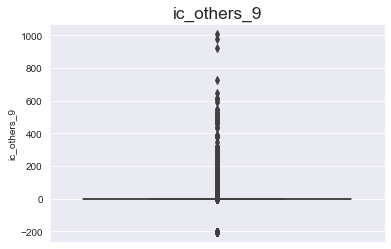

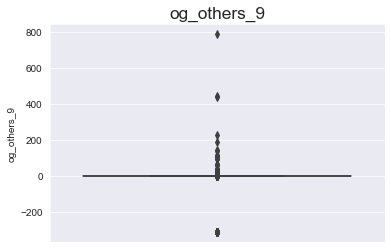

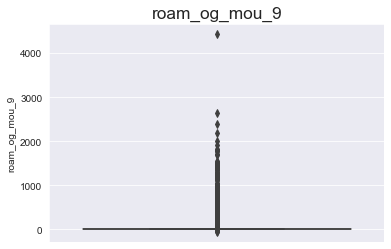

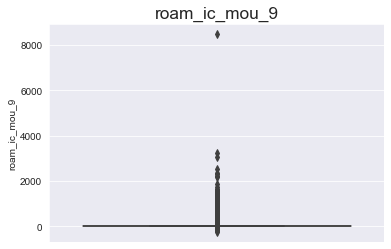

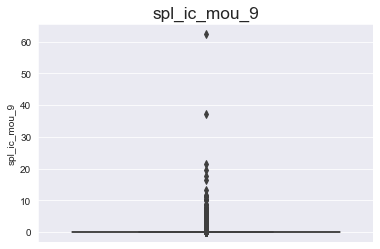

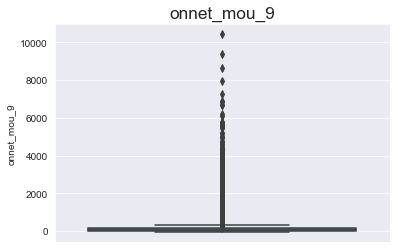

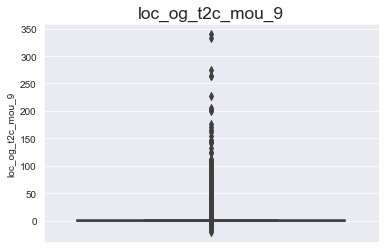

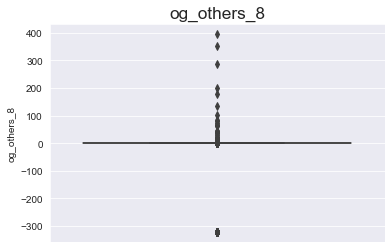

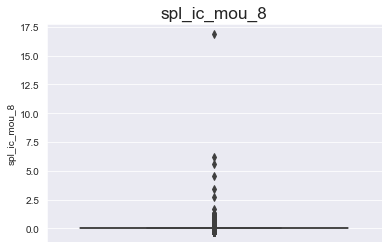

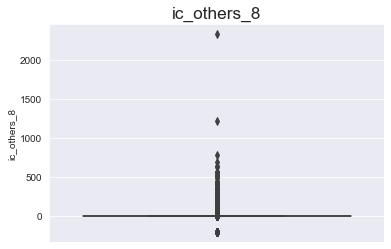

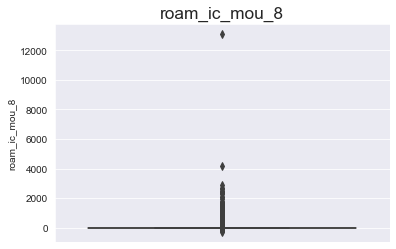

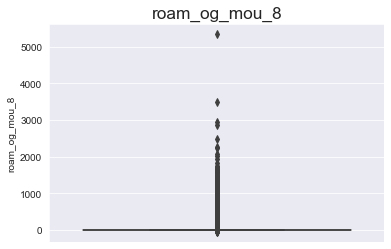

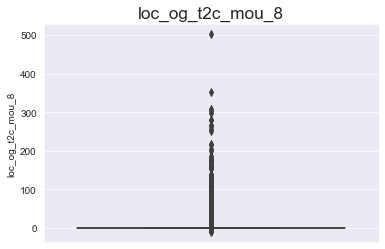

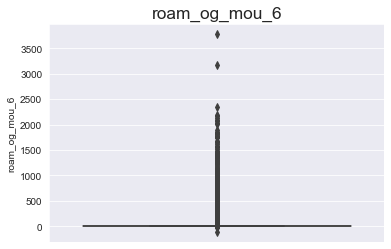

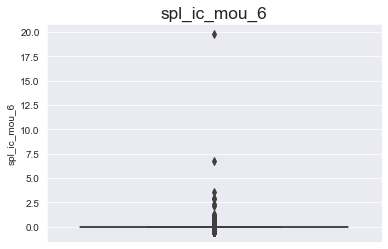

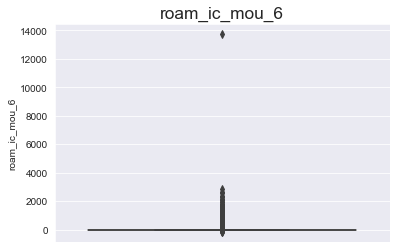

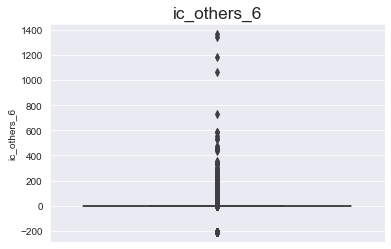

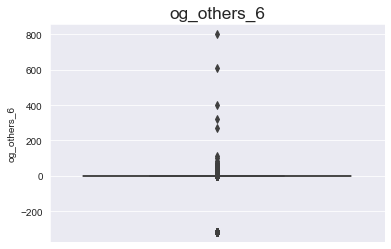

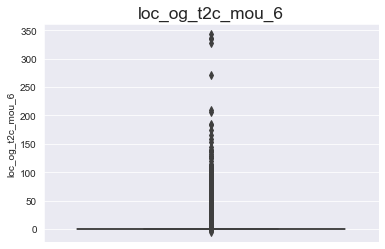

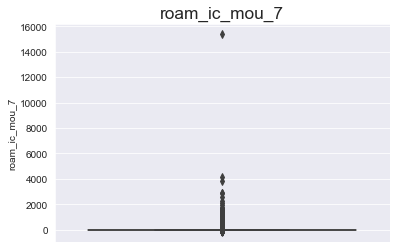

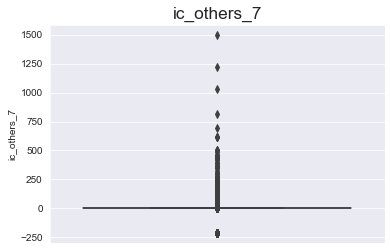

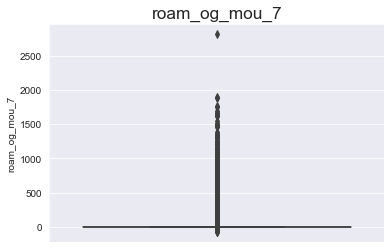

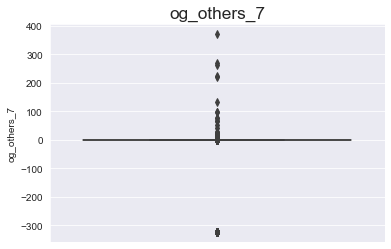

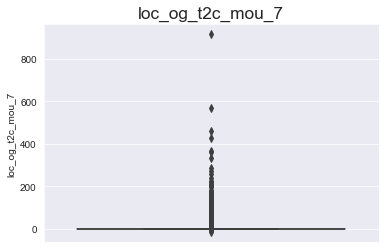

In [67]:
for col in cols_to_handle:
    plot_graphs(telecom_data_clean,col)

It can be observed that these columns have values less than zero. 
Now, all of these columns are related to minutes. They can't be zero. Let's cap all the negative values to zero.

In [68]:
# create copy of the data frame
telecom_data_clean_copy = telecom_data_clean.copy()

# cap all the negative values to zero.
for col in cols_to_handle:
    telecom_data_clean_copy[col][telecom_data_clean_copy[col] < 0] = 0

In [69]:
# check summary of them
telecom_data_clean_copy[cols_to_handle].describe()

ic_others_9   og_others_9  roam_og_mou_9  roam_ic_mou_9  spl_ic_mou_9  \
count  99999.000000  99999.000000   99999.000000   99999.000000  99999.000000   
mean       0.938382      0.043780       8.836255       7.241549      0.150502   
std       11.895147      3.491866      56.174901      55.189301      0.508878   
min        0.000000      0.000000       0.000000       0.000000      0.000000   
25%        0.000000      0.000000       0.000000       0.000000      0.000000   
50%        0.000000      0.000000       0.000000       0.000000      0.000000   
75%        0.000000      0.000000       0.000000       0.000000      0.010000   
max     1005.230000    787.790000    4428.460000    8464.030000     62.380000   

        onnet_mou_9  loc_og_t2c_mou_9   og_others_8  spl_ic_mou_8  \
count  99999.000000      99999.000000  99999.000000  99999.000000   
mean     130.533631          1.294836      0.031577      0.038191   
std      296.296031          5.412939      2.260134      0.142454   
min        0.000000          0.000000      0.000000      0.000000   
25%        6.630000          0.000000      0.000000      0.000000   
50%       37.140000          0.000000      0.000000      0.000000   
75%      132.876023          0.280000      0.000000      0.000000   
max    10427.460000        339.840000    394.930000     16.860000   

        ic_others_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  99999.000000   99999.000000   99999.000000      99999.000000   
mean       0.918590       8.471766       9.920911          1.550447   
std       12.924043      67.036643      63.025359          6.628318   
min        0.000000       0.000000       0.000000          0.000000   
25%        0.000000       0.000000       0.000000          0.000000   
50%        0.000000       0.000000       0.000000          0.000000   
75%        0.000000       0.000000       0.000000          0.160000   
max     2327.510000   13095.360000    5337.040000        502.090000   

       roam_og_mou_6  spl_ic_mou_6  roam_ic_mou_6   ic_others_6   og_others_6  \
count   99999.000000  99999.000000   99999.000000  99999.000000  99999.000000   
mean       14.337546      0.059133      10.261796      0.821007      0.436277   
std        70.060016      0.158174      71.539191     11.718638      4.044839   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000      0.000000   
50%         0.000000      0.000000       0.000000      0.000000      0.000000   
75%         0.000000      0.000000       0.000000      0.000000      0.000000   
max      3775.110000     19.760000   13724.380000   1362.940000    800.890000   

       loc_og_t2c_mou_6  roam_ic_mou_7   ic_others_7  roam_og_mou_7  \
count      99999.000000   99999.000000  99999.000000   99999.000000   
mean           1.628211       6.980178      0.973870      10.116569   
std            5.899521      72.266972     12.427693      57.394089   
min            0.000000       0.000000      0.000000       0.000000   
25%            0.000000       0.000000      0.000000       0.000000   
50%            0.000000       0.000000      0.000000       0.000000   
75%            0.000000       0.000000      0.000000       0.000000   
max          342.860000   15371.040000   1495.940000    2812.040000   

        og_others_7  loc_og_t2c_mou_7  
count  99999.000000      99999.000000  
mean       0.029069          1.798714  
std        2.119603          7.728139  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        0.000000          0.000000  
max      370.130000        916.240000

## Step 3: Filtering High Value Customers


In [70]:
# Calculate average recharge amount for months 6 and 7, i.e, for months June and July, since these are considered
# to be the 'Good Phase'
telecom_data_clean_copy['total_avg_amt_6_7'] = (telecom_data_clean_copy['total_rech_amt_6'] + telecom_data_clean_copy['total_rech_amt_7'])/2

In [71]:
# calculate the 70th percentile recharge amount
per_70 = telecom_data_clean_copy['total_avg_amt_6_7'].describe(percentiles=[0.7])['70%']
print('Average recharge amount at 70th percentile:', per_70)

Average recharge amount at 70th percentile: 368.5


In [72]:
# extract the customers with more than or equal to 70th percentile of average recharge amount for 6th and 7th months
telecom_data_70 = telecom_data_clean_copy.loc[telecom_data_clean_copy['total_avg_amt_6_7'] >= per_70, :]
telecom_data_70 = telecom_data_70.reset_index(drop=True)
telecom_data_70.shape

(30011, 200)

### Around 30k entries have been extracted. These 30k records are indeed the top 30% customers who contribute the hightest revenue to the telecom firm.

In [73]:
# drop the created variable used to extract high value customers
cols_to_drop = ['total_avg_amt_6_7']

# drop the above column
drop_columns(cols_to_drop, telecom_data_70)

# empty the list
cols_to_drop = []

# check shape again
telecom_data_70.shape

(30011, 199)

In [74]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data_70)
num_cols = getNumCols(telecom_data_70)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  0
Numerical columns:  199


## Step 4: Deriving Target variable (Churn)

In [75]:
# Calculate the total usage of calling minutes for month 9, i.e, September month ('Churn' phase)
telecom_data_70['total_calls_mou_9'] = telecom_data_70['total_ic_mou_9'] + telecom_data_70['total_og_mou_9']

# Calculate the total usage of data for month 9, i.e, September month ('Churn' phase)
telecom_data_70['total_data_mou_9'] = telecom_data_70['vol_2g_mb_9'] + telecom_data_70['vol_3g_mb_9']

# create target variable 'churn' based on the below condition:
# The customers who have not utilized either calls or data in the 9th month are the ones who are considered to be churned 
telecom_data_70['churn'] = telecom_data_70.apply(lambda x: 1 if (x['total_calls_mou_9'] == 0 
                                                                 and x['total_data_mou_9'] == 0 ) else 0, axis=1)

In [76]:
# drop all the columns related to 'Churn' Phase, i.e, the columns related to September
sept_cols = [col for col in telecom_data_70.columns if '_9' in col]
sept_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'night_pck_user_9_0.0',
 'night_pck_user_9_1.0',
 'monthly_2g_9_1',
 'monthly_2g_9_2',
 'monthly_2g_9_3',
 'monthly_2g_9_4',
 'fb_user_9_0.0',
 'fb_user_9_1.0',
 'total_calls_mou_9',
 'total_data_mou_9']

In [77]:
# drop the columns related to 9th month
cols_to_drop = sept_cols

# drop the above columns
drop_columns(cols_to_drop, telecom_data_70)

# empty the list
cols_to_drop = []

# check shape again
telecom_data_70.shape

(30011, 150)

## Step 5: Data preparation

### 5.1 Derive new variables
It would be interesting to find out the change in behaviour of the customers when they entered *'Action'* phase from *'Good'* phase. That is from June and July months to August month. This change can be captured by deriving new columns using the columns that indicates **Recharge value**, **Data usage**, **Incoming and Outgoing calls** and **Average revenue per user(Arpu)**. The difference between the August(8th month) values and average of June(6th month) and July(7th month) values would give out some patterns.

In [78]:
# extract the relevant august columns
aug_cols = [col for col in telecom_data_70.columns if ('_8' in col) and (('_ic' in col or 'og' in col or '_rech' in col)
            or ('arpu') in col)]
print(aug_cols)
len(aug_cols)

['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8']


33

In [79]:
# extract the relevant july columns
july_cols = [col for col in telecom_data_70.columns if ('_7' in col) and (('_ic' in col or 'og' in col or '_rech' in col)
            or ('arpu') in col)]
print(july_cols)
len(july_cols)

['arpu_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7']


33

In [80]:
# extract the relevant june columns
june_cols = [col for col in telecom_data_70.columns if ('_6' in col) and (('_ic' in col or 'og' in col or '_rech' in col)
            or ('arpu') in col)]

print(june_cols)
len(june_cols)

['arpu_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6']


33

In [81]:
# create new features
for i in range(len(aug_cols)):
    new_col = aug_cols[i].split('_8')[0] + '_diff'
    telecom_data_70[new_col] = telecom_data_70[aug_cols[i]] - ((telecom_data_70[june_cols[i]] + telecom_data_70[july_cols[i]])/2)

In [82]:
# Pull out the new derived columns
diff_cols = [col for col in telecom_data_70.columns if '_diff' in col]
print(diff_cols)
len(diff_cols)

['arpu_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff', 'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff', 'loc_og_t2c_mou_diff', 'loc_og_mou_diff', 'std_og_t2t_mou_diff', 'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff', 'total_og_mou_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff', 'loc_ic_t2f_mou_diff', 'loc_ic_mou_diff', 'std_ic_t2t_mou_diff', 'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'std_ic_mou_diff', 'total_ic_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'av_rech_amt_data_diff']


33

In [83]:
# check head of the derived columns
telecom_data_70[diff_cols].head()

arpu_diff  roam_ic_mou_diff  roam_og_mou_diff  loc_og_t2t_mou_diff  \
0  1961.9650             6.780            19.895               -1.105   
1  -298.1100             0.000             0.000             -244.870   
2   244.0015           -11.775           -20.180                8.100   
3  -177.5280            -1.415            -8.870               13.495   
4  -328.9950             2.430             9.110              -19.495   

   loc_og_t2m_mou_diff  loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  \
0             -215.725               -5.405                 0.00   
1              -25.230                0.000                 7.15   
2              195.255               21.240                 0.49   
3              -81.360                8.020                 0.00   
4              -29.270                0.000                 0.00   

   loc_og_mou_diff  std_og_t2t_mou_diff  std_og_t2m_mou_diff  \
0         -222.245               -1.785                8.315   
1         -270.095             -102.415               63.825   
2          224.595              232.035                2.790   
3          -59.845               -2.005              -25.460   
4          -48.770             -573.860               -0.775   

   std_og_t2f_mou_diff  std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  \
0                 3.31            9.840             9.92             4.25   
1                 0.00          -38.590             0.00            10.23   
2                 0.00          234.825             1.29             4.78   
3                 0.00          -27.460             0.00             4.28   
4                 0.00         -574.635             0.00            -1.29   

   og_others_diff  total_og_mou_diff  loc_ic_t2t_mou_diff  \
0           0.000           -198.225              -17.890   
1           0.000           -298.450              -16.530   
2           0.000            465.510               14.850   
3           0.000            -83.030              -27.495   
4          -0.465           -625.170              -17.270   

   loc_ic_t2m_mou_diff  loc_ic_t2f_mou_diff  loc_ic_mou_diff  \
0              -98.335              -87.280         -203.515   
1              -20.300                0.000          -36.840   
2              114.475                5.085          134.415   
3              -38.090               24.015          -41.565   
4              -24.860                0.000          -42.135   

   std_ic_t2t_mou_diff  std_ic_t2m_mou_diff  std_ic_t2f_mou_diff  \
0                6.030               32.115              -21.005   
1               -0.190              -12.605                0.000   
2               77.595              148.950                1.910   
3              -67.385               28.050                1.925   
4               -4.315               -0.640                0.000   

   std_ic_mou_diff  total_ic_mou_diff  spl_ic_mou_diff  isd_ic_mou_diff  \
0           17.130           -163.510           -0.105           23.295   
1          -12.795            -49.635            0.000            0.000   
2          228.460            573.935           -0.225          239.695   
3          -37.420            -78.750            0.000            0.230   
4           -4.955            -47.095            0.000            0.000   

   total_rech_num_diff  total_rech_amt_diff  max_rech_amt_diff  \
0                  2.0               2453.0              395.0   
1                 -6.0               -399.0              -92.0   
2                  6.0                337.0               20.0   
3                 -6.0               -299.0               20.0   
4                 -6.5               -378.0              -25.0   

   total_rech_data_diff  max_rech_data_diff  av_rech_amt_data_diff  
0                   0.0                 0.0                    0.0  
1                   2.0               -54.0                  -19.5  
2                   3.0                23.0                   69.0  
3                   0.

In [84]:
# check summary of derived columns
telecom_data_70[diff_cols].describe()

arpu_diff  roam_ic_mou_diff  roam_og_mou_diff  loc_og_t2t_mou_diff  \
count  30011.000000      30011.000000      30011.000000         30011.000000   
mean     -53.352483         -1.301107         -4.100351            -7.113573   
std      341.135243         66.415963         96.194787           143.299153   
min    -5811.052500      -1510.645000      -2410.835000         -3875.375000   
25%     -195.245500          0.000000         -0.640000           -20.350000   
50%      -46.093500          0.000000          0.000000            -1.865000   
75%       90.206250          0.000000          0.000000            12.216326   
max    12808.617000       2277.980000       3057.150000          6412.690000   

       loc_og_t2m_mou_diff  loc_og_t2f_mou_diff  loc_og_t2c_mou_diff  \
count         30011.000000         30011.000000         30011.000000   
mean            -11.769339            -0.468972            -0.036600   
std             151.457256            14.478415             7.233540   
min           -2863.535000         -1319.850000          -384.385000   
25%             -46.671516            -1.455000            -0.385632   
50%              -5.010000             0.000000             0.000000   
75%              28.335000             0.617137             0.000000   
max            3158.700000           452.720000           193.355000   

       loc_og_mou_diff  std_og_t2t_mou_diff  std_og_t2m_mou_diff  \
count     30011.000000         30011.000000         30011.000000   
mean        -19.352452           -20.856585           -26.796192   
std         219.614717           284.972053           312.031670   
min       -3867.830000         -5391.210000         -7037.535000   
25%         -70.900000           -24.780000           -40.935000   
50%          -7.870000             0.000000            -0.870000   
75%          39.515000             5.395000            12.117500   
max        4619.975000          4806.465000         12685.460000   

       std_og_t2f_mou_diff  std_og_mou_diff  isd_og_mou_diff  spl_og_mou_diff  \
count         30011.000000     30011.000000     30011.000000     30011.000000   
mean             -0.211148       -47.864372        -0.189973         0.325918   
std               8.183947       441.891166        14.289367        19.958118   
min            -314.280000     -7127.425000      -618.854613     -1081.910000   
25%               0.000000       -90.800000         0.000000        -2.572500   
50%               0.000000        -1.930000         0.000000         0.000000   
75%               0.000000        23.770000         0.000000         1.880000   
max             339.250000     12715.480000       544.780000      1112.655000   

       og_others_diff  total_og_mou_diff  loc_ic_t2t_mou_diff  \
count    30011.000000       30011.000000         30011.000000   
mean        -0.310922         -74.136452            -2.612099   
std          2.893725         522.991551           101.582163   
min        -99.570000       -7213.410000         -3021.870000   
25%          0.000000        -217.340000           -16.502500   
50%          0.000000         -35.440000            -1.225000   
75%          0.000000          95.047500            11.995000   
max        366.590000       12768.705000          3743.340000   

       loc_ic_t2m_mou_diff  loc_ic_t2f_mou_diff  loc_ic_mou_diff  \
count         30011.000000         30011.000000     30011.000000   
mean             -4.301527            -1.115706        -8.029579   
std             134.354466            29.377217       180.042783   
min           -2384.855000          -928.210000     -2843.355751   
25%             -37.025000            -3.190000       -53.680000   
50%              -2.475000             0.000000        -4.300000   
75%              30.080000             1.870000        41.085000   
max            4940.150000          1039.310000      4940.125000   

       std_ic_t2t_mou_diff  std_ic_t2m_mou_diff  std_ic_t2f_mou_diff  \
count         30011.000000

#### All of these columns have their minimnum value as negative numbers, indicating that there was indeed a change in customers' behaviour.

In [85]:
# check shape of entire data set
telecom_data_70.shape

(30011, 183)

In [86]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(telecom_data_70)
num_cols = getNumCols(telecom_data_70)

print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  0
Numerical columns:  183


### 5.2 EDA

In [87]:
# Analyse Target variable 'churn'
telecom_data_70['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [88]:
# print the percentage of each class of 'churn'
print(((telecom_data_70['churn'].value_counts() / telecom_data_70.shape[0])*100).round(2))

0    91.36
1     8.64
Name: churn, dtype: float64


#### There is around 9% churn rate

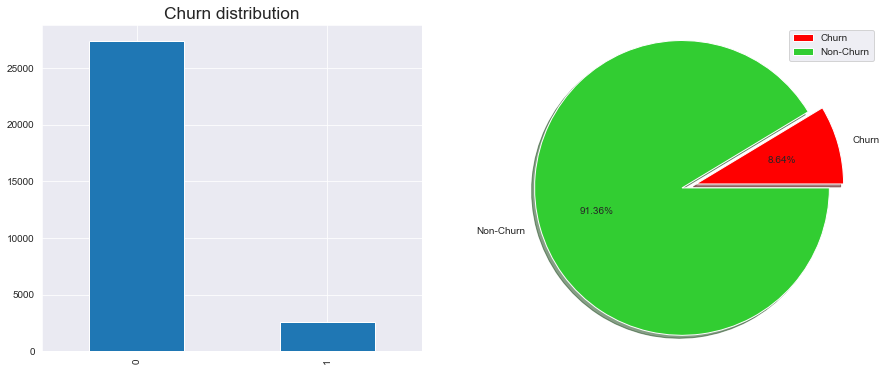

In [89]:
# visualize target variable
plt.figure(figsize=(15,6))
plt.subplot(121)
telecom_data_70['churn'].value_counts().plot(kind='bar')
plt.title('Churn distribution', fontsize='xx-large')

plt.subplot(122)
non_churn = ((telecom_data_70['churn'].value_counts() / telecom_data_70.shape[0])*100).round(2)[0]
churn = ((telecom_data_70['churn'].value_counts() / telecom_data_70.shape[0])*100).round(2)[1]
labels = 'Churn', 'Non-Churn'
sizes = [churn, non_churn]
colors = ['red', 'limegreen']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=360)
plt.axis('equal')
plt.legend(loc='best')

plt.show()

There is a huge imbalance in the data. This will be handled later.

In [90]:
def distplot(df, col1, col2, col3, title1, title2, title3):
        plt.figure(figsize=(15,6))
        plt.subplot(131)
        sns.distplot(df[col1])
        plt.title(title1, fontsize='x-large')
        
        plt.subplot(132)
        sns.distplot(df[col2])
        plt.title(title2, fontsize='x-large')
        
        plt.subplot(133)
        sns.distplot(df[col3])
        plt.title(title3, fontsize='x-large')
        
        plt.show()

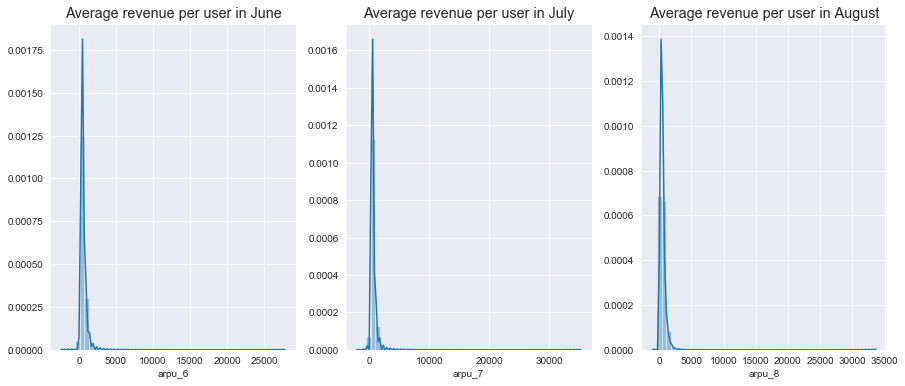

In [91]:
# plot ARPU (Average revenue per user for 'Good' and 'Action' phases)
title1 = 'Average revenue per user in June'
title2 = 'Average revenue per user in July'
title3 = 'Average revenue per user in August'
distplot(telecom_data_70, 'arpu_6', 'arpu_7', 'arpu_8', title1, title2, title3)

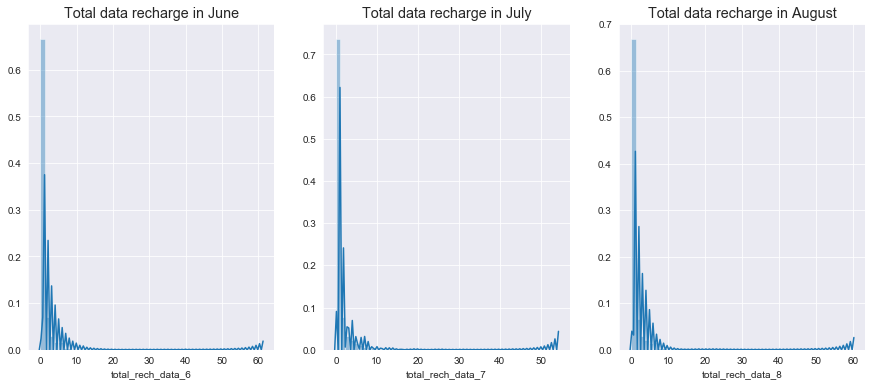

In [92]:
# plot Total data recharge for 'Good' and 'Action' phases
title1 = 'Total data recharge in June'
title2 = 'Total data recharge in July'
title3 = 'Total data recharge in August'
distplot(telecom_data_70, 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', title1, title2, title3)

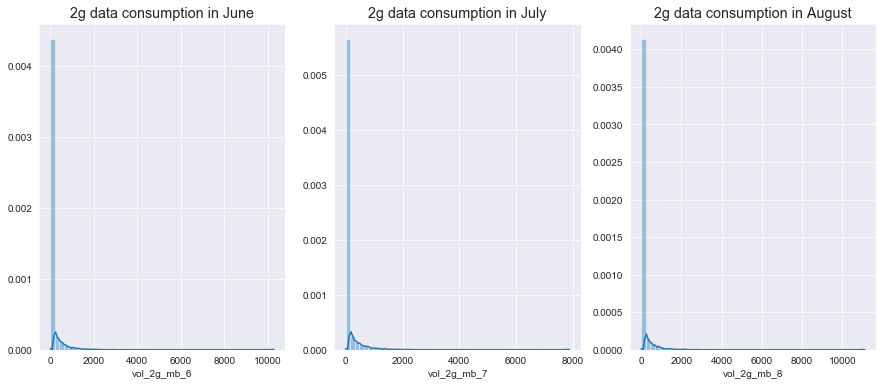

In [93]:
# plot 2g data consumption for 'Good' and 'Action' phases
title1 = '2g data consumption in June'
title2 = '2g data consumption in July'
title3 = '2g data consumption in August'
distplot(telecom_data_70, 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', title1, title2, title3)

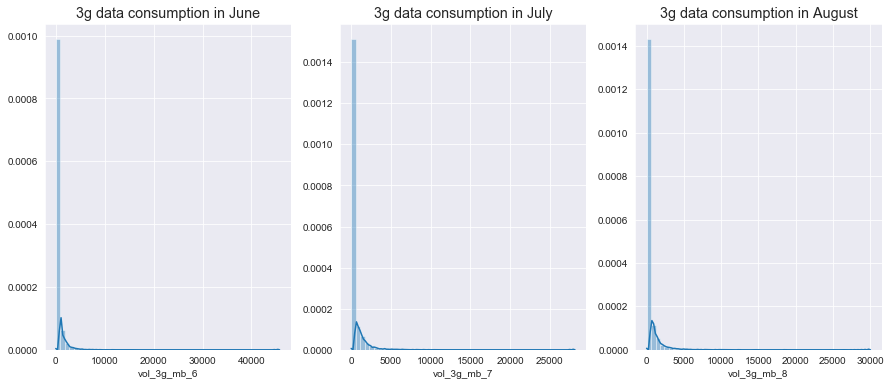

In [94]:
# plot 3g data consumption for 'Good' and 'Action' phases
title1 = '3g data consumption in June'
title2 = '3g data consumption in July'
title3 = '3g data consumption in August'
distplot(telecom_data_70, 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', title1, title2, title3)

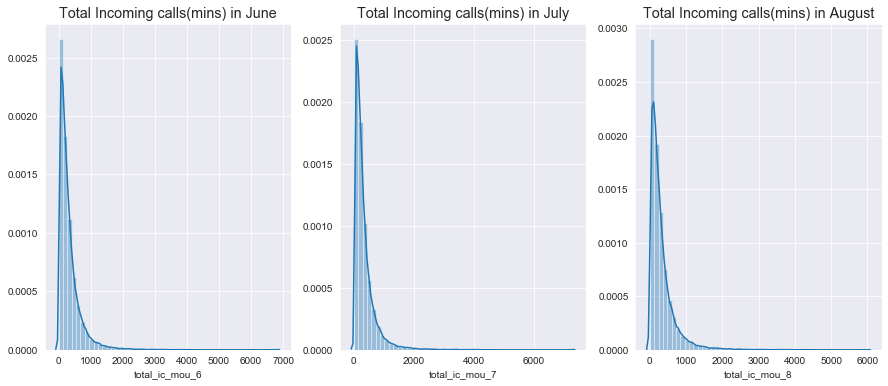

In [95]:
# plot Total Incoming calls in minutes for 'Good' and 'Action' phases
title1 = 'Total Incoming calls(mins) in June'
title2 = 'Total Incoming calls(mins) in July'
title3 = 'Total Incoming calls(mins) in August'
distplot(telecom_data_70, 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', title1, title2, title3)

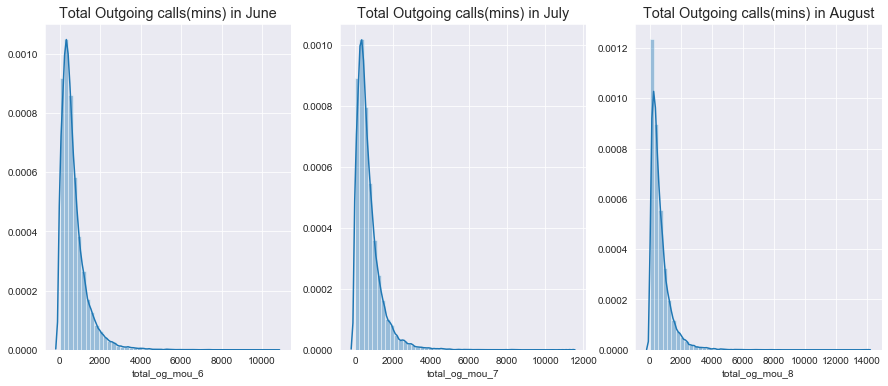

In [96]:
# plot Total Outgoing calls in minutes for 'Good' and 'Action' phases
title1 = 'Total Outgoing calls(mins) in June'
title2 = 'Total Outgoing calls(mins) in July'
title3 = 'Total Outgoing calls(mins) in August'
distplot(telecom_data_70, 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', title1, title2, title3)

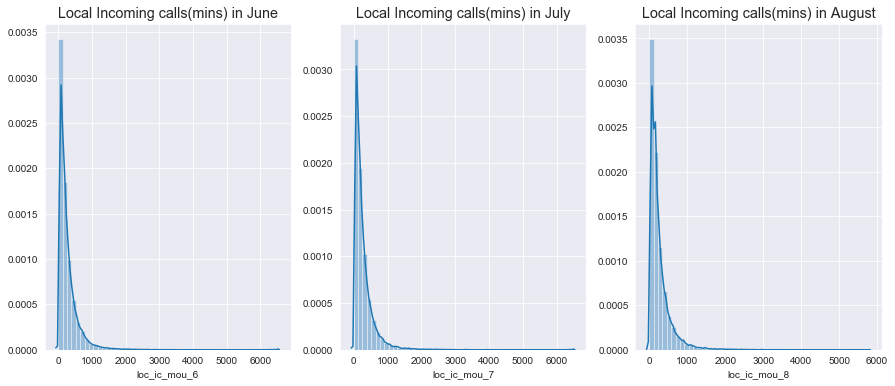

In [97]:
# plot Local Incoming calls in minutes for 'Good' and 'Action' phases
title1 = 'Local Incoming calls(mins) in June'
title2 = 'Local Incoming calls(mins) in July'
title3 = 'Local Incoming calls(mins) in August'
distplot(telecom_data_70, 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', title1, title2, title3)

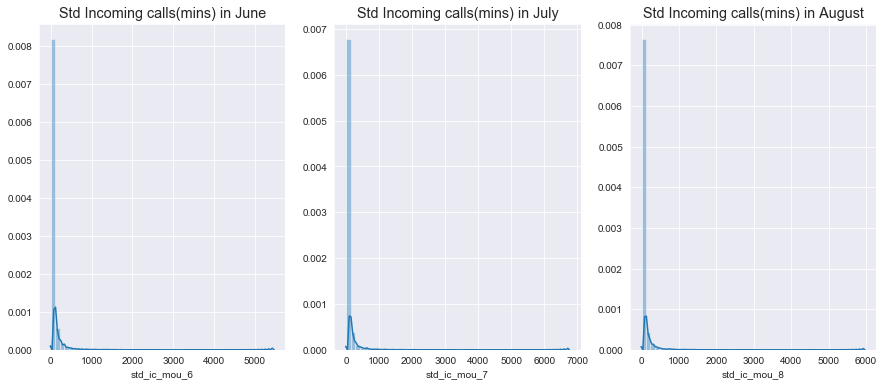

In [98]:
# plot Std Incoming calls in minutes for 'Good' and 'Action' phases
title1 = 'Std Incoming calls(mins) in June'
title2 = 'Std Incoming calls(mins) in July'
title3 = 'Std Incoming calls(mins) in August'
distplot(telecom_data_70, 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', title1, title2, title3)

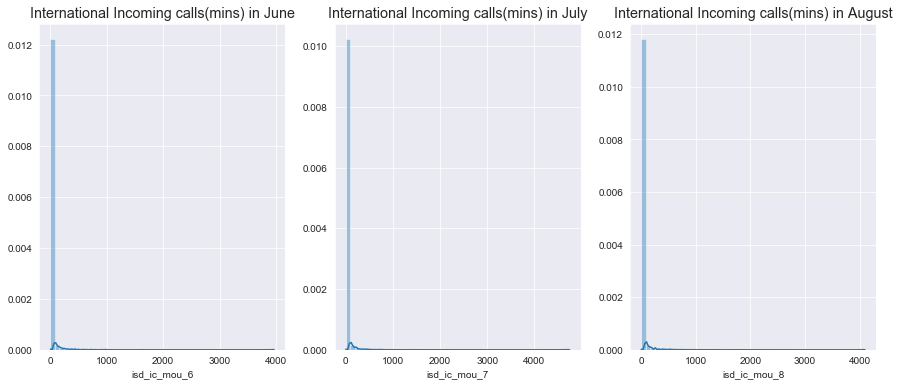

In [99]:
# plot International Incoming calls in minutes for 'Good' and 'Action' phases
title1 = 'International Incoming calls(mins) in June'
title2 = 'International Incoming calls(mins) in July'
title3 = 'International Incoming calls(mins) in August'
distplot(telecom_data_70, 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', title1, title2, title3)

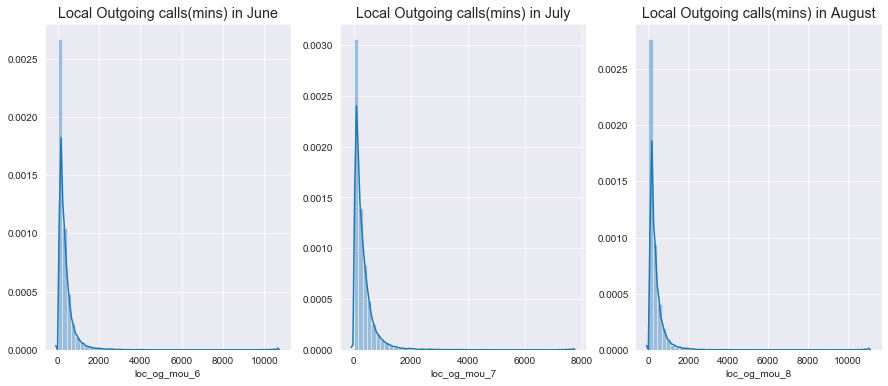

In [100]:
# plot Local Outgoing calls in minutes for 'Good' and 'Action' phases
title1 = 'Local Outgoing calls(mins) in June'
title2 = 'Local Outgoing calls(mins) in July'
title3 = 'Local Outgoing calls(mins) in August'
distplot(telecom_data_70, 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', title1, title2, title3)

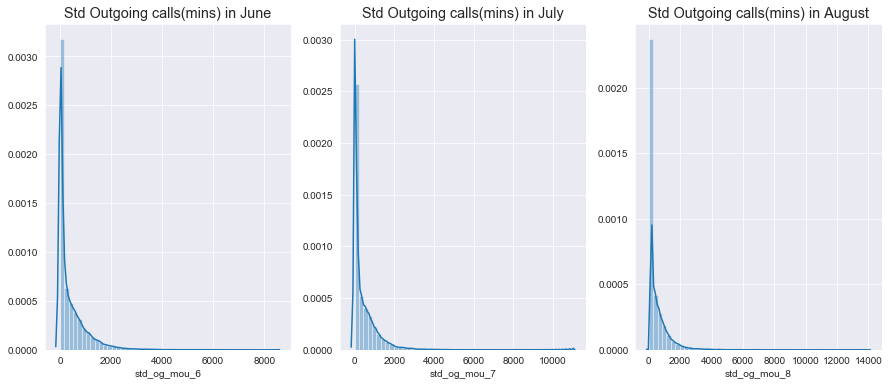

In [101]:
# plot Std Outgoing calls in minutes for 'Good' and 'Action' phases
title1 = 'Std Outgoing calls(mins) in June'
title2 = 'Std Outgoing calls(mins) in July'
title3 = 'Std Outgoing calls(mins) in August'
distplot(telecom_data_70, 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', title1, title2, title3)

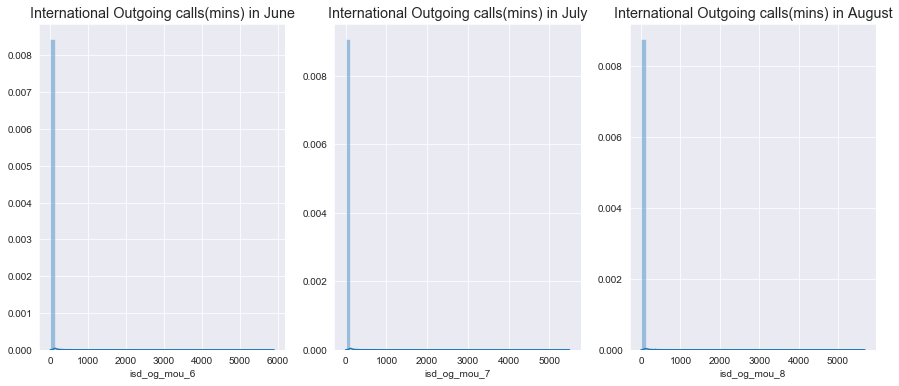

In [102]:
# plot International Outgoing calls in minutes for 'Good' and 'Action' phases
title1 = 'International Outgoing calls(mins) in June'
title2 = 'International Outgoing calls(mins) in July'
title3 = 'International Outgoing calls(mins) in August'
distplot(telecom_data_70, 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', title1, title2, title3)

In [103]:
def pairplot(df, col1, col2, col3, hue):
        plt.figure(figsize=(15,6))
        sns.pairplot(data=df[[col1,col2,col3,hue]],hue=hue)
        plt.show()

### Average revenue per user w.r.t churn

<Figure size 1080x432 with 0 Axes>

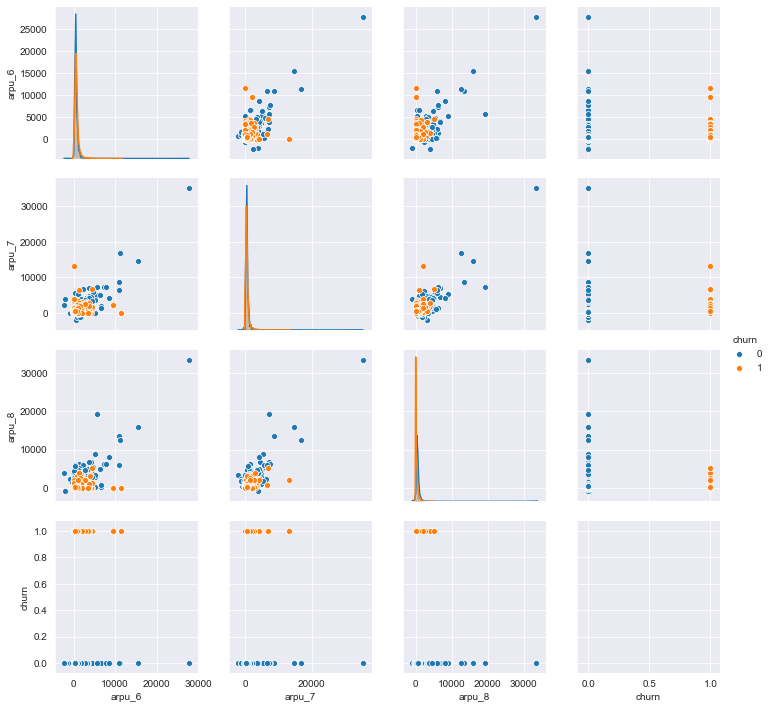

In [104]:
pairplot(telecom_data_70, 'arpu_6','arpu_7','arpu_8','churn')

### Total Outgoing Calls w.r.t churn

<Figure size 1080x432 with 0 Axes>

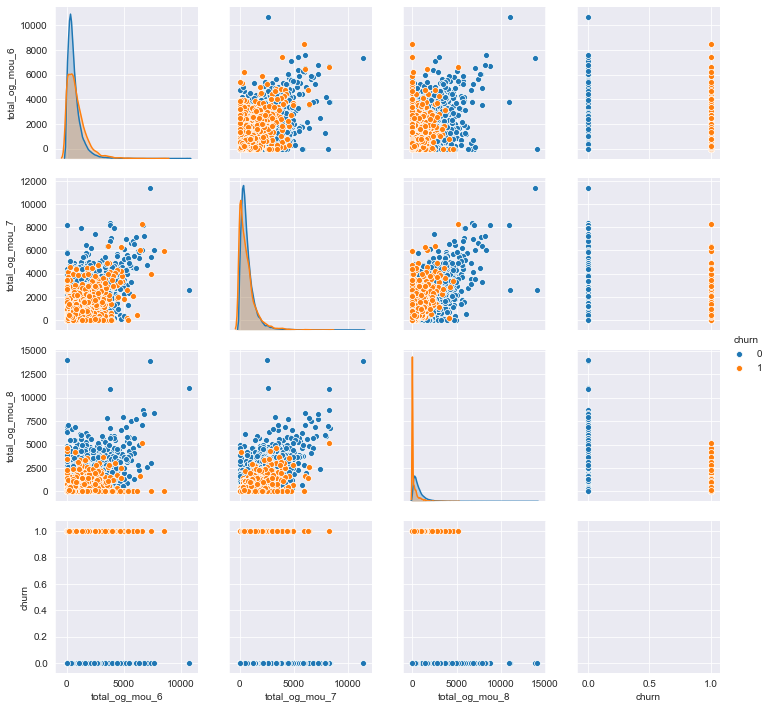

In [105]:
pairplot(telecom_data_70, 'total_og_mou_6','total_og_mou_7','total_og_mou_8','churn')

### Total Incoming Calls w.r.t churn

<Figure size 1080x432 with 0 Axes>

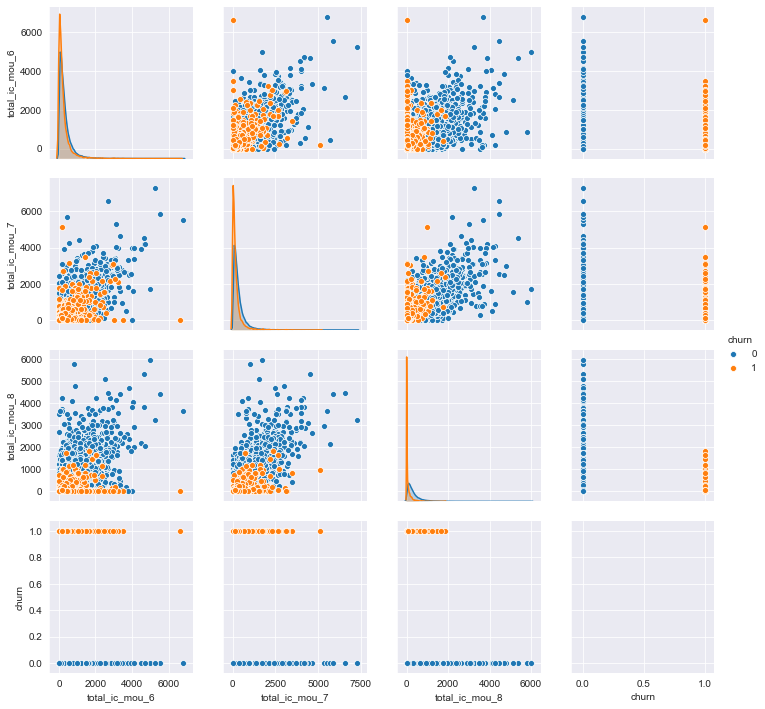

In [106]:
pairplot(telecom_data_70,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn')

### Total recharge amount in a particular month w.r.t churn

<Figure size 1080x432 with 0 Axes>

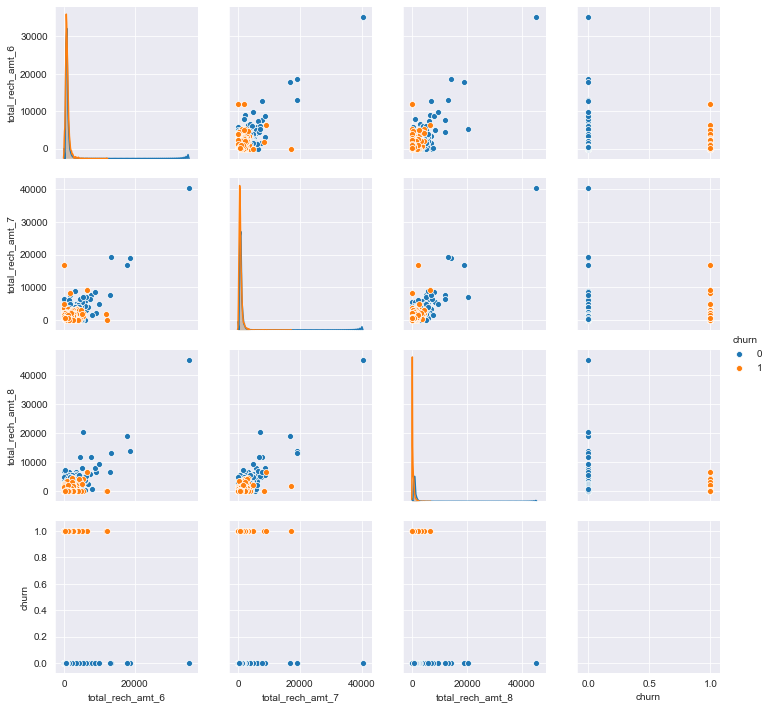

In [107]:
pairplot(telecom_data_70,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn')

### Number of times a customer recharged w.r.t churn

<Figure size 1080x432 with 0 Axes>

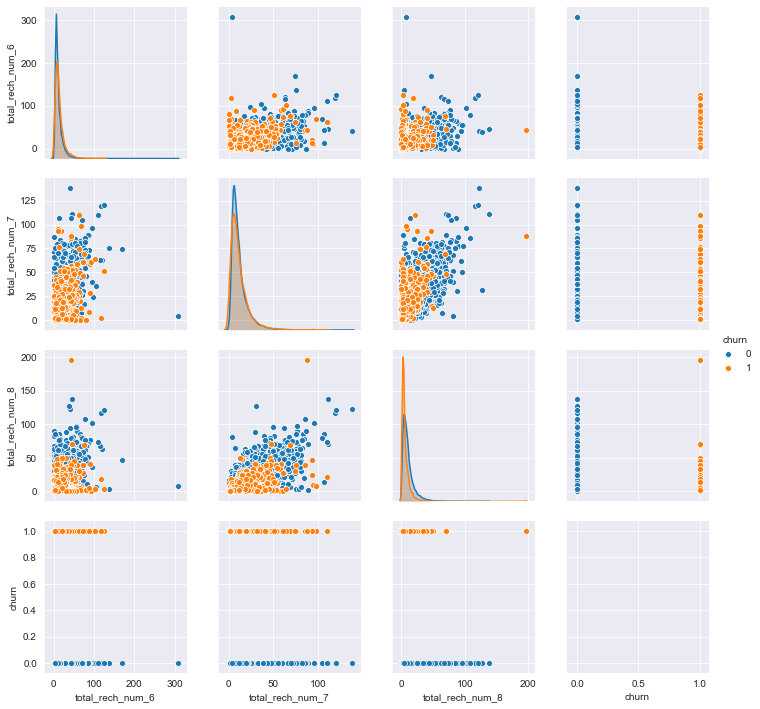

In [108]:
pairplot(telecom_data_70, 'total_rech_num_6','total_rech_num_7','total_rech_num_8','churn')

### 2g Internet usage in mb w.r.t churn

<Figure size 1080x432 with 0 Axes>

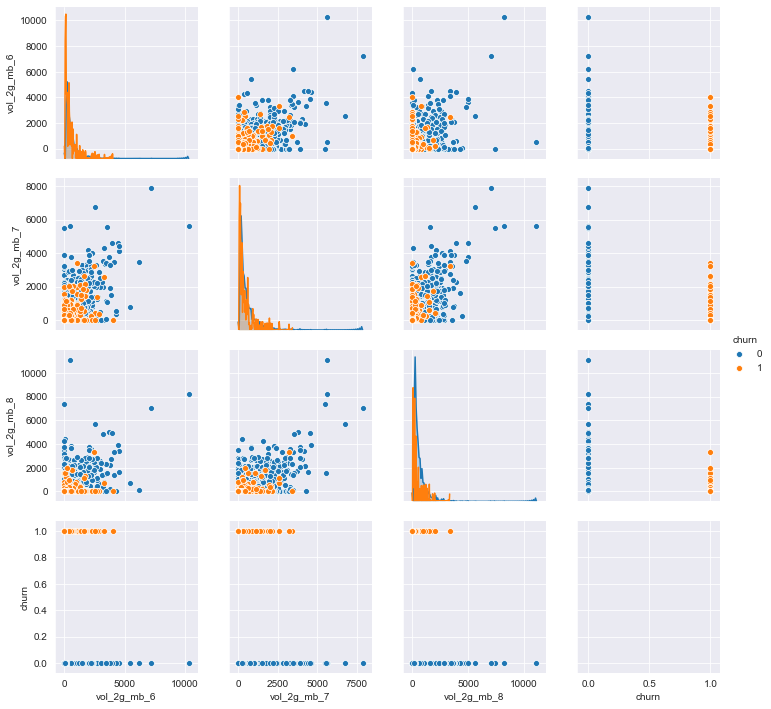

In [109]:
pairplot(telecom_data_70, 'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn')

### 3g Internet usage in mb w.r.t churn

<Figure size 1080x432 with 0 Axes>

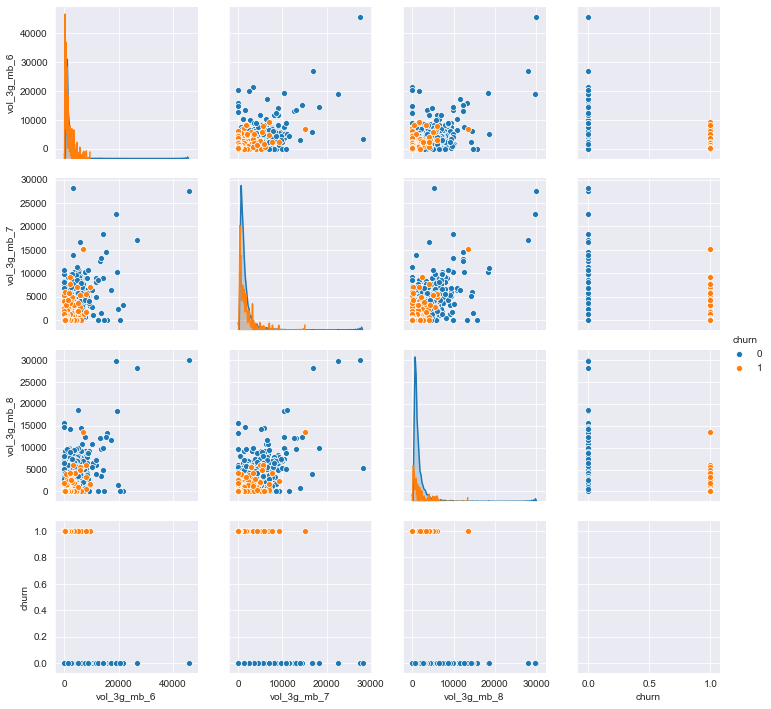

In [110]:
pairplot(telecom_data_70, 'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn')

### Total data recharge w.r.t churn

<Figure size 1080x432 with 0 Axes>

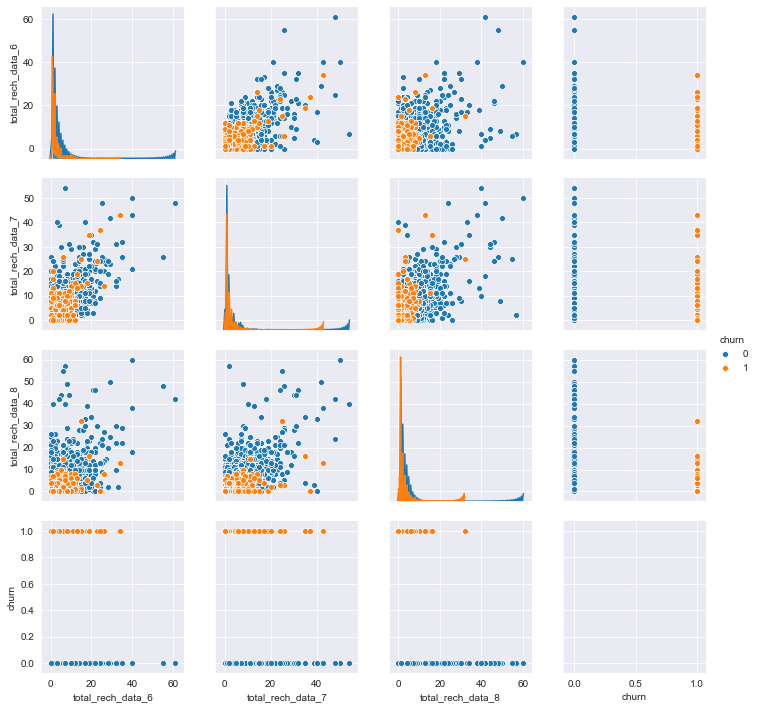

In [111]:
pairplot(telecom_data_70, 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'churn')

In [112]:
imp_num_cols = june_cols + july_cols + aug_cols
len(imp_num_cols)

99

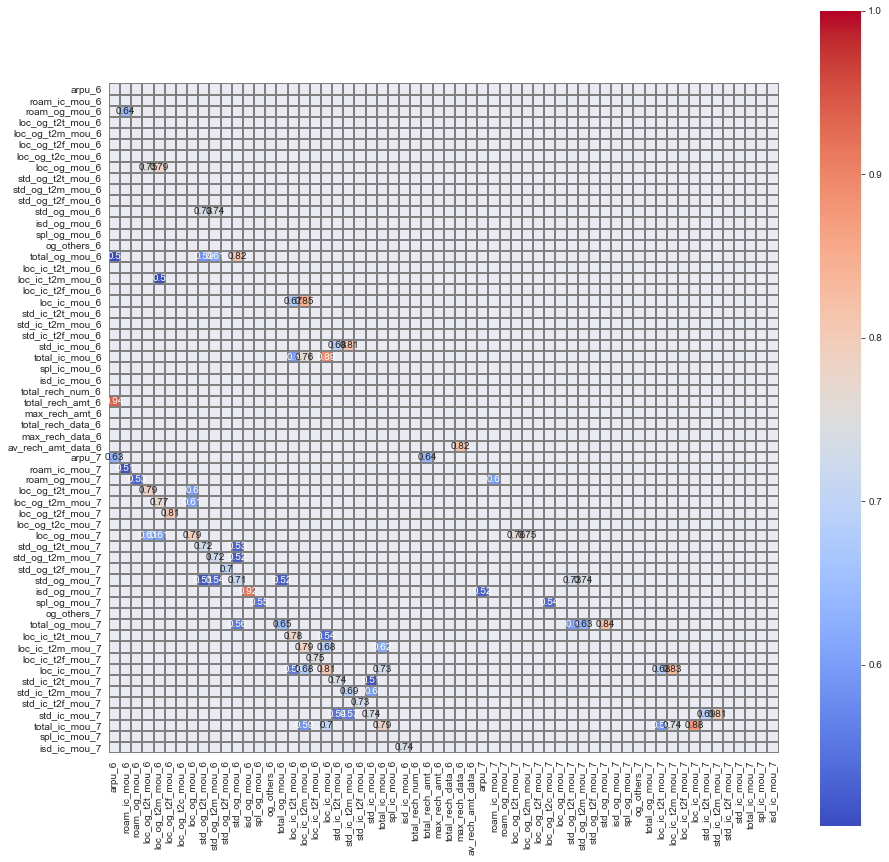

In [113]:
# plot heat map of highly correlated variables with random 60 selected.
# 1. correlations more than 0.5 (positive correlations)
# 2. correlations less tha -0.5 (negative correlations)
plt.figure(figsize=(15,15))
matrix= np.triu(telecom_data_70[imp_num_cols[:60]].corr())
corr = telecom_data_70[imp_num_cols[:60]].corr()
corr_new = corr[(corr > 0.5) | (corr < -0.5)]
sns.heatmap(corr_new, annot=True,cmap= 'coolwarm', square=True, mask=matrix,linecolor='gray', linewidths=1)
plt.show()

### 5.3: Outlier detection and treatment

- Check outliers in numerical columns.
- Exclude the dummy columns
- Exclude the target column ('churn')

In [114]:
# check length of numerical and all the dummies columns
print('All Numerical columns length:', len(num_cols))
print('All Dummy columns length:', len(dummies.columns))

All Numerical columns length: 183
All Dummy columns length: 24


In [115]:
# since dummy columns were created before imputing using IterativeImputer, there will be some columns related to month 9.
# removing them from the list
dummy_cols = [col for col in dummies.columns if '_9' not in col]
dummy_cols

['night_pck_user_6_0.0',
 'night_pck_user_6_1.0',
 'night_pck_user_7_0.0',
 'night_pck_user_7_1.0',
 'night_pck_user_8_0.0',
 'night_pck_user_8_1.0',
 'monthly_2g_6_1',
 'monthly_2g_6_2',
 'monthly_2g_6_3',
 'monthly_2g_6_4',
 'fb_user_6_0.0',
 'fb_user_6_1.0',
 'fb_user_7_0.0',
 'fb_user_7_1.0',
 'fb_user_8_0.0',
 'fb_user_8_1.0']

In [116]:
# check length of extracted dummy columns
print('Final Dummy columns length:', len(dummy_cols))

Final Dummy columns length: 16


In [117]:
# ignore dummy cols and create a new list of pure numerical columns for outlier analysis
num_cols_without_dummies = list(set(num_cols) - set(dummy_cols))
num_cols_without_dummies.remove('churn')

print('Remaining numerical columns length:', len(num_cols_without_dummies))

Remaining numerical columns length: 166


In [118]:
# plot distribution of numerical data
plt.figure(figsize=(20,20))
def plot(col):
    plt.title(col,fontsize='xx-large')
    sns.boxplot(y=telecom_data_70[col])
    plt.show()    

<Figure size 1440x1440 with 0 Axes>

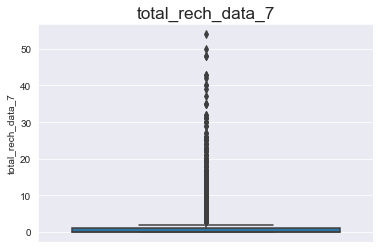

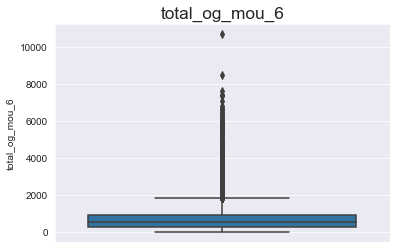

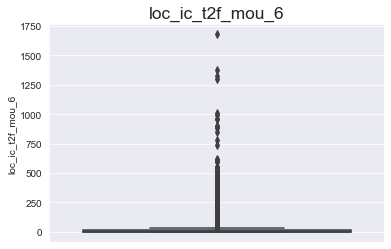

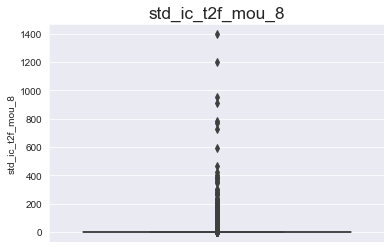

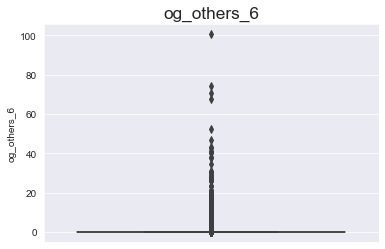

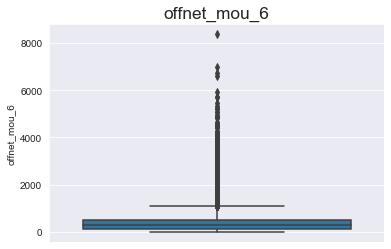

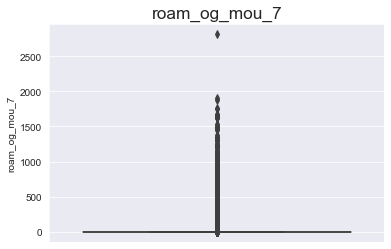

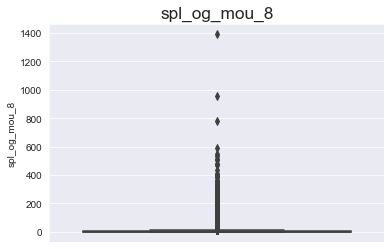

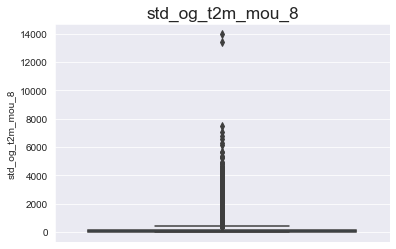

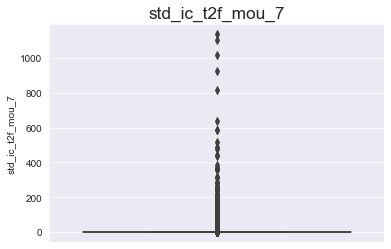

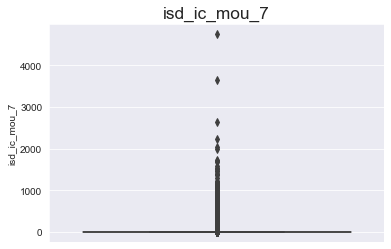

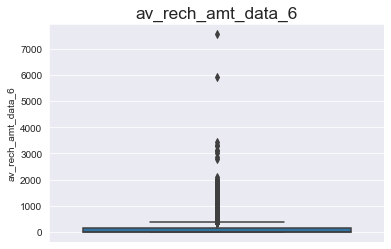

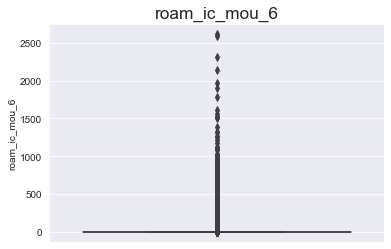

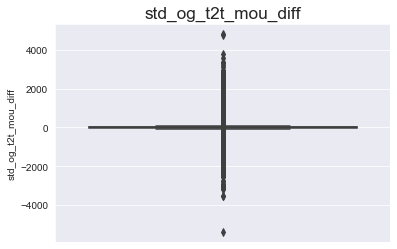

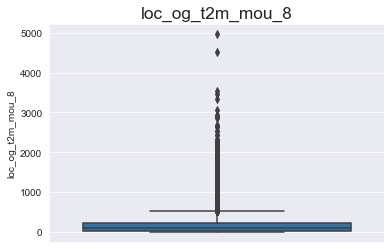

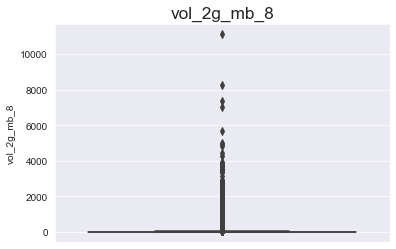

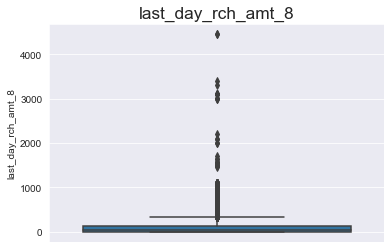

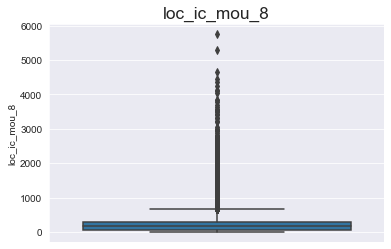

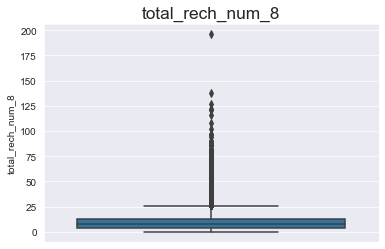

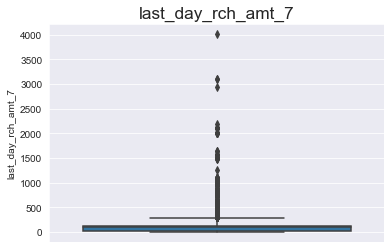

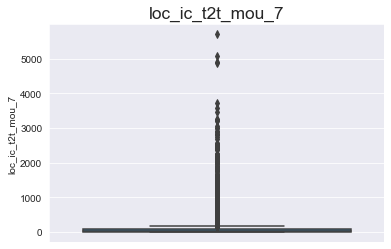

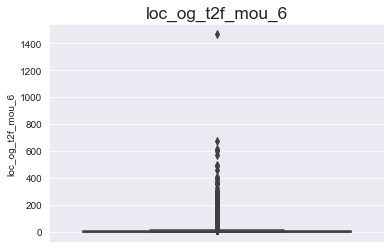

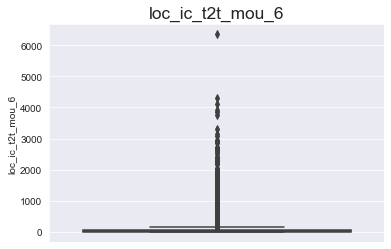

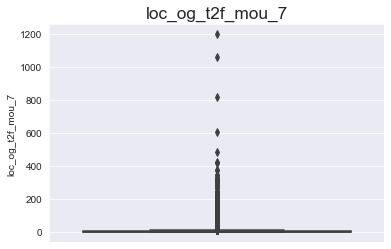

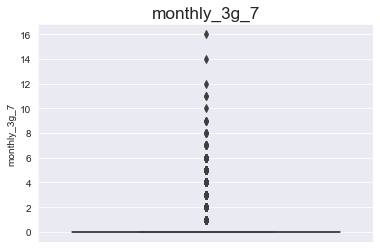

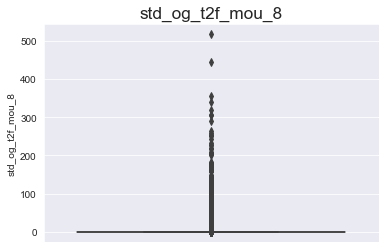

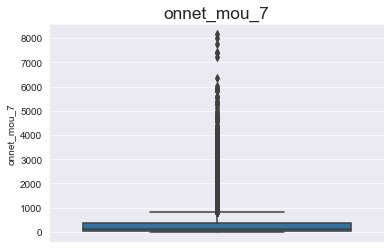

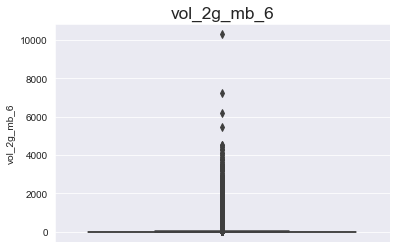

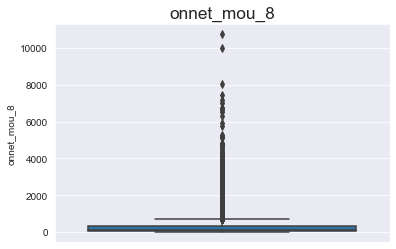

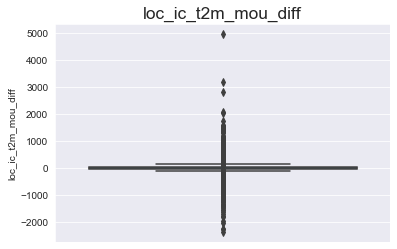

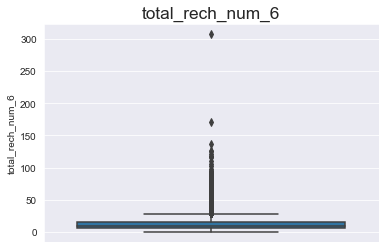

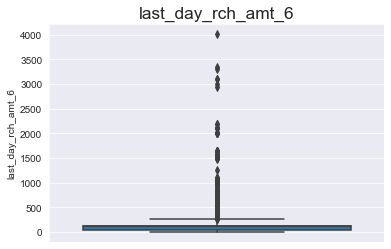

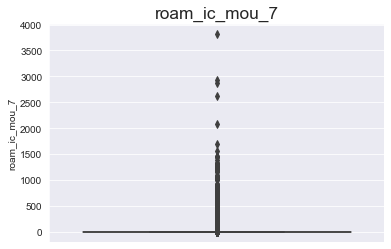

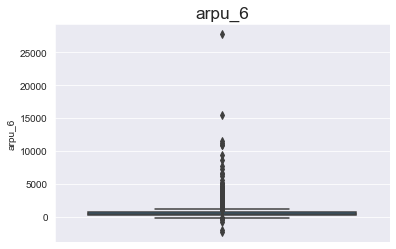

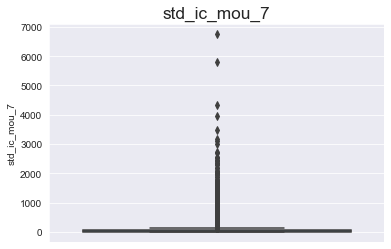

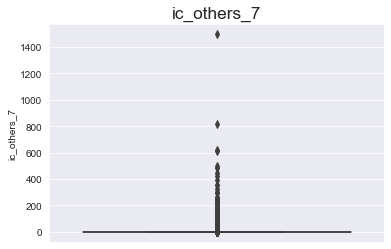

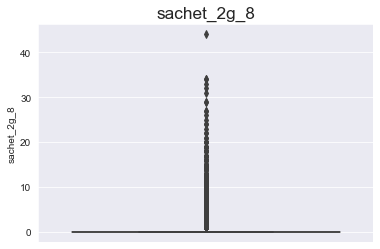

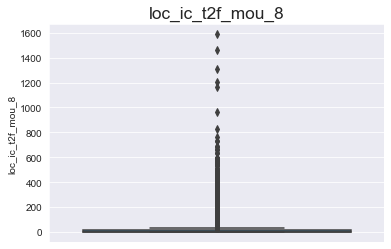

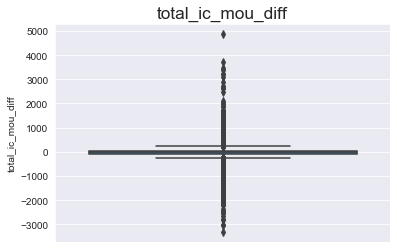

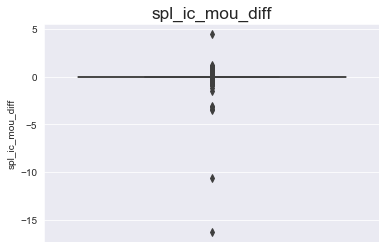

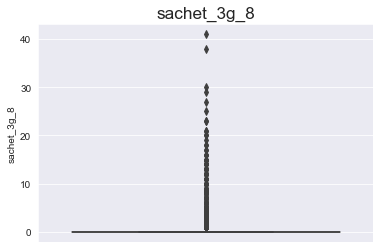

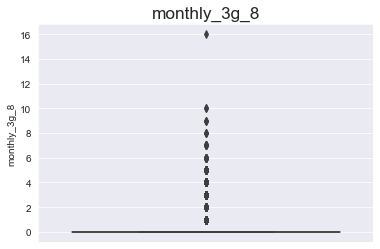

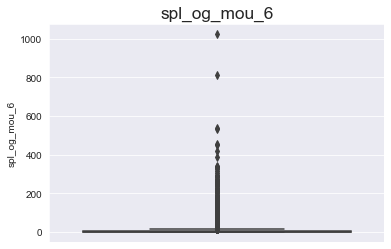

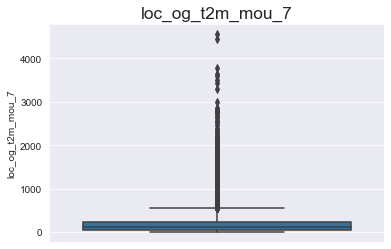

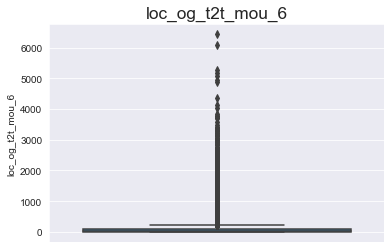

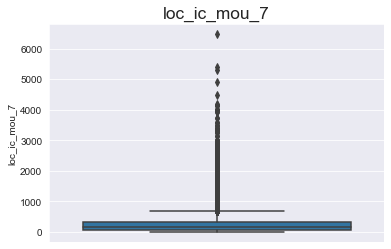

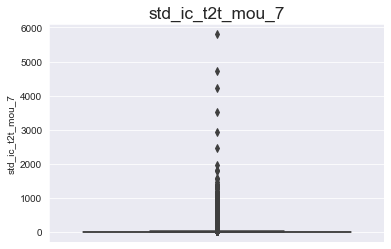

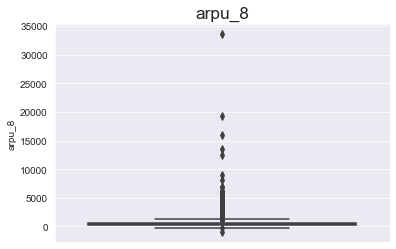

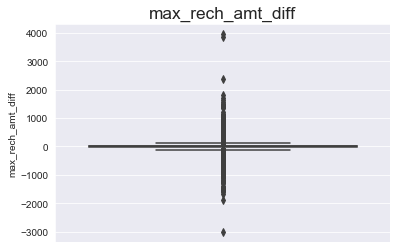

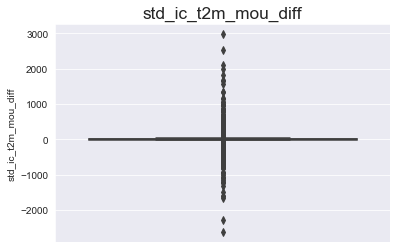

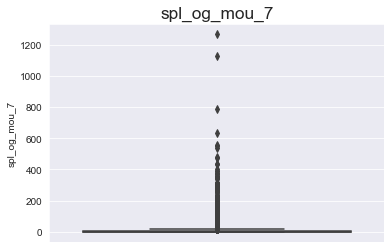

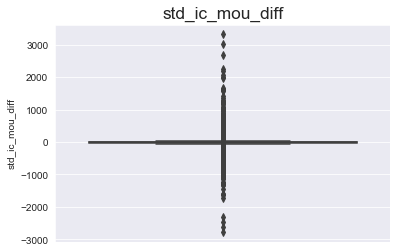

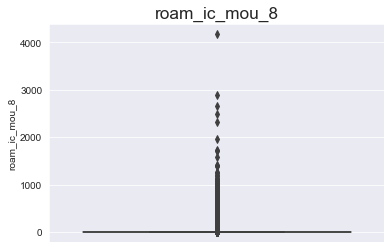

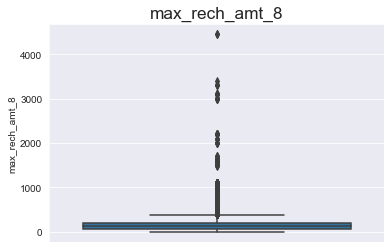

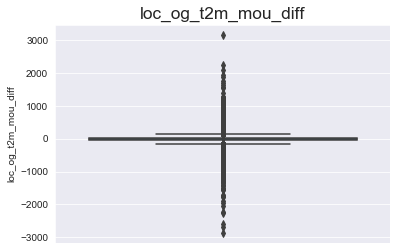

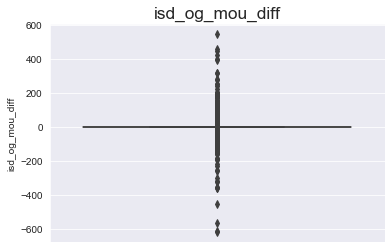

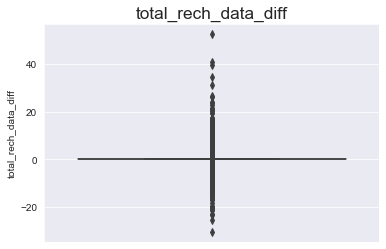

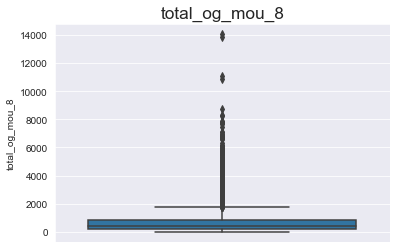

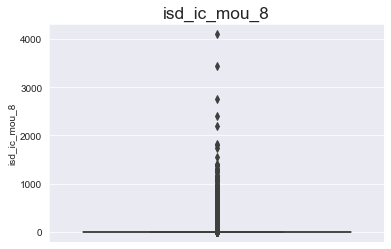

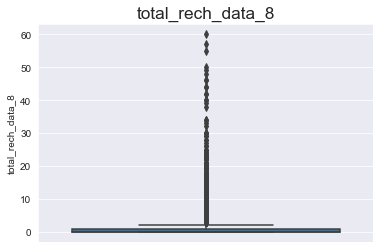

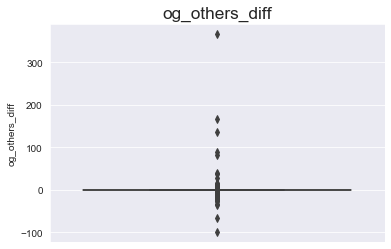

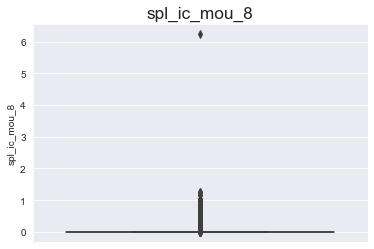

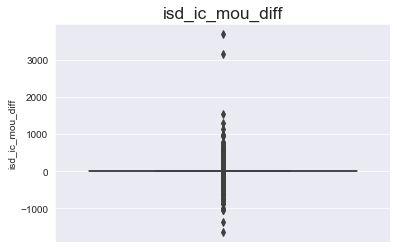

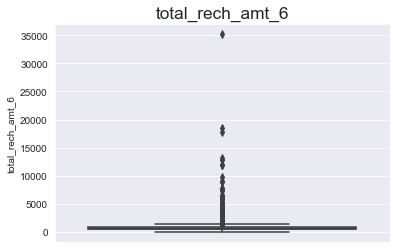

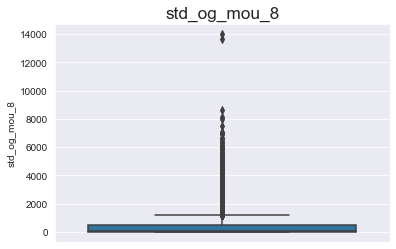

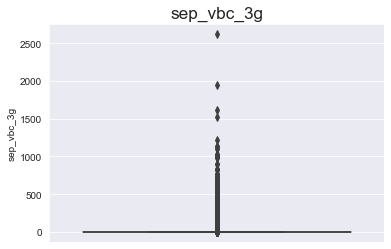

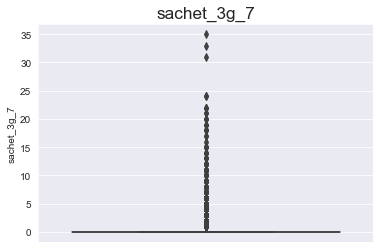

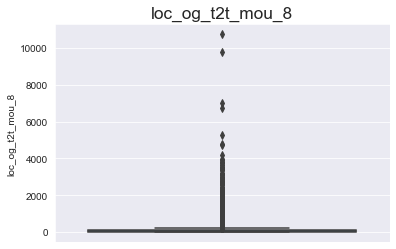

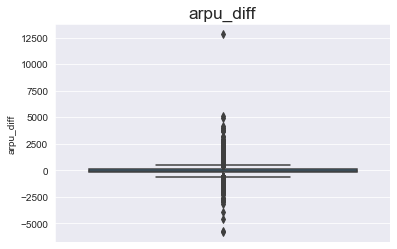

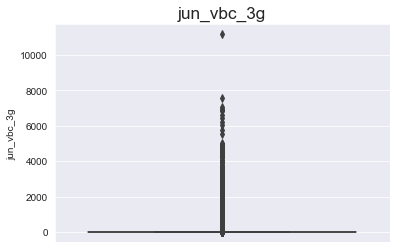

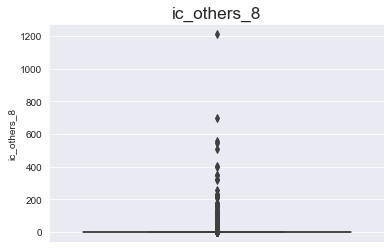

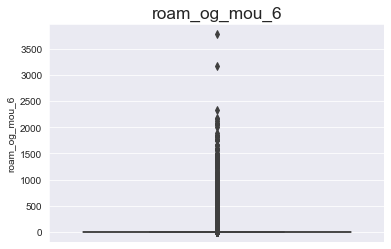

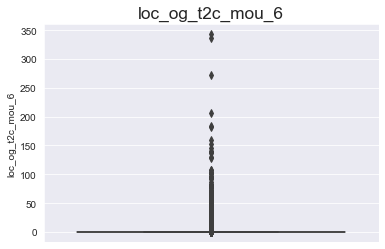

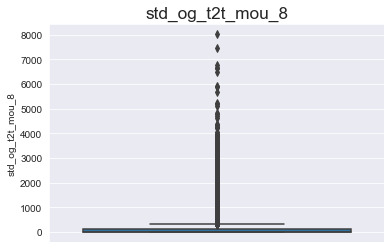

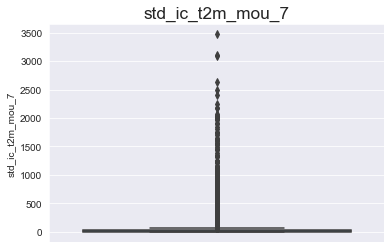

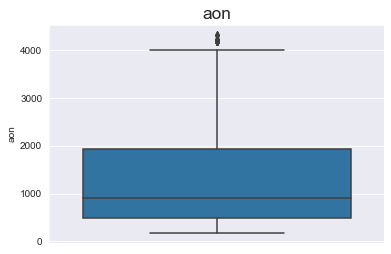

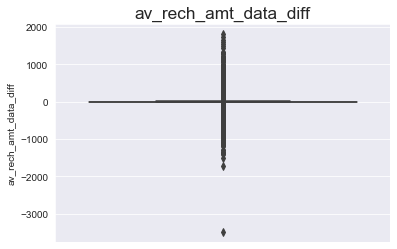

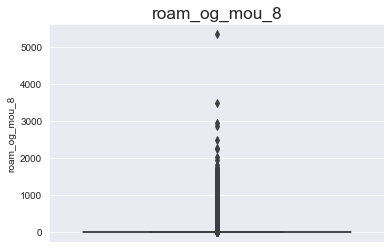

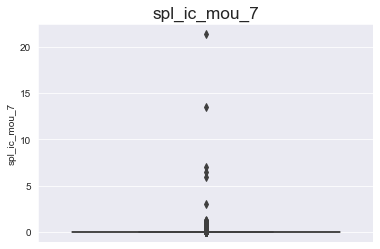

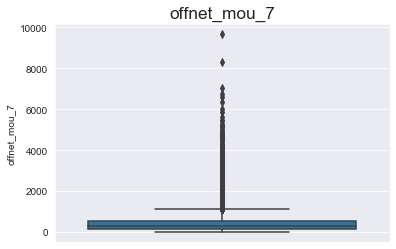

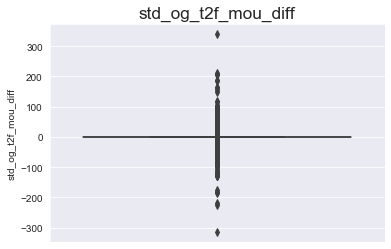

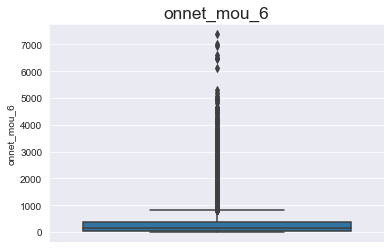

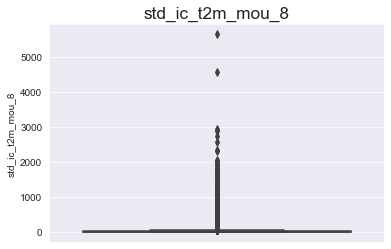

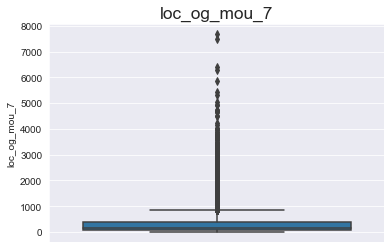

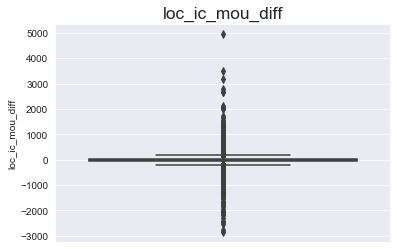

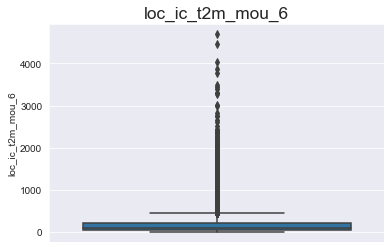

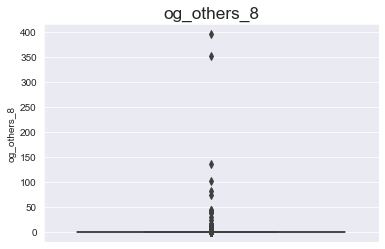

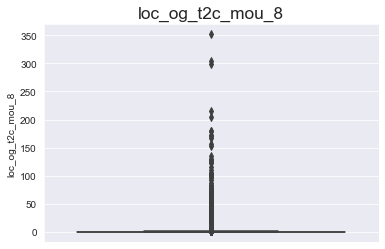

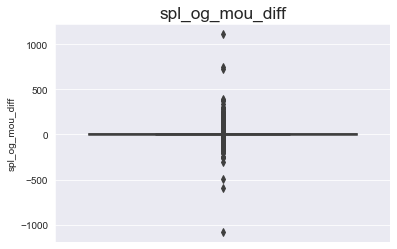

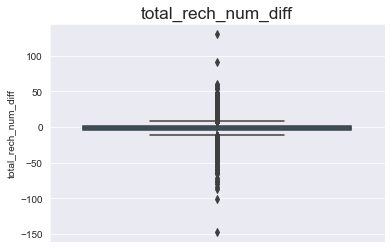

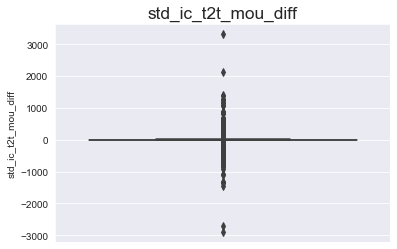

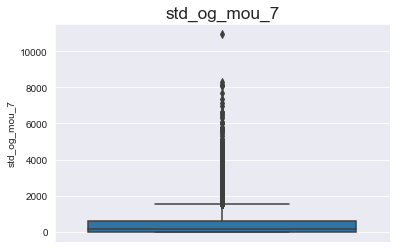

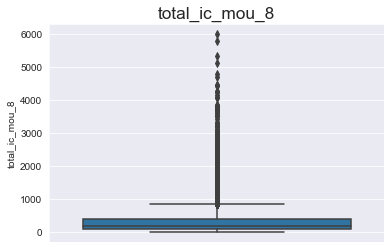

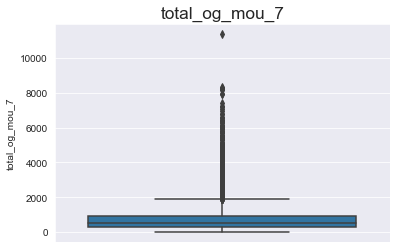

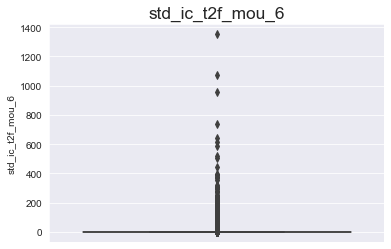

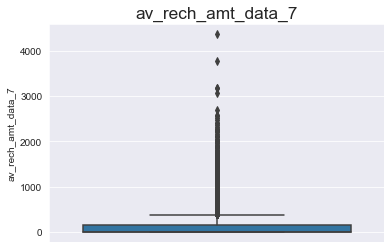

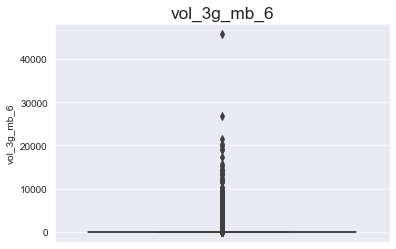

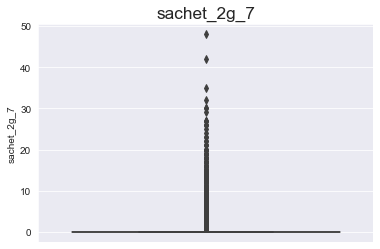

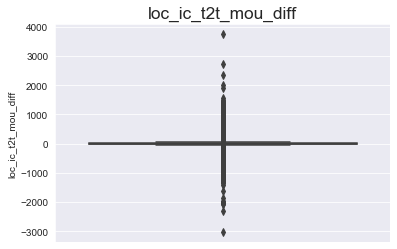

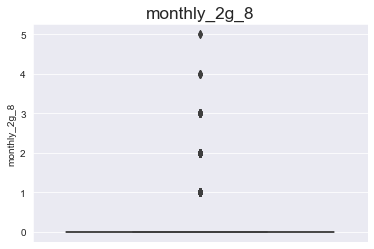

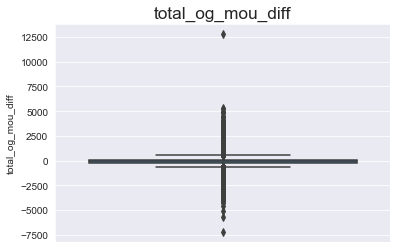

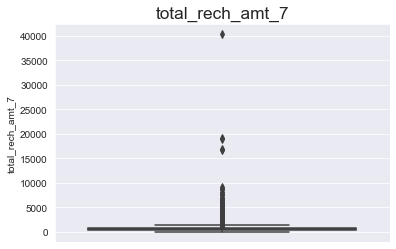

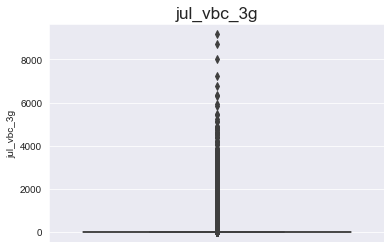

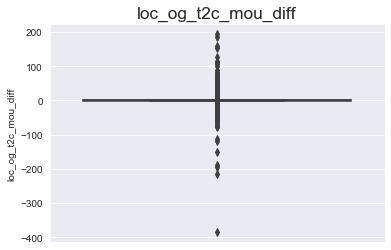

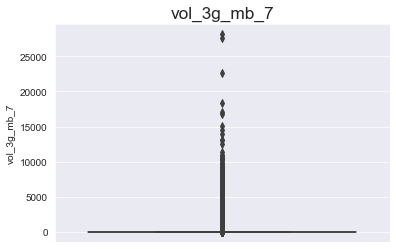

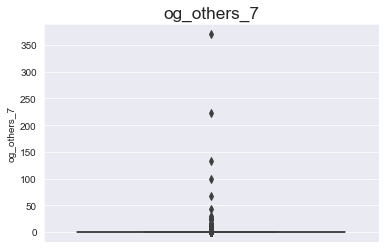

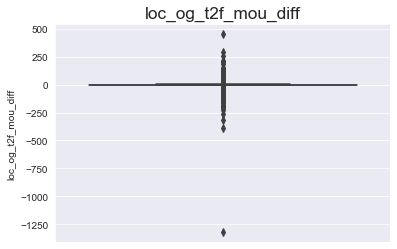

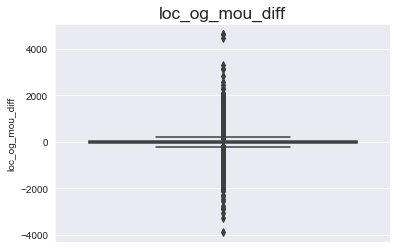

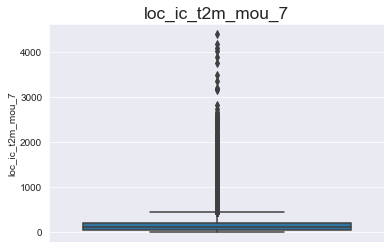

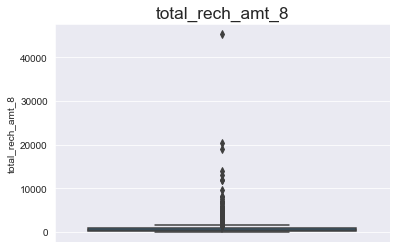

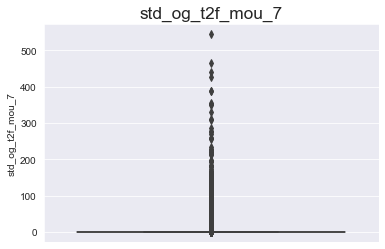

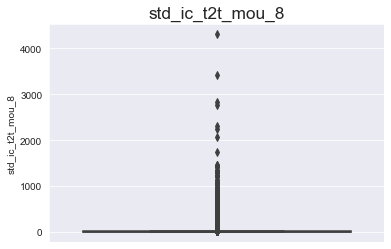

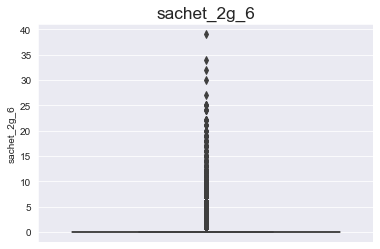

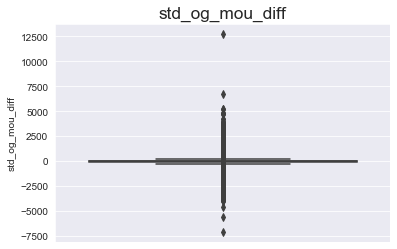

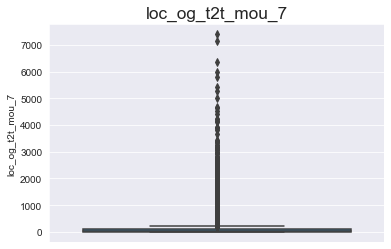

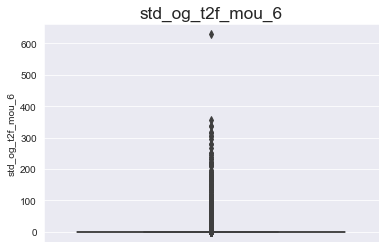

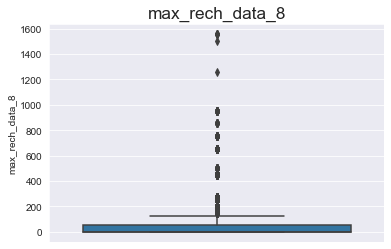

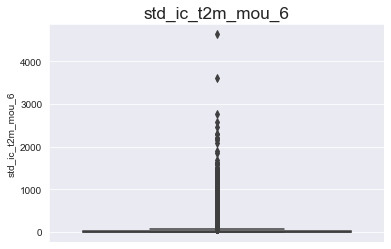

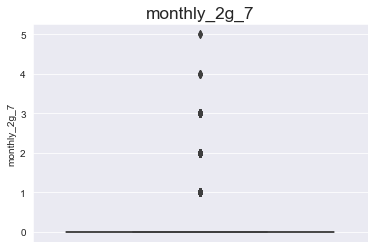

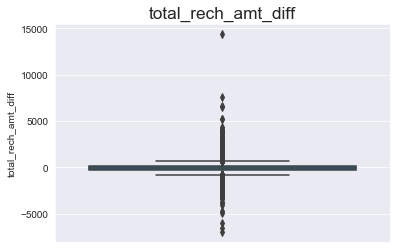

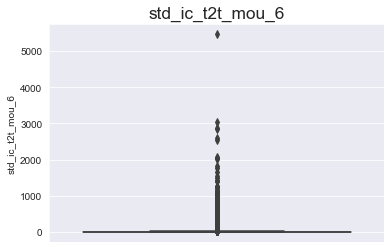

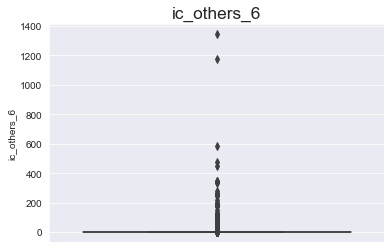

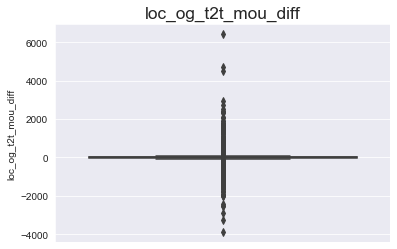

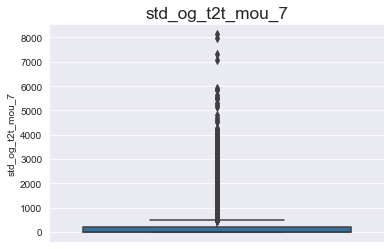

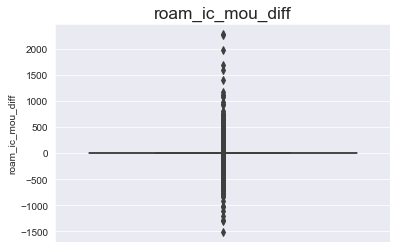

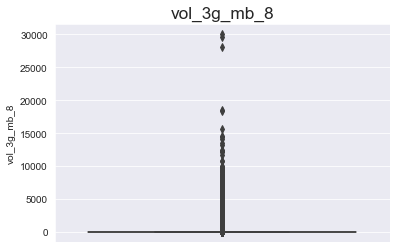

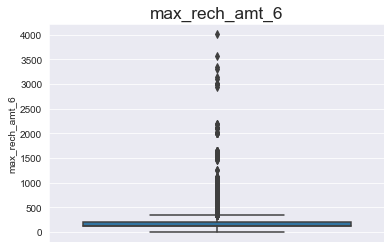

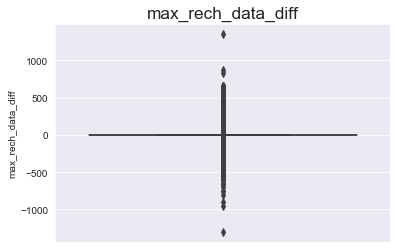

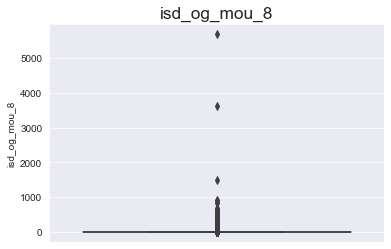

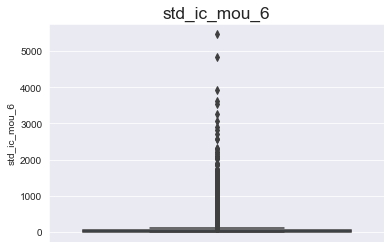

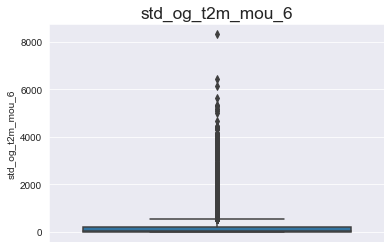

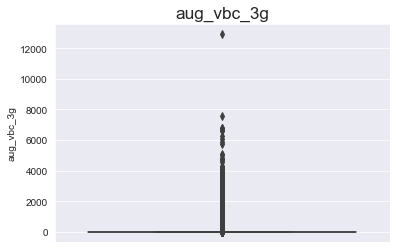

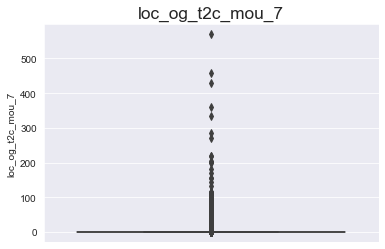

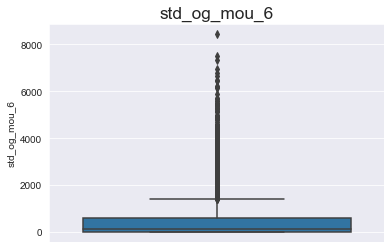

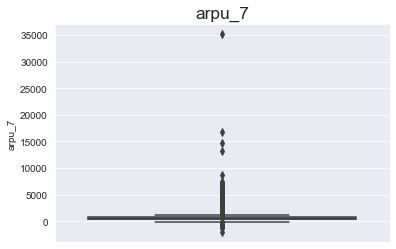

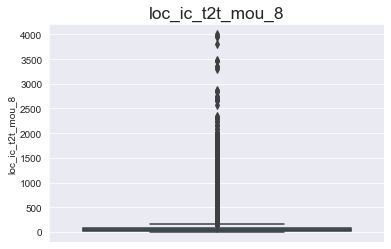

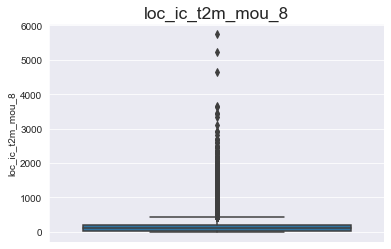

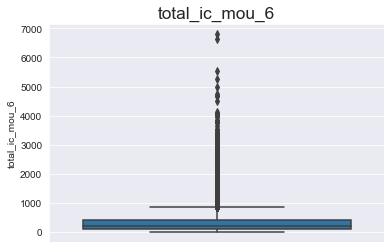

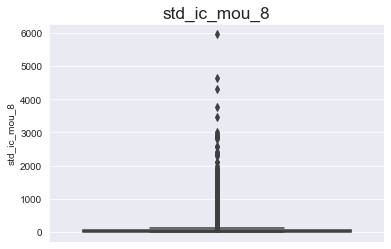

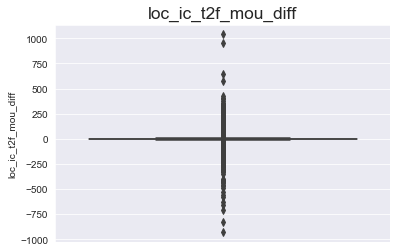

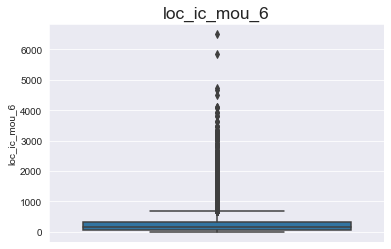

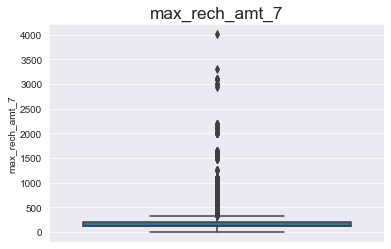

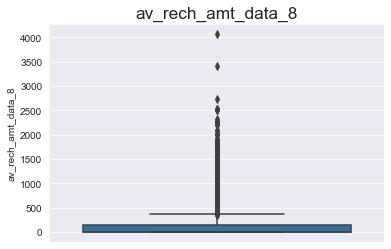

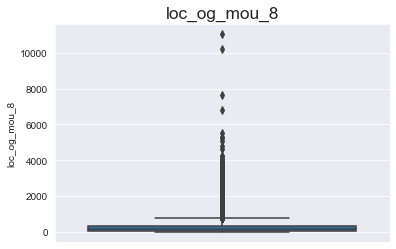

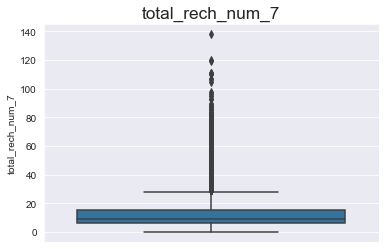

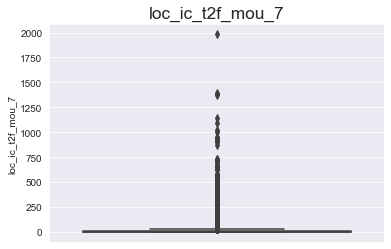

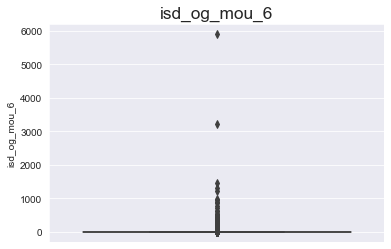

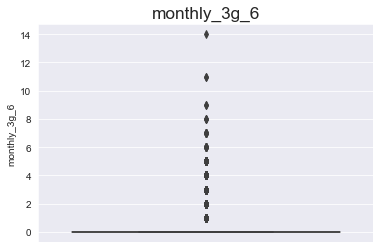

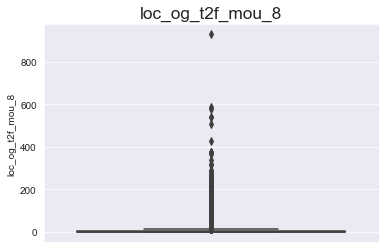

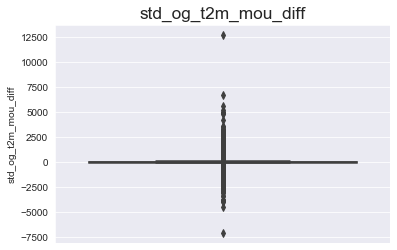

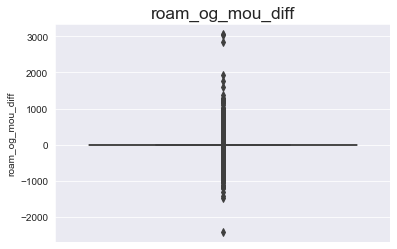

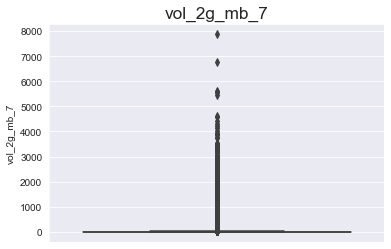

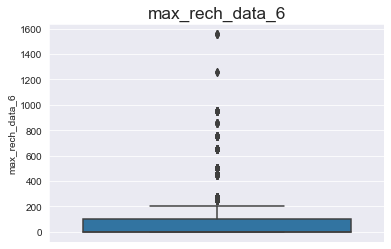

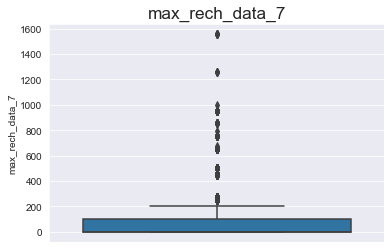

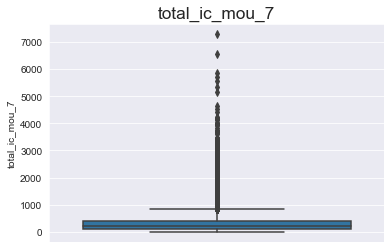

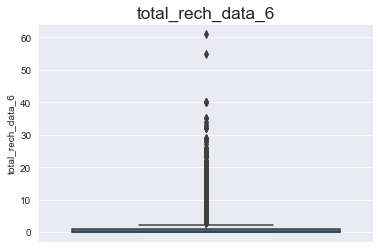

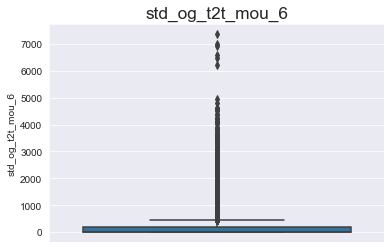

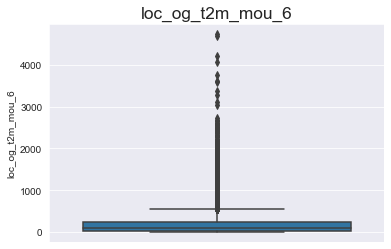

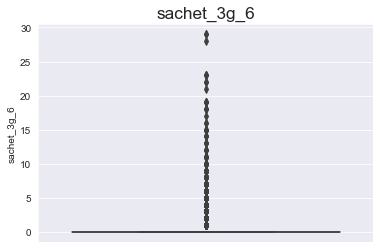

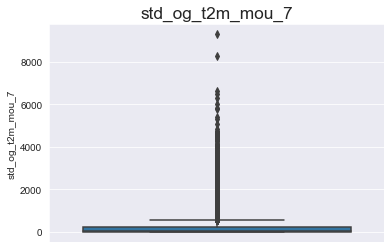

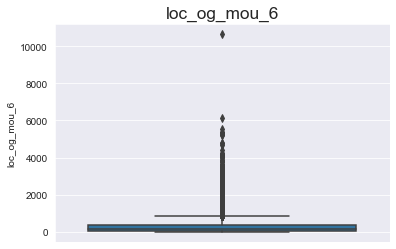

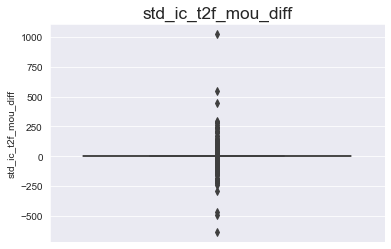

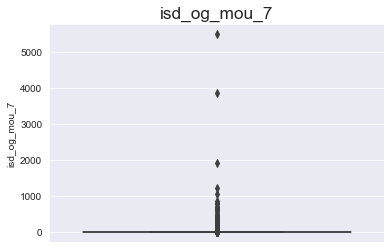

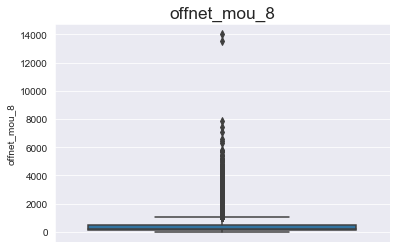

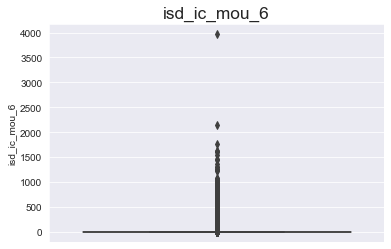

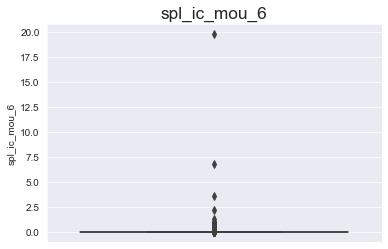

In [119]:
for col in num_cols_without_dummies:
    plot(col)

There are a lot of outliers in the dataset. let's remove them by capping and flooring method
- Capping @0.01 percentile
- Flooring @0.09 percentile

Taking these linient percentiles because if capped and floored at high percentile, we might loose some important pattern from the data, since there can be few customers who are generating high revenue beacuse they are recharging their phones or consuming huge amount data. 

In [120]:
# Remove outliers by capping and flooring them to 0.01 and 0.99 percentiles
for col in num_cols_without_dummies:
    percentiles = telecom_data_70[col].quantile([0.01,0.99]).values
    telecom_data_70[col][telecom_data_70[col] <= percentiles[0]] = percentiles[0]
    telecom_data_70[col][telecom_data_70[col] >= percentiles[1]] = percentiles[1]

### 5.4 Splitting data into train and test set

In [121]:
# divide data into train and test sets
X = telecom_data_70.drop('churn', axis = 1)
y = telecom_data_70['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

# check shapes
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (21007, 182)
X_test: (9004, 182)
y_train: (21007,)
y_test: (9004,)


### 5.5 Scale the features

In [122]:
# instantiate the scaler object for StandardScaler
scaler = StandardScaler()

# preserve columns
X_train_columns = X_train.columns

# fit_transform on train and test set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train_columns
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns = X_train_columns

In [123]:
# check head
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.342001 -0.834870  0.510128     0.405161     1.826378     0.904635   
1  0.528717  0.815743  0.389544     2.588442     2.484977     2.126597   
2 -0.328191 -0.439823 -0.198575    -0.274595    -0.340826    -0.364842   
3  0.311229  0.108722  0.027580    -0.714521    -0.704848    -0.657877   
4 -0.484829 -0.964703 -0.726506    -0.552843    -0.648133    -0.371054   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.510638     -0.610034     -0.510319      -0.295779      -0.262531   
1     -0.589918     -0.495748     -0.597079      -0.295779      -0.262531   
2     -0.389828     -0.417850     -0.486987      -0.076873      -0.262531   
3     -0.981122     -0.968455     -0.921636      -0.295779      -0.262531   
4      0.408713     -0.249212      0.149267       0.557295      -0.262531   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       4.662835      -0.312788      -0.286492       6.669094   
1      -0.285556      -0.312788      -0.286492      -0.285345   
2      -0.285556      -0.172998      -0.286492      -0.285345   
3      -0.285556      -0.312788      -0.286492      -0.285345   
4      -0.285556       0.601476      -0.286492      -0.285345   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.320239         -0.503662         -0.529573         -0.389393   
1          0.635345          0.800440          0.675321         -0.560004   
2          0.499459          0.416220          0.257934          0.276082   
3         -0.545090         -0.552527         -0.557668         -0.833497   
4         -0.505800         -0.482483         -0.555716          1.382701   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.704434         -0.801143         -0.432284         -0.439688   
1         -0.387271         -0.564571         -0.387698         -0.430898   
2          0.166208          0.002606         -0.349286         -0.127966   
3         -0.851677         -0.813185         -0.432284         -0.439688   
4          0.597750          1.089185         -0.175059         -0.251032   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.434292          1.375713          5.808557         -0.149473   
1         -0.434292         -0.351625         -0.361845         -0.355380   
2         -0.354366         -0.303240          0.174124         -0.348592   
3         -0.434292         -0.351625         -0.361845         -0.355380   
4         -0.434292         -0.351625          0.476969         -0.355380   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.449407     -0.750757     -0.812544          0.657352   
1     -0.091109      0.099908     -0.099109          2.702547   
2      0.388487      0.288180      0.085145         -0.511097   
3     -0.848555     -0.871478     -0.833479         -0.511097   
4      0.625026      0.123367      0.421105         -0.362861   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          2.314722         -0.128529         -0.321912         -0.337154   
1          2.504536          2.179695         -0.249005         -0.268528   
2         -0.514928         -0.472644         -0.525955         -0.542950   
3         -0.514928         -0.472644         -0.546886         -0.542950   
4         -0.480701         -0.148532         -0.446062         -0.541363   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.434887         -0.249379         -0.246091         -0.247432   
1         -0.277862         -0.249379         -0.246091         -0.247432   
2         -0.494839         -0.024376         -0.246091         -0.247432   
3         -0.515052         -0.249379         -0.246091         -0.247432   
4         -0.407560         -0.249379         -0.246091         -0.247432   



In [124]:
# check head
X_test_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.075041 -0.599077 -1.067433     0.643803     1.067755    -0.271180   
1  0.113212  0.070218  0.014044     0.134496     0.020555    -0.237097   
2  1.363625  1.697655  1.206467    -0.196119     0.426666     0.352500   
3 -0.849663 -0.683143 -0.250889    -0.549984    -0.571612    -0.378546   
4  0.187162 -1.127846 -0.893479    -0.427853    -0.294111    -0.386016   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.271086     -0.165779     -0.681132      -0.288237      -0.259070   
1     -0.035977      0.140550      0.104680      -0.288237      -0.199425   
2      0.838432      0.705624      0.339087      -0.262715      -0.259070   
3     -0.314815     -0.037060     -0.022602      -0.288237      -0.259070   
4     -0.740952     -0.914441     -0.789626      -0.275869      -0.259070   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.280505      -0.304664      -0.284174       -0.28485   
1      -0.280505      -0.304664      -0.210478       -0.28485   
2      -0.280505      -0.304664      -0.284174       -0.28485   
3      -0.280505      -0.304664      -0.284174       -0.28485   
4      -0.280505      -0.300206      -0.284174       -0.28485   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.531118         -0.486370         -0.497851         -0.650442   
1          1.236757          0.997766          0.550755          0.910337   
2          0.782834          2.446746          2.198308          1.975559   
3         -0.124009         -0.199267          0.217226          0.141931   
4          0.186721          0.495865          0.216882         -0.507521   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.698923         -0.671763         -0.435927         -0.435233   
1          1.374758          1.114238         -0.169708          0.552016   
2          2.220545          1.473919          0.088299         -0.088381   
3          0.402456          0.540481         -0.435927         -0.264922   
4         -0.725840         -0.732899          1.541211         -0.435233   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.428147         -0.362218         -0.359116          0.008391   
1         -0.330827         -0.362218         -0.359116         -0.350945   
2         -0.319293          5.542152          0.509059         -0.350945   
3          0.169470         -0.362218         -0.359116         -0.350945   
4          2.144707          0.478650         -0.359116         -0.350945   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.723854     -0.732048     -0.712477          1.016643   
1      1.167876      1.378085      0.948466         -0.342777   
2      1.651640      2.611195      1.953905         -0.516747   
3     -0.008917      0.123951      0.440152         -0.516747   
4     -0.191998     -0.261334     -0.303607         -0.516747   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          1.466873         -0.050562          0.120457          0.265038   
1         -0.366914         -0.451971         -0.477458         -0.547798   
2         -0.521172         -0.471182         -0.185470         -0.350960   
3         -0.516618         -0.473291         -0.355005         -0.186936   
4         -0.500490         -0.481669         -0.548686         -0.550402   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.336451         -0.249474         -0.249002         -0.250159   
1         -0.470036         -0.249474         -0.249002          0.097085   
2         -0.400567         -0.239654         -0.249002         -0.250159   
3         -0.287041          0.495271          0.265057         -0.093160   
4         -0.515867         -0.249474         -0.249002         -0.250159   



### 5.6 Handle class imbalance 

In [125]:
# check balance of churn
100*y_train.value_counts(normalize=True)

0    91.360023
1     8.639977
Name: churn, dtype: float64

`Class imbalance will be handled using the 'Weight of class' technique while modelling`

## Step 6: Modelling and Evaluation

1. Modelling with PCA
2. Modelling without PCA

### 6.1 With PCA

In [126]:
# instantiate pca object
pca = PCA(svd_solver='randomized', random_state=42)

# fit the data frame to pca object
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [127]:
# check componenets 
pca.components_

array([[ 5.20656245e-02,  6.29856463e-02,  8.45383364e-02, ...,
        -9.87882735e-04,  5.72147445e-03,  1.92838253e-03],
       [ 9.48061384e-02,  1.19396771e-01,  1.36108178e-01, ...,
         2.96677118e-02,  3.53300395e-02,  4.03528183e-02],
       [ 6.40597538e-02,  1.41683077e-01,  1.83597386e-01, ...,
         3.36600419e-02,  3.36311661e-02,  3.68712974e-02],
       ...,
       [-0.00000000e+00, -1.39849966e-16, -1.69970859e-16, ...,
         2.48473761e-16, -1.43551012e-16, -3.20192357e-17],
       [-0.00000000e+00,  1.89120687e-17,  3.70308193e-17, ...,
        -1.04282714e-16,  1.25659441e-16, -7.76329924e-17],
       [-0.00000000e+00,  1.10949721e-16, -1.60628645e-16, ...,
         9.83707086e-17, -2.94058073e-16,  1.36838719e-16]])

In [128]:
# check the variance explained by principal components
pca.explained_variance_ratio_

array([9.54996625e-02, 7.49034046e-02, 6.06720317e-02, 4.96027786e-02,
       3.86583782e-02, 3.34353205e-02, 2.65132033e-02, 2.31686655e-02,
       2.15369548e-02, 2.08347137e-02, 1.95469323e-02, 1.92147299e-02,
       1.80643121e-02, 1.68999891e-02, 1.59104180e-02, 1.54258432e-02,
       1.38105067e-02, 1.36796542e-02, 1.32409232e-02, 1.30609274e-02,
       1.23865221e-02, 1.21403223e-02, 1.18783864e-02, 1.13714679e-02,
       1.01644200e-02, 9.75942284e-03, 9.12297443e-03, 8.94346719e-03,
       8.60533591e-03, 8.37420540e-03, 8.13716468e-03, 8.02115479e-03,
       7.97339128e-03, 7.67254240e-03, 7.61029462e-03, 7.42575260e-03,
       7.34056357e-03, 7.17795322e-03, 7.05694742e-03, 6.67809989e-03,
       6.54272308e-03, 6.36652247e-03, 6.21780502e-03, 6.11586378e-03,
       5.91761415e-03, 5.65845475e-03, 5.60505036e-03, 5.56004842e-03,
       5.52296006e-03, 5.45594463e-03, 5.26815634e-03, 5.17963450e-03,
       4.95117619e-03, 4.93802689e-03, 4.73658919e-03, 4.65431605e-03,
      

In [129]:
# calculate cumulative variance for each pca
var_cumu = np.cumsum(pca.explained_variance_ratio_)

print('Cumulative Variance for pca data set: ')
print(var_cumu)

Cumulative Variance for pca data set: 
[0.09549966 0.17040307 0.2310751  0.28067788 0.31933626 0.35277158
 0.37928478 0.40245344 0.4239904  0.44482511 0.46437205 0.48358678
 0.50165109 0.51855108 0.53446149 0.54988734 0.56369784 0.5773775
 0.59061842 0.60367935 0.61606587 0.62820619 0.64008458 0.65145605
 0.66162047 0.67137989 0.68050287 0.68944633 0.69805167 0.70642587
 0.71456304 0.72258419 0.73055758 0.73823013 0.74584042 0.75326617
 0.76060674 0.76778469 0.77484164 0.78151974 0.78806246 0.79442898
 0.80064679 0.80676265 0.81268027 0.81833872 0.82394377 0.82950382
 0.83502678 0.84048272 0.84575088 0.85093052 0.85588169 0.86081972
 0.86555631 0.87021062 0.87471256 0.87916641 0.88353325 0.88775149
 0.89177118 0.89568481 0.89938667 0.90300211 0.90656331 0.91001416
 0.91335108 0.91663258 0.91983618 0.9229194  0.92593112 0.92888418
 0.93169664 0.9344326  0.93709215 0.93966584 0.94216607 0.94458904
 0.94686039 0.94908542 0.95117161 0.95324957 0.95521573 0.95715306
 0.95903053 0.96079737 0

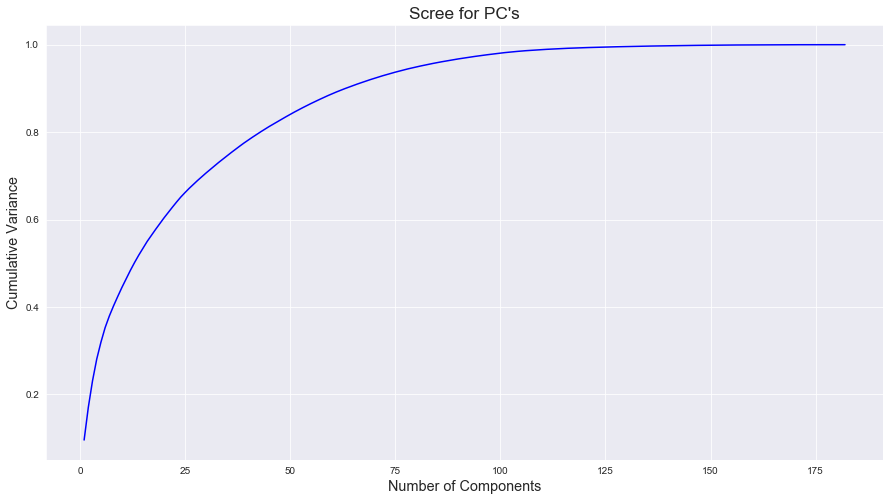

In [130]:
# plot scree
plt.figure(figsize=(15,8))
plt.title('Scree for PC\'s', fontsize='xx-large')
plt.xlabel('Number of Components', fontsize='x-large')
plt.ylabel('Cumulative Variance', fontsize='x-large')
plt.plot(range(1, len(var_cumu)+1), var_cumu, 'b-')
plt.show()

Looking at the scree plot the variance starts levelling off post 100 components, but taking 100 would be computationally expensive. Let's take components that explain 90% of the variance in the data. By the plot, it can be observed that it lies between 50-60. Let's check it.

In [131]:
# check the components that explain 90% variance
print(np.where((var_cumu > 0.9) & (var_cumu < 0.91)))

(array([63, 64], dtype=int64),)


Taking PCA as 63.

In [132]:
# using Incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=63)

# fit the data frames to IncrementalPCA object
X_train_scaled_pca = pca_final.fit_transform(X_train_scaled)

#check shape
print(X_train_scaled_pca.shape)

(21007, 63)


In [133]:
# create traindata frame out of the PC's obtained
X_train_scaled_pca_df = pd.DataFrame(X_train_scaled_pca)
X_train_scaled_pca_df.head()                                                        

0         1         2         3         4         5         6   \
0 -0.163199 -3.125555  2.713174 -4.077031  0.719714  0.679438  2.354477   
1 -4.548567  2.365975  2.711576 -1.974669 -1.575509 -2.002610  4.723962   
2  0.306711  0.989490 -3.394562  1.499896  0.552225 -1.405435  0.561047   
3  6.049326 -9.417466  5.072642 -1.556668 -6.939787  4.369238 -1.848070   
4 -1.236079  2.634154 -0.434751  0.665621  6.087234  7.442086  2.481080   

         7         8         9         10        11        12        13  \
0  4.068544  0.893858  0.520575  0.331886 -0.609211 -0.830757 -3.268423   
1 -0.174370 -0.613167  0.637348  0.670564 -0.452700 -0.021579 -0.300912   
2  0.253875 -0.168813 -0.649888  0.209352  0.858009 -0.476027  0.509022   
3  1.241834  2.971662  2.817166  1.455032  0.324782 -3.993715  3.060818   
4 -1.384148  0.304568 -2.387252  0.799023  0.640649 -0.935443  3.099786   

         14        15        16        17        18        19        20  \
0  3.455976  8.708055  3.390772  5.549359 -3.239006  0.663785 -0.141334   
1  0.058485 -0.565368 -0.079848  0.784691  0.856122 -0.836096 -0.802144   
2  0.397685 -0.093363  0.401195  0.581663 -0.431528 -0.689420 -0.770790   
3 -5.151407 -1.184991  0.320842  0.039382  0.598693 -0.865366 -3.309932   
4  0.919506  1.181677 -5.651198  2.140551 -1.575623  0.455166 -0.261648   

         21        22        23        24        25        26        27  \
0  2.925340 -1.639577 -2.857215  1.983570 -1.253625  4.039124 -0.101959   
1 -0.480164  0.188418  0.083707  0.173791  0.389434 -0.828846 -0.757906   
2 -0.078517  0.039765 -1.862596 -0.150374  0.849364  0.553612  0.192736   
3  2.615519 -1.541492 -0.049548  0.603073 -1.227782 -1.184297  1.747747   
4  0.354065 -0.033762  0.823933  0.891712  0.598690 -1.010788  0.839215   

         28        29        30        31        32        33        34  \
0 -1.079831 -0.975003  1.101204  0.730719 -1.965693 -0.209571 -0.268568   
1  1.126096  0.244390 -0.241140 -0.403109  0.327941 -0.429082 -0.436479   
2 -0.269901 -0.358563  0.197215  0.225452 -0.184595 -0.720873 -0.206632   
3 -1.502809  2.486953  1.385989 -0.500035  4.176150  0.122255 -1.055974   
4 -1.913928 -1.179956  2.057358 -1.207359 -0.395208  2.630389  4.922633   

         35        36        37        38        39        40        41  \
0 -0.944766 -1.299985 -0.610236 -1.531791  1.405282  0.973566  0.423556   
1 -0.159668 -0.366127 -0.413523 -0.539089 -0.354526  0.063185  0.150519   
2  1.579223  0.904534 -0.802383 -0.692376 -1.272003 -0.217883 -0.586451   
3  1.483035  0.376735 -1.052465 -0.930542 -1.367129  0.105462 -0.555886   
4 -0.370668  3.334059  0.171183 -0.099919 -0.520905 -0.557924 -0.497369   

         42        43        44        45        46        47        48  \
0 -0.475673 -3.072189 -1.739183  0.067507  1.475612  1.862604 -1.444777   
1 -0.008635  0.059475 -0.115209  0.013050 -0.009724 -0.094751 -0.109642   
2 -0.184431  0.109394  0.096020  0.662284  0.801336  0.043072 -1.373517   
3 -0.475300  1.890047 -0.169475  0.014113  0.363919  0.069482 -0.447131   
4 -0.219262  0.177875 -0.665339 -0.386548 -0.205944 -0.357283 -0.145980   

         49        50        51        52        53        54        55  \
0 -0.910855  2.852522  1.623850 -1.477873  2.766898 -1.166048 -0.324912   
1  0.840695  0.677357  0.055976 -0.054617  0.102377 -0.102912  0.020275   
2 -0.272624  0.248211 -0.422814  0.343395  0.323055 -0.457764 -1.020336   
3  0.654629 -0.585160  0.465960  0.375602 -0.536849 -0.077343 -1.585954   
4  1.297169  1.471508  1.184700 -0.388926  0.290233 -0.101731  0.127003   

         56        57        58        59        60        61        62  
0  0.531291 -0.283691  1.741836 -0.667691 -0.835572 -1.162995 -1.109238  
1  0.077736 -0.509002 -0.246747 -0.008189 -0.154278  0.200238  0.142301  
2 -0.669443 -0.105205 -0.734519  0.422179  0.840603 -0.098923 -0.116760  
3 -1.881190  0.946865 -2.092102 -0.767678 -0.371812  0.535447  0.688976  
4 -0.016861 -0.708027  0.214258

In [134]:
# apply the PC's to test data
X_test_scaled_pca = pca_final.transform(X_test_scaled)

# check shape
print(X_test_scaled_pca.shape)

(9004, 63)


In [135]:
# create test data frame out of the PC's obtained
X_test_scaled_pca_df = pd.DataFrame(X_test_scaled_pca)
X_test_scaled_pca_df.head()   

0         1         2         3         4         5         6   \
0  -4.334131 -0.716903 -1.328752 -2.621679  1.074804  0.478656  1.586555   
1  -0.528866  3.727717 -3.247764 -0.583707 -2.993785 -0.327446  0.469067   
2  10.998598  7.719865 -4.195365 -5.092094 -4.208213  0.528174  2.709139   
3  -1.308109  0.467482 -2.136149  3.513999  1.119974 -0.003701 -0.664799   
4   0.677830 -2.518123 -3.132953  0.895981  0.971450 -1.574808  0.935124   

         7         8         9         10        11        12        13  \
0  0.678730 -1.672787  1.066296  0.978995 -1.180263 -1.747808 -1.867947   
1  0.226011 -0.006112 -0.711238  1.007872  2.080867 -0.738484  0.461943   
2 -1.145763 -1.805784 -3.654783 -1.312432  2.657497  2.679922 -2.778122   
3 -0.366856 -0.577508  0.303809  0.182274 -1.731002 -1.168195  0.767546   
4 -1.384586 -1.026325  0.618451 -1.214517  0.411205 -0.808850  0.128908   

         14        15        16        17        18        19        20  \
0  0.648254 -1.119061  0.779271  0.692588 -0.155215  0.826935  0.400311   
1  1.742614  0.358605 -0.727149  0.538356  1.091037 -0.464012 -0.781950   
2  2.716065  1.468451  4.160225 -1.900635 -4.023431 -2.725900 -1.368104   
3 -0.240742  0.962549  0.509600 -0.306982  1.425395 -1.303620  0.044131   
4 -0.662144 -0.073850  0.244819 -0.171202 -0.566965  0.935565 -0.652765   

         21        22        23        24        25        26        27  \
0 -0.568915 -0.243224  1.196109  0.083904  0.743477 -0.111679 -1.050091   
1 -1.576528  0.430162  0.790958 -1.033001  0.900081 -2.217787 -2.177729   
2 -0.888350  1.146521 -1.988045  0.097385 -0.785702 -0.826947 -0.799461   
3  0.133355  0.304202 -0.017101  0.611611 -0.072430  0.985203  0.452588   
4 -1.653694 -2.023054  0.045218  0.284739 -0.165405 -0.000148  0.354400   

         28        29        30        31        32        33        34  \
0  0.617151  0.680873 -2.000937 -3.797697 -0.045066  1.110459  0.969656   
1  0.400705 -0.926408 -0.203151 -0.608689  0.749013 -0.910669  0.622041   
2 -1.683837  1.198653  2.765970  0.276046 -0.986306 -0.311477 -0.799631   
3  0.217790 -0.410261 -1.412160 -1.084583  0.396207 -0.081308 -0.070638   
4 -0.654873  0.811133  0.042998  0.877242 -0.710915 -0.232126 -0.034446   

         35        36        37        38        39        40        41  \
0 -0.635758  1.099399 -2.923477 -0.759198 -0.703768 -1.011907  0.399145   
1 -0.510953 -0.549449 -0.648336 -1.596218 -0.506893 -1.503108  0.505209   
2  0.666293  1.585306 -0.198275 -0.325341  0.828932 -0.466402  1.454724   
3  0.660902  1.073447  2.310339 -1.522477  0.135952  2.014804 -0.645815   
4  0.932675  0.527458 -0.294804 -1.983464 -0.678780  2.341423 -1.240881   

         42        43        44        45        46        47        48  \
0  0.160243  0.263951 -2.075432 -1.893594 -0.796141 -0.245042  0.068527   
1 -0.740222 -0.019972  0.253747  0.418736  0.284634 -0.088635 -0.130328   
2 -0.871061 -0.921921  0.684105 -0.564388 -0.083089 -0.393982  0.228441   
3 -0.204054 -0.089876  1.392061  1.033312  0.281176 -0.257921 -0.258143   
4  0.082452 -0.386873 -0.048026 -1.045023 -0.661616 -0.885421 -0.697781   

         49        50        51        52        53        54        55  \
0  1.484758  0.188943 -0.279913 -2.550148  0.158935  0.538824  0.125773   
1  0.001171 -0.387287  0.757292 -0.113167 -0.668441 -0.396540  0.239098   
2  2.323606 -2.249424  1.744973 -1.545305 -4.133223  0.749311  0.491079   
3  0.130725 -0.249733  0.731766  1.609317 -0.224835 -0.840821  0.571308   
4 -0.185037 -0.770936 -2.466422 -0.915491  0.906204  0.667516  1.206089   

         56        57        58        59        60        61        62  
0  0.671373 -0.074292 -0.796656 -0.396929  0.347134  0.113082 -0.443279  
1 -0.357118 -0.507630 -0.147204  0.141771 -0.969260  0.091868  0.133510  
2 -0.447139 -0.039784 -1.927978  1.325788 -2.051666 -1.123578  0.132769  
3  0.335640  0.165160  0.603145  0.247636 -0.228482 -0.112635 -0.128824  
4  1.507634  0.198139  0.8

### 6.1.1 Simple Logistic Regression with PCA

In [136]:
# create lr model object
lr_pca = LogisticRegression()

# fit train data set with PCA and train set's target variable
lr_model_pca  = lr_pca.fit(X_train_scaled_pca_df, y_train)

In [137]:
# check model parameters
print(lr_model_pca.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>


In [138]:
# predict on train set
y_train_pred_probs = lr_model_pca.predict_proba(X_train_scaled_pca_df)[:,1]

print(y_train_pred_probs[:10])

[0.11288127 0.04654951 0.01747917 0.01448862 0.03605536 0.03628683
 0.03628472 0.01134181 0.01658967 0.02017359]


In [139]:
# create data frame to store actual and predicted churns
y_train_pred_final = pd.DataFrame({'Churn_True':y_train.values, 'Churn_Prob':y_train_pred_probs})
y_train_pred_final.head()

Churn_True  Churn_Prob
0           0    0.112881
1           0    0.046550
2           0    0.017479
3           0    0.014489
4           0    0.036055

In [140]:
# taking optimal value as 0.5 to calculate predictions
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted
0           0    0.112881                0
1           0    0.046550                0
2           0    0.017479                0
3           0    0.014489                0
4           0    0.036055                0

In [141]:
# generic function to get classification report
def classification_report(y_true, y_pred):
    return metrics.classification_report(y_true, y_pred)

# generic function to get confusion matrix
def confusion_matrix(y_true, y_pred):
    return metrics.confusion_matrix(y_true, y_pred)

# generic function to get sensitivity / recall
def sesitivity(confusion):
    TP = confusion[1,1] # true positive 
    FN = confusion[1,0] # false negatives
    return (TP / float(TP+FN)).round(2)

In [142]:
# classification report
class_report_train = classification_report(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     19192
           1       0.62      0.27      0.38      1815

    accuracy                           0.92     21007
   macro avg       0.77      0.63      0.67     21007
weighted avg       0.91      0.92      0.91     21007

[[18883   309]
 [ 1321   494]]

Sensitivity: 0.27


The sensitivity is extremely low with the cutoff chosen at random. Let's plot accuracy, sensitivity and specificity to find out the optimal cutoff point

In [143]:
# generic function to dra roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right") 
    plt.show()

    return None

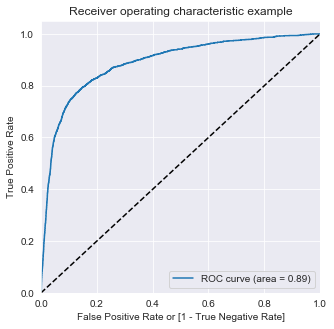

In [144]:
# plot roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn_True, 
                                         y_train_pred_final.Churn_Prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Prob)

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           0    0.112881                0    1    1    0    0    0    0    0   
1           0    0.046550                0    1    0    0    0    0    0    0   
2           0    0.017479                0    1    0    0    0    0    0    0   
3           0    0.014489                0    1    0    0    0    0    0    0   
4           0    0.036055                0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [146]:
# generic function to calculate various parameters and store in a data frame and plot them
def cutoff_df(y_true,y_pred):
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_true, y_pred[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
#     plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

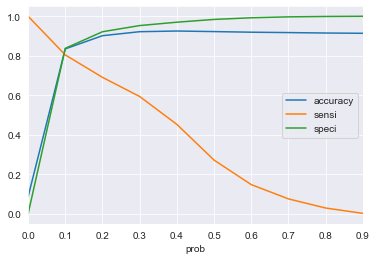

In [147]:
# calculate and plot accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df(y_train_pred_final.Churn_True,y_train_pred_final)

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           0    0.112881                0    1    1    0    0    0    0    0   
1           0    0.046550                0    1    0    0    0    0    0    0   
2           0    0.017479                0    1    0    0    0    0    0    0   
3           0    0.014489                0    1    0    0    0    0    0    0   
4           0    0.036055                0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [149]:
# classification report
class_report_train = classification_report(y_train_pred_final.Churn_True, y_train_pred_final.final_predicted)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train_pred_final.Churn_True, y_train_pred_final.final_predicted)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19192
           1       0.32      0.80      0.46      1815

    accuracy                           0.83     21007
   macro avg       0.65      0.82      0.68     21007
weighted avg       0.92      0.83      0.86     21007

[[16078  3114]
 [  355  1460]]

Sensitivity: 0.8


Now, the sensitivity score is way better than before

### Predictions on test set

In [150]:
# predict on test set
y_test_pred_probs = lr_model_pca.predict_proba(X_test_scaled_pca_df)[:,1]

y_test_pred_probs[:10]

array([0.15876041, 0.0173816 , 0.00163077, 0.0157915 , 0.01247525,
       0.14474535, 0.01051256, 0.21886532, 0.13252702, 0.04321332])

In [151]:
# create data frame to store actual and predicted churns
y_test_pred_final = pd.DataFrame({'Churn_True':y_test.values, 'Churn_Prob':y_test_pred_probs})
y_test_pred_final.head()

Churn_True  Churn_Prob
0           0    0.158760
1           0    0.017382
2           0    0.001631
3           0    0.015791
4           0    0.012475

In [152]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()

Churn_True  Churn_Prob  final_predicted
0           0    0.158760                1
1           0    0.017382                0
2           0    0.001631                0
3           0    0.015791                0
4           0    0.012475                0

In [153]:
# classification report
class_report_test = classification_report(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(class_report_train)

# Confusion matrix 
confusion_test = confusion_matrix(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19192
           1       0.32      0.80      0.46      1815

    accuracy                           0.83     21007
   macro avg       0.65      0.82      0.68     21007
weighted avg       0.92      0.83      0.86     21007

[[6860 1366]
 [ 177  601]]

Sensitivity: 0.77


In [154]:
lr_results = pd.DataFrame({'Model': ['Logistic Regression (PCA, 0.1 cutoff)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results

Model  Sensitivity (Train)  \
0  Logistic Regression (PCA, 0.1 cutoff)                  0.8   

   Sensitivity (Test)  
0                0.77

### 6.1.2 Logistic Regression with PCA
- Handle class imbalance using 'class_weight' parameter

In [155]:
# create lr model object
lr_pca_balanced = LogisticRegression(class_weight='balanced')

# fit train data set with PCA and train set's target variable
lr_model_pca_balanced  = lr_pca_balanced.fit(X_train_scaled_pca_df, y_train)

In [156]:
print(lr_model_pca_balanced.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>


In [157]:
# predict on train set
y_train_pred_probs = lr_model_pca_balanced.predict_proba(X_train_scaled_pca_df)[:,1]

print(y_train_pred_probs[:10])

[0.76323013 0.35761176 0.17529171 0.12635187 0.24766289 0.38826882
 0.18281558 0.3066436  0.16980801 0.17067789]


In [158]:
# create data frame to store actual and predicted churns
y_train_pred_final = pd.DataFrame({'Churn_True':y_train.values, 'Churn_Prob':y_train_pred_probs})
y_train_pred_final.head()

Churn_True  Churn_Prob
0           0    0.763230
1           0    0.357612
2           0    0.175292
3           0    0.126352
4           0    0.247663

In [159]:
# taking optimal value as 0.5 to calculate predictions
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted
0           0    0.763230                1
1           0    0.357612                0
2           0    0.175292                0
3           0    0.126352                0
4           0    0.247663                0

In [160]:
# classification report
class_report_train = classification_report(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.30      0.83      0.44      1815

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.82      0.85     21007

[[15660  3532]
 [  302  1513]]

Sensitivity: 0.83


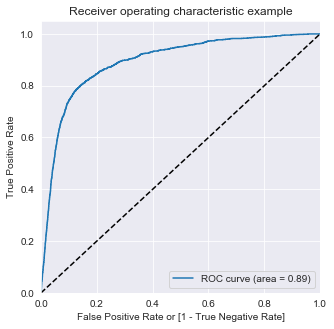

In [161]:
# draw roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn_True, 
                                         y_train_pred_final.Churn_Prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Prob)

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           0    0.763230                1    1    1    1    1    1    1    1   
1           0    0.357612                0    1    1    1    1    0    0    0   
2           0    0.175292                0    1    1    0    0    0    0    0   
3           0    0.126352                0    1    1    0    0    0    0    0   
4           0    0.247663                0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    1    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

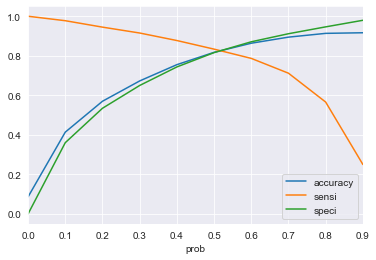

In [163]:
# calculate and plot accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df(y_train_pred_final.Churn_True,y_train_pred_final)

#### From the curve above, the optimal cutoff taken at random matches with the one shown here, i.e, 0.5. No need of repredicting on train data. Let's predict on test data.

In [164]:
# predict on test set
y_test_pred_probs = lr_model_pca_balanced.predict_proba(X_test_scaled_pca_df)[:,1]

print(y_test_pred_probs[:10])

[0.65719402 0.1758996  0.02412998 0.10153746 0.07431867 0.60588548
 0.08645709 0.72217444 0.55449878 0.26259964]


In [165]:
# create data frame to store actual and predicted churns
y_test_pred_final = pd.DataFrame({'Churn_True':y_test.values, 'Churn_Prob':y_test_pred_probs})
y_test_pred_final.head()

Churn_True  Churn_Prob
0           0    0.657194
1           0    0.175900
2           0    0.024130
3           0    0.101537
4           0    0.074319

In [166]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_test_pred_final.head()

Churn_True  Churn_Prob  final_predicted
0           0    0.657194                1
1           0    0.175900                0
2           0    0.024130                0
3           0    0.101537                0
4           0    0.074319                0

In [167]:
# classification report
class_report_test = classification_report(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(class_report_train)

# Confusion matrix 
confusion_test = confusion_matrix(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.30      0.83      0.44      1815

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.82      0.85     21007

[[6711 1515]
 [ 155  623]]

Sensitivity: 0.8


In [168]:
temp_results = pd.DataFrame({'Model': ['Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results

Model  \
0                   Logistic Regression (PCA, 0.1 cutoff)   
0  Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.80                0.77  
0                 0.83                0.80

### 6.1.3 Regularized Logistic Regression with PCA
- Using penalty as 'l1' (Lasso Regularization)
- Weight_class as 'balanced'

In [169]:
# create lr model object
lr_pca_lasso = LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

# fit train data set with PCA and train set's target variable
lr_model_pca_lasso = lr_pca_lasso.fit(X_train_scaled_pca_df, y_train)

In [170]:
print(lr_model_pca_lasso.get_params)

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)>


In [171]:
# predict on train set
y_train_pred_probs = lr_model_pca_lasso.predict_proba(X_train_scaled_pca_df)[:,1]

print(y_train_pred_probs[:10])

[0.76287381 0.35775035 0.17527282 0.1264185  0.24752802 0.3877581
 0.1834405  0.30726797 0.1697948  0.17095062]


In [172]:
# create data frame to store actual and predicted churns
y_train_pred_final = pd.DataFrame({'Churn_True':y_train.values, 'Churn_Prob':y_train_pred_probs})
y_train_pred_final.head()

Churn_True  Churn_Prob
0           0    0.762874
1           0    0.357750
2           0    0.175273
3           0    0.126419
4           0    0.247528

In [173]:
# taking optimal value as 0.5 to calculate predictions
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted
0           0    0.762874                1
1           0    0.357750                0
2           0    0.175273                0
3           0    0.126419                0
4           0    0.247528                0

In [174]:
# classification report
class_report_train = classification_report(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Predicted)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.30      0.83      0.44      1815

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.82      0.85     21007

[[15661  3531]
 [  302  1513]]

Sensitivity: 0.83


Training sensitivity has increased.

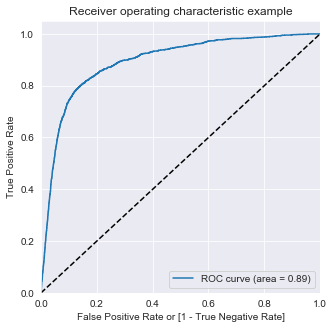

In [175]:
# draw roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn_True, 
                                         y_train_pred_final.Churn_Prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Churn_True, y_train_pred_final.Churn_Prob)

In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn_True  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           0    0.762874                1    1    1    1    1    1    1    1   
1           0    0.357750                0    1    1    1    1    0    0    0   
2           0    0.175273                0    1    1    0    0    0    0    0   
3           0    0.126419                0    1    1    0    0    0    0    0   
4           0    0.247528                0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    1    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

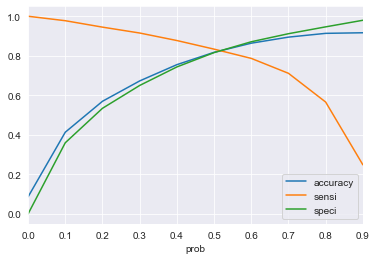

In [177]:
# calculate and plot accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df(y_train_pred_final.Churn_True,y_train_pred_final)

#### From the curve above, the optimal cutoff taken at random matches with the one shown here, i.e, 0.5. No need of repredicting on train data. Let's predict on test data.

In [178]:
# predict on test set
y_test_pred_probs = lr_model_pca_lasso.predict_proba(X_test_scaled_pca_df)[:,1]

print(y_test_pred_probs[:10])

[0.65703384 0.17599875 0.02410434 0.10179644 0.07540978 0.60562222
 0.08673526 0.72154841 0.55418177 0.26303938]


In [179]:
# create data frame to store actual and predicted churns
y_test_pred_final = pd.DataFrame({'Churn_True':y_test.values, 'Churn_Prob':y_test_pred_probs})
y_test_pred_final.head()

Churn_True  Churn_Prob
0           0    0.657034
1           0    0.175999
2           0    0.024104
3           0    0.101796
4           0    0.075410

In [180]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_test_pred_final.head()

Churn_True  Churn_Prob  final_predicted
0           0    0.657034                1
1           0    0.175999                0
2           0    0.024104                0
3           0    0.101796                0
4           0    0.075410                0

In [181]:
# classification report
class_report_test = classification_report(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(class_report_train)

# Confusion matrix 
confusion_test = confusion_matrix(y_test_pred_final.Churn_True, y_test_pred_final.final_predicted)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.30      0.83      0.44      1815

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.82      0.85     21007

[[6710 1516]
 [ 155  623]]

Sensitivity: 0.8


In [182]:
temp_results = pd.DataFrame({'Model': ['Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77

### 6.1.4 Decision tree with PCA

In [183]:
# Instantiate the Decision Tress Classifier object
dtc_default_pca = DecisionTreeClassifier()

# Fitting the decision tree with default hyperparameters,
print(dtc_default_pca.fit(X_train_scaled_pca_df, y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [184]:
# Making predictions on train data set
y_train_pred_default = dtc_default_pca.predict(X_train_scaled_pca_df)

print(y_train_pred_default[:10])

[0 0 0 0 0 0 0 1 0 0]


In [185]:
# classification report
class_report_train = classification_report(y_train, y_train_pred_default)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred_default)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19192
           1       1.00      1.00      1.00      1815

    accuracy                           1.00     21007
   macro avg       1.00      1.00      1.00     21007
weighted avg       1.00      1.00      1.00     21007

[[19192     0]
 [    0  1815]]

Sensitivity: 1.0


In [186]:
# Making predictions on test data set
y_test_pred_default = dtc_default_pca.predict(X_test_scaled_pca_df)

y_test_pred_default[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [187]:
# classification report
class_report_test = classification_report(y_test, y_test_pred_default)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred_default)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8226
           1       0.30      0.33      0.31       778

    accuracy                           0.87      9004
   macro avg       0.62      0.63      0.62      9004
weighted avg       0.88      0.87      0.88      9004

[[7618  608]
 [ 520  258]]

Sensitivity: 0.33


The above model with default hyperparameters has **overfit** the data with:
1. train sensitivity as 1,
2. test sensitivity as 0.34

In [188]:
temp_results = pd.DataFrame({'Model': ['Decision Tree (PCA, Default Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0                                    Decision Tree (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 1.00                0.33

Let's tune some of the hyperparameters for decision tree
- class_weight = 'balanced' (this will handle the overfitting upto some extent that happened before)

### 6.1.4.1 'max_depth' Hyperparameter tuning 

In [189]:
# generic function to tune hyperparameters of Decision Tree
def dtree_hyper_tuning(X_train,y_train,parameters,param_name):

    start_time = time.time()

    # specify number of folds for k-fold CV
    n_folds = 5

    # instatiate the decision tree model object
    dtc_pca = DecisionTreeClassifier(class_weight='balanced',
                                     random_state = 100)

    # instantiate gridsearchCV with required parameters
    dtc_pca_cv = GridSearchCV(estimator=dtc_pca,
                                        param_grid=parameters,
                                        cv=n_folds,
                                        scoring='accuracy',
                                        return_train_score=True,
                                        verbose=1,
                                        n_jobs=-1)
    # fit tree on training data
    dtc_pca_cv_fit = dtc_pca_cv.fit(X_train,y_train)

    end_time = time.time()

    print('Time taken (mins) by ' + param_name + ' hyperparameter tuning: {0}'.format((end_time-start_time) / 60))
    
    return dtc_pca_cv_fit

In [190]:
# parameters to build on model
parameters = {'max_depth': range(1, 50),
             'criterion': ['gini']}

# tune max_depth hyperparameter
dtc_max_depth_pca_cv = dtree_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'max_depth')

# print model parameters
print(dtc_max_depth_pca_cv.get_params)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  3.8min finished


Time taken (mins) by max_depth hyperparameter tuning: 3.8665020942687987
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param

In [191]:
# scores of GridSearch CV
scores = dtc_max_depth_pca_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.529480      0.040892         0.008054        0.006123   
1       0.939617      0.014270         0.004865        0.001589   
2       1.220072      0.077037         0.007239        0.000477   
3       1.377674      0.036720         0.006462        0.001346   
4       1.691717      0.008570         0.005499        0.001367   

  param_criterion param_max_depth                                 params  \
0            gini               1  {'criterion': 'gini', 'max_depth': 1}   
1            gini               2  {'criterion': 'gini', 'max_depth': 2}   
2            gini               3  {'criterion': 'gini', 'max_depth': 3}   
3            gini               4  {'criterion': 'gini', 'max_depth': 4}   
4            gini               5  {'criterion': 'gini', 'max_depth': 5}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.698477           0.691337           0.689122           0.687693   
1           0.617087           0.616849           0.612711           0.604856   
2           0.793908           0.794860           0.789336           0.729588   
3           0.757020           0.749405           0.750774           0.770293   
4           0.806759           0.810804           0.786717           0.822423   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.705784         0.694483        0.006759               48   
1           0.620805         0.614462        0.005443               49   
2           0.821947         0.785929        0.030418               46   
3           0.774816         0.760461        0.010302               47   
4           0.818139         0.808968        0.012397               43   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.687771            0.690866            0.690884   
1            0.618982            0.625350            0.615851   
2            0.792443            0.808390            0.793824   
3            0.759060            0.764832            0.756694   
4            0.811247            0.825469            0.797691   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.693502            0.708556          0.694316         0.007348  
1            0.611865            0.630549          0.620519         0.006678  
2            0.734083            0.819648          0.789678         0.029543  
3            0.778650            0.775794          0.767006         0.008798  
4            0.833631            0.828216          0.819251         0.013074

In [192]:
# generic function to plot train and test accuracies with hyperparameters
def plot_accuracies(scores, param_name):
    param = 'param_' + param_name
    plt.figure(figsize=(12,6))
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")
    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title('Test-Train score w.r.t ' + param_name, fontsize='x-large')
    plt.show()

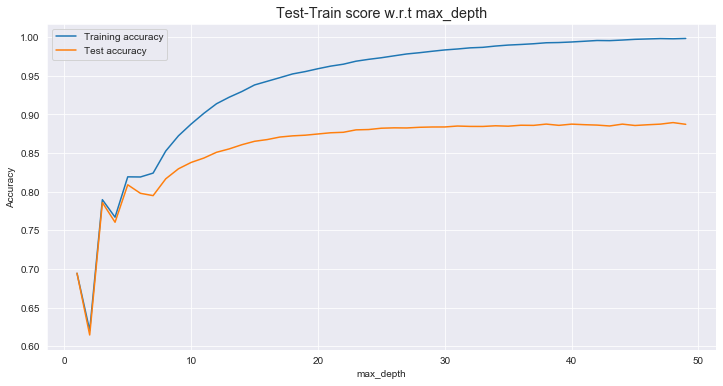

Best accuracy: 0.8895130194697006
Best max_depth: {'criterion': 'gini', 'max_depth': 48}


In [193]:
# plotting accuracies with 'max_depth' hyperparameter
plot_accuracies(scores, 'max_depth')

print('Best accuracy:',dtc_max_depth_pca_cv.best_score_)
print('Best max_depth:',dtc_max_depth_pca_cv.best_params_)

It can be observed that as the value of **max_depth** is increased, the accuracies of both training and test increases upto 3 then drops down and rises again till 6 and then drops again. Post this the test accuracy starts to rise, starts separating out from the train accuracy and ultimately it flattens out.

### 6.1.4.2 'min_samples_leaf' Hyperparameter tuning 

In [194]:
# parameters to build on model
parameters = {'min_samples_leaf': range(5, 200, 20),
             'criterion': ['gini']}

# tune min_samples_leaf hyperparameter
dtc_min_samples_leaf_pca_cv = dtree_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'min_samples_leaf')

# print model parameters
print(dtc_min_samples_leaf_pca_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.0s finished


Time taken (mins) by min_samples_leaf hyperparameter tuning: 0.6461695472399394
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
           

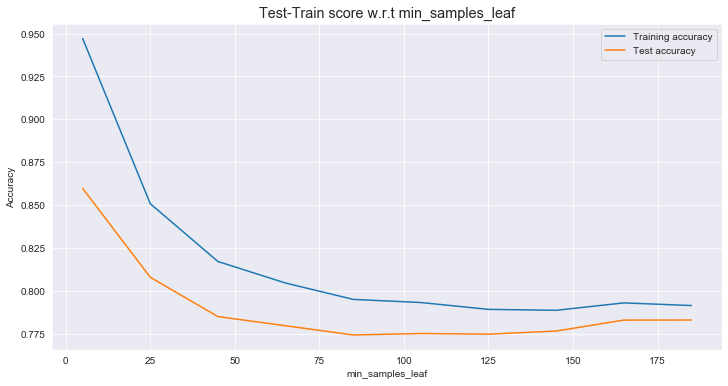

Best accuracy: 0.8598086352168325
Best min_samples_leaf: {'criterion': 'gini', 'min_samples_leaf': 5}


In [196]:
# scores of GridSearch CV
scores = dtc_min_samples_leaf_pca_cv.cv_results_

# plotting accuracies with 'min_samples_leaf' hyperparameter
plot_accuracies(scores, 'min_samples_leaf')

print('Best accuracy:',dtc_min_samples_leaf_pca_cv.best_score_)
print('Best min_samples_leaf:',dtc_min_samples_leaf_pca_cv.best_params_)

The model starts to become more stable after 20 where the train and test accuracy scores starts to converge.

### 6.1.4.3 'min_samples_split' Hyperparameter tuning 

In [197]:
# parameters to build on model
parameters = {'min_samples_split': range(5, 200, 20),
             'criterion': ['gini']}

# tune min_samples_split hyperparameter
dtc_min_samples_split_pca_cv = dtree_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'min_samples_split')

# print model parameters
print(dtc_min_samples_split_pca_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.9s finished


Time taken (mins) by min_samples_split hyperparameter tuning: 0.8974597613016765
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
          

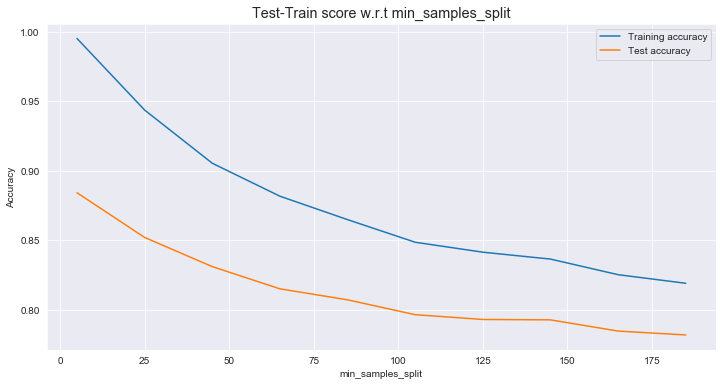

Best accuracy: 0.8842290665016423
Best min_samples_split: {'criterion': 'gini', 'min_samples_split': 5}


In [198]:
# scores of GridSearch CV
scores = dtc_min_samples_split_pca_cv.cv_results_

# plotting accuracies with 'min_samples_split' hyperparameter
plot_accuracies(scores, 'min_samples_split')

print('Best accuracy:',dtc_min_samples_split_pca_cv.best_score_)
print('Best min_samples_split:',dtc_min_samples_split_pca_cv.best_params_)

As the value of min_samples_split is increases, the model becomes less complex

### 6.1.4.4 Grid Search to find Optimal Hyperparameters

In [199]:
# Create the parameter grid 
parameters = {
    'max_depth': range(4, 10, 2),
    'min_samples_leaf': range(20, 100, 50),
    'min_samples_split': range(25, 150, 50),
    'criterion': ["entropy", "gini"]
}


# tune max_depth hyperparameter
dtc_all_split_pca_cv = dtree_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'Multiple hyperparameters')

# print model parameters
print(dtc_all_split_pca_cv.get_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


Time taken (mins) by Multiple hyperparameters hyperparameter tuning: 2.1652684688568113
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
   

In [200]:
print('Best accuracy:',dtc_all_split_pca_cv.best_score_)
print('Best min_samples_split:',dtc_all_split_pca_cv.best_params_)

Best accuracy: 0.7997810253724948
Best min_samples_split: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 70, 'min_samples_split': 25}


### 6.1.5 Decision tree with PCA and optimized hyperparameters
- class_weight: **balanced**
- criterion: **entropy**
- max_depth: **6**
- min_samples_leaf: **70**
- min_samples_split: **25**

In [201]:
# Instantiate the Decision Tress Classifier object
dtc_pca_optimized = DecisionTreeClassifier(class_weight='balanced',
                                           criterion='entropy',
                                           max_depth=6,
                                           min_samples_leaf=70,
                                           min_samples_split=25,
                                           random_state=100)

# Fitting the decision tree with optimized hyperparameters,
print(dtc_pca_optimized.fit(X_train_scaled_pca_df, y_train))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


In [202]:
# Making predictions on train data set
y_train_pred_default = dtc_pca_optimized.predict(X_train_scaled_pca_df)

print(y_train_pred_default[:10])

[1 0 0 0 0 0 0 1 0 0]


In [203]:
# classification report
class_report_train = classification_report(y_train, y_train_pred_default)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred_default)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19192
           1       0.31      0.81      0.44      1815

    accuracy                           0.83     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.83      0.86     21007

[[15878  3314]
 [  350  1465]]

Sensitivity: 0.81


In [204]:
# Making predictions on test data set
y_test_pred_default = dtc_pca_optimized.predict(X_test_scaled_pca_df)

y_test_pred_default[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [205]:
# classification report
class_report_test = classification_report(y_test, y_test_pred_default)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred_default)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8226
           1       0.29      0.72      0.41       778

    accuracy                           0.82      9004
   macro avg       0.63      0.78      0.65      9004
weighted avg       0.91      0.82      0.85      9004

[[6826 1400]
 [ 215  563]]

Sensitivity: 0.72


The above model with optimized hyperparameters is still **overfitting** the data with:
1. train sensitivity as 0.81,
2. test sensitivity as 0.72

May be the model is still complex. Let's make the model more simpler by taking **max_depth** as **3** and check the performance.


In [206]:
# Instantiate the Decision Tress Classifier object
dtc_pca_optimized = DecisionTreeClassifier(class_weight='balanced',
                                           criterion='entropy',
                                           max_depth=3,
                                           min_samples_leaf=70,
                                           min_samples_split=25,
                                           random_state=100)

# Fitting the decision tree with optimized hyperparameters,
print(dtc_pca_optimized.fit(X_train_scaled_pca_df, y_train))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


In [207]:
# Making predictions on train data set
y_train_pred_default = dtc_pca_optimized.predict(X_train_scaled_pca_df)

print(y_train_pred_default[:10])

[1 1 0 0 0 1 0 1 0 1]


In [208]:
# classification report
class_report_train = classification_report(y_train, y_train_pred_default)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred_default)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     19192
           1       0.21      0.83      0.34      1815

    accuracy                           0.72     21007
   macro avg       0.59      0.77      0.58     21007
weighted avg       0.91      0.72      0.78     21007

[[13530  5662]
 [  300  1515]]

Sensitivity: 0.83


In [209]:
# Making predictions on test data set
y_test_pred_default = dtc_pca_optimized.predict(X_test_scaled_pca_df)

y_test_pred_default[:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [210]:
# classification report
class_report_test = classification_report(y_test, y_test_pred_default)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred_default)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      8226
           1       0.21      0.82      0.34       778

    accuracy                           0.72      9004
   macro avg       0.59      0.77      0.58      9004
weighted avg       0.91      0.72      0.78      9004

[[5842 2384]
 [ 139  639]]

Sensitivity: 0.82


In [211]:
temp_results = pd.DataFrame({'Model': ['Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0           Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0                                    Decision Tree (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.82  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 1.00                0.33

### 6.1.6 Random Forest with PCA

In [212]:
# Instantiate the Random Forest Classifier object
rf_default_pca = RandomForestClassifier()

# Fitting the random forest with default hyperparameters,
print(rf_default_pca.fit(X_train_scaled_pca_df, y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [213]:
# Making predictions on train data set
y_train_pred_default = rf_default_pca.predict(X_train_scaled_pca_df)

print(y_train_pred_default[:10])

[0 0 0 0 0 0 0 1 0 0]


In [214]:
# classification report
class_report_train = classification_report(y_train, y_train_pred_default)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred_default)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19192
           1       1.00      0.90      0.95      1815

    accuracy                           0.99     21007
   macro avg       1.00      0.95      0.97     21007
weighted avg       0.99      0.99      0.99     21007

[[19191     1]
 [  180  1635]]

Sensitivity: 0.9


In [215]:
# Making predictions on test data set
y_test_pred_default = rf_default_pca.predict(X_test_scaled_pca_df)

y_test_pred_default[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [216]:
# classification report
class_report_test = classification_report(y_test, y_test_pred_default)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred_default)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8226
           1       0.67      0.16      0.26       778

    accuracy                           0.92      9004
   macro avg       0.80      0.58      0.61      9004
weighted avg       0.90      0.92      0.90      9004

[[8164   62]
 [ 654  124]]

Sensitivity: 0.16


The above model with default hyperparameters has **overfit** the data with:
1. train sensitivity as 0.91,
2. test sensitivity as 0.18

In [217]:
temp_results = pd.DataFrame({'Model': ['Random Forest (PCA, Default Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0           Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0                                    Decision Tree (PCA, Default Parameters)   
0                                    Random Forest (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.82  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 1.00                0.33  
0                 0.90                0.16

Let's tune hyperparameters of Random Forest

### 6.1.6.1 'max_depth' hyperparameter tuning

In [218]:
# generic function to tune hyperparameters of Random Forest
def rf_hyper_tuning(X_train,y_train,parameters,param_name,classifier):

    start_time = time.time()

    # specify number of folds for k-fold CV
    n_folds = 5

    # instatiate the decision tree model object
    rf_pca = classifier
    
    # instantiate gridsearchCV with required parameters
    rf_pca_cv = GridSearchCV(estimator=rf_pca,
                             param_grid=parameters,
                             cv=n_folds,
                             scoring='accuracy',
                             return_train_score=True,
                             verbose=1,
                             n_jobs=-1)
    # fit tree on training data
    rf_pca_cv_fit = rf_pca_cv.fit(X_train,y_train)

    end_time = time.time()

    print('Time taken (mins) by ' + param_name + ' hyperparameter tuning: {0}'.format((end_time-start_time) / 60))
    
    return rf_pca_cv_fit

In [219]:
# parameters to build on model
classifier = RandomForestClassifier(class_weight='balanced', random_state=100)
parameters = {'max_depth': range(2, 50, 5)}

# tune max_depth hyperparameter
rf_max_depth_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'max_depth',classifier)

# print model parameters
print(rf_max_depth_pca_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.0s finished


Time taken (mins) by max_depth hyperparameter tuning: 0.5960339824358623
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco

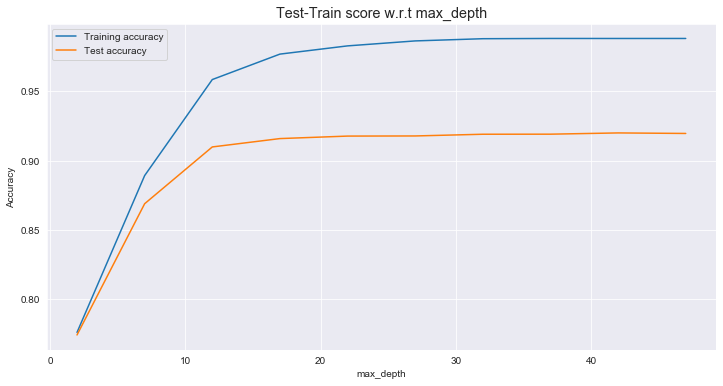

Best accuracy: 0.9199790546008474
Best max_depth: {'max_depth': 42}


In [220]:
# scores of GridSearch CV
scores = rf_max_depth_pca_cv.cv_results_

# plotting accuracies with 'max_depth' hyperparameter
plot_accuracies(scores, 'max_depth')

print('Best accuracy:',rf_max_depth_pca_cv.best_score_)
print('Best max_depth:',rf_max_depth_pca_cv.best_params_)

As the value of 'max_depth' is increased, both train and test accuracy scores increase upto a certain point and then the test score start to flatten out.

### 6.1.6.2 'n_estimator' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [221]:
# parameters to build on model
parameters = {'n_estimators': range(100, 1000, 400)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune n_estimators hyperparameter
rf_n_estimators_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'n_estimators',classifier)

# print model parameters
print(rf_n_estimators_pca_cv.get_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.2min finished


Time taken (mins) by n_estimators hyperparameter tuning: 6.99338462750117
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score

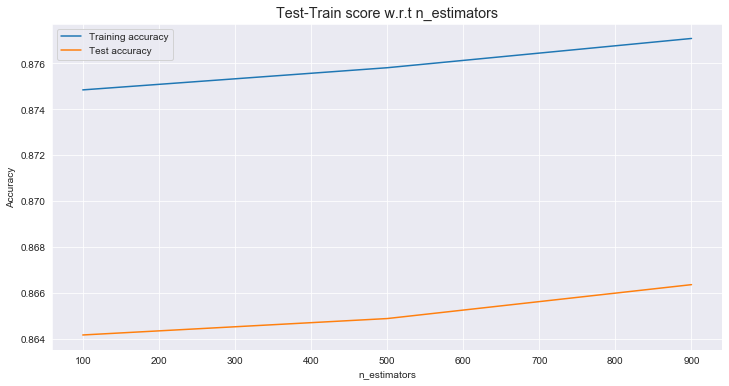

Best accuracy: 0.866377874041986
Best n_estimators: {'n_estimators': 900}


In [222]:
# scores of GridSearch CV
scores = rf_n_estimators_pca_cv.cv_results_

# plotting accuracies with 'n_estimators' hyperparameter
plot_accuracies(scores, 'n_estimators')

print('Best accuracy:',rf_n_estimators_pca_cv.best_score_)
print('Best n_estimators:',rf_n_estimators_pca_cv.best_params_)

As the value of n_estimators is increased the accuracy score of train and test gradually increase. The model is not overfitting even though it's becoming complex.

### 6.1.6.3 'max_features' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [223]:
# parameters to build on model
parameters = {'max_features': [8, 14, 20, 24, 30, 40]}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune max_features hyperparameter
rf_max_features_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'max_features',classifier)

# print model parameters
print(rf_max_features_pca_cv.get_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.4s finished


Time taken (mins) by max_features hyperparameter tuning: 0.6960314234097799
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco

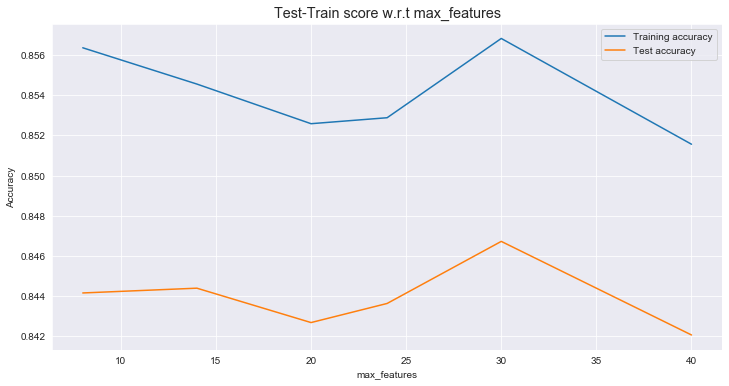

Best accuracy: 0.8467177607464179
Best max_features: {'max_features': 30}


In [224]:
# scores of GridSearch CV
scores = rf_max_features_pca_cv.cv_results_

# plotting accuracies with 'max_features' hyperparameter
plot_accuracies(scores, 'max_features')

print('Best accuracy:',rf_max_features_pca_cv.best_score_)
print('Best max_features:',rf_max_features_pca_cv.best_params_)

At low values of both training and test accuracies are low, i.e, the tree components are too simple to learn anything useful; both accuracies will gradually increase with max_features up to a certain point, while at extremely high values (e.g. after 30), the test accuracy will reduce (and thus the model will overfit)

### 6.1.6.4 'min_samples_leaf' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [225]:
# parameters to build on model
parameters = {'min_samples_leaf': range(100, 500, 50)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune min_samples_leaf hyperparameter
rf_min_samples_leaf_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'min_samples_leaf',classifier)

# print model parameters
print(rf_min_samples_leaf_pca_cv.get_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.8s finished


Time taken (mins) by min_samples_leaf hyperparameter tuning: 0.25057390530904133
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oo

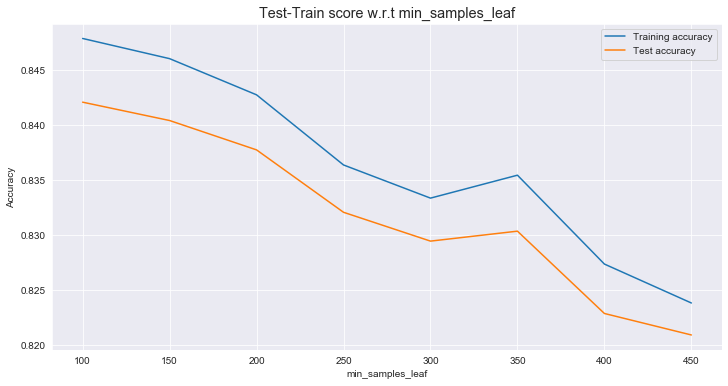

Best accuracy: 0.842052649116961
Best min_samples_leaf: {'min_samples_leaf': 100}


In [226]:
# scores of GridSearch CV
scores = rf_min_samples_leaf_pca_cv.cv_results_

# plotting accuracies with 'min_samples_leaf' hyperparameter
plot_accuracies(scores, 'min_samples_leaf')

print('Best accuracy:',rf_min_samples_leaf_pca_cv.best_score_)
print('Best min_samples_leaf:',rf_min_samples_leaf_pca_cv.best_params_)

As the value of min_samples_leaf increases, the train and test accuracies starts to coincide.

### 6.1.6.5 'min_samples_split' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [227]:
# parameters to build on model
parameters = {'min_samples_split': range(200, 700, 50)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune min_samples_split hyperparameter
rf_min_samples_split_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'min_samples_split',classifier)

# print model parameters
print(rf_min_samples_split_pca_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.4s finished


Time taken (mins) by min_samples_split hyperparameter tuning: 0.3281645258267721
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oo

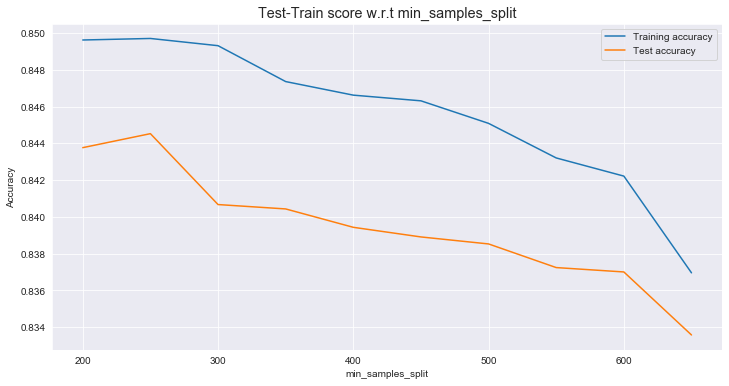

Best accuracy: 0.8445280144713667
Best min_samples_split: {'min_samples_split': 250}


In [228]:
# scores of GridSearch CV
scores = rf_min_samples_split_pca_cv.cv_results_

# plotting accuracies with 'min_samples_split' hyperparameter
plot_accuracies(scores, 'min_samples_split')

print('Best accuracy:',rf_min_samples_split_pca_cv.best_score_)
print('Best min_samples_split:',rf_min_samples_split_pca_cv.best_params_)

The accuracy scores of train and test increases upto 250 and then start to coincide till 600 as the value of min_samples_split is increased. Post this the model starts to overfit.

### 6.1.6.6 Grid Search to find Optimal Hyperparameters

---
`NOTE:` **The below code related to GridSearch for Random Forest takes around 60 mins to execute**

---

In [229]:
# Create the parameter grid 
parameters = {
    'max_depth': [7,10],
    'min_samples_leaf': range(300, 450, 200),
    'min_samples_split': range(250, 400, 200),
    'n_estimators': [500,900], 
    'max_features': [25,30]
}

classifier = RandomForestClassifier(class_weight='balanced',random_state=100)

# tune all hyperparameter
rf_all_split_pca_cv = rf_hyper_tuning(X_train_scaled_pca_df,y_train, parameters, 'Multiple hyperparameters',classifier)

# print model parameters
print(rf_all_split_pca_cv.get_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 50.4min finished


Time taken (mins) by Multiple hyperparameters hyperparameter tuning: 53.53862200180689
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                       

In [230]:
print('Best accuracy:',rf_all_split_pca_cv.best_score_)
print('Best hyperparameters:',rf_all_split_pca_cv.best_params_)

Best accuracy: 0.830056647784072
Best hyperparameters: {'max_depth': 7, 'max_features': 25, 'min_samples_leaf': 300, 'min_samples_split': 250, 'n_estimators': 900}


### 6.1.7 Random Forest with PCA and optimized hyperparameters
- n_estimators: **900**
- criterion: **gini**
- max_depth: **7**
- max_features: **25**
- min_samples_leaf: **300**
- min_samples_split: **250**

In [231]:
# Instantiate the Random Forest Classifier object
rf_pca_optimized = RandomForestClassifier(n_estimators=900,
                                          class_weight='balanced',
                                          criterion='gini',
                                          max_depth=7,
                                          max_features=25,
                                          min_samples_leaf=300,
                                          min_samples_split=250,
                                          random_state=100,
                                          verbose=1,
                                          n_jobs=-1)

# Fitting the random forest with optimized hyperparameters,
print(rf_pca_optimized.fit(X_train_scaled_pca_df, y_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=250, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=1, warm_start=False)


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.3min finished


In [232]:
# Making predictions on train data set
y_train_pred_default = rf_pca_optimized.predict(X_train_scaled_pca_df)

print(y_train_pred_default[:10])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s


[0 0 0 0 0 0 0 0 0 0]


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.8s finished


In [233]:
# classification report
class_report_train = classification_report(y_train, y_train_pred_default)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred_default)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19192
           1       0.32      0.82      0.46      1815

    accuracy                           0.84     21007
   macro avg       0.65      0.83      0.68     21007
weighted avg       0.92      0.84      0.87     21007

[[16117  3075]
 [  335  1480]]

Sensitivity: 0.82


In [234]:
# Making predictions on test data set
y_test_pred_default = rf_pca_optimized.predict(X_test_scaled_pca_df)

print(y_test_pred_default[:10])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s


[1 0 0 0 0 0 0 1 0 0]


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.4s finished


In [235]:
# classification report
class_report_test = classification_report(y_test, y_test_pred_default)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred_default)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8226
           1       0.31      0.77      0.45       778

    accuracy                           0.84      9004
   macro avg       0.64      0.80      0.67      9004
weighted avg       0.92      0.84      0.86      9004

[[6925 1301]
 [ 181  597]]

Sensitivity: 0.77


In [236]:
temp_results = pd.DataFrame({'Model': ['Random Forest (PCA, Weight-balanced, Optimized Hyper Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0           Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0           Random Forest (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                                    Decision Tree (PCA, Default Parameters)   
0                                    Random Forest (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.82  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 0.82                0.77  
0                 1.00                0.33  
0                 0.90                0.16

Amongst all the models built on PCA data, **Decision Tree** with **weight-balanced** and **Optimized hyperparameter** performed the best with **0.82** sensitivity on test data.

## 6.2 Without PCA

### 6.2.1 Decision Tree without PCA

In [238]:
# Create the parameter grid 
parameters = {
    'max_depth': range(4, 10, 2),
    'min_samples_leaf': range(20, 100, 50),
    'min_samples_split': range(25, 150, 50),
    'criterion': ["entropy", "gini"]
}


# tune max_depth hyperparameter
dtc_all_cv = dtree_hyper_tuning(X_train_scaled,y_train, parameters, 'Multiple hyperparameters')

# print model parameters
print(dtc_all_cv.get_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


Time taken (mins) by Multiple hyperparameters hyperparameter tuning: 1.8044210076332092
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
   

In [239]:
print('Best accuracy:',dtc_all_cv.best_score_)
print('Best hyperparameters:',dtc_all_cv.best_params_)

Best accuracy: 0.8653782072642453
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 25}


In [240]:
# Instantiate the Decision Tress Classifier object
dtc_optimized = DecisionTreeClassifier(class_weight='balanced',
                                           criterion='entropy',
                                           max_depth=8,
                                           min_samples_leaf=20,
                                           min_samples_split=25,
                                           random_state=100)

# Fitting the decision tree with optimized hyperparameters,
print(dtc_optimized.fit(X_train_scaled, y_train))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


In [284]:
# Making predictions on train data set
y_train_pred = dtc_optimized.predict(X_train_scaled)

print(y_train_pred[:10])

[1 0 0 0 0 0 0 1 0 0]


In [285]:
# classification report
class_report_train = classification_report(y_train, y_train_pred)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     19192
           1       0.43      0.92      0.58      1815

    accuracy                           0.89     21007
   macro avg       0.71      0.90      0.76     21007
weighted avg       0.94      0.89      0.90     21007

[[16942  2250]
 [  143  1672]]

Sensitivity: 0.92


In [286]:
# Making predictions on test data set
y_test_pred = dtc_optimized.predict(X_test_scaled)

y_test_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [287]:
# classification report
class_report_test = classification_report(y_test, y_test_pred)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      8226
           1       0.24      0.60      0.34       778

    accuracy                           0.80      9004
   macro avg       0.60      0.71      0.61      9004
weighted avg       0.89      0.80      0.84      9004

[[6762 1464]
 [ 311  467]]

Sensitivity: 0.6


Even with hyperparameter tuning, the decision tree model has **overfit** the data. Let's create Random forest model with optimal hyperparameters.

In [288]:
temp_results = pd.DataFrame({'Model': ['Decision Tree (Weight-balanced, Optimized Hyper Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0           Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0           Random Forest (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                Decision Tree (Weight-balanced, Optimized Hyper Parameters)   
0                                    Decision Tree (PCA, Default Parameters)   
0                                    Random Forest (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.83                0.82  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 0.82                0.77  
0                 0.92                0.60  
0                 1.00                0.33  
0                 0.90                0.16

### 6.2.2 Random Forest without PCA

### 6.2.2.1 'max_depth' hyperparameter tuning

In [246]:
# parameters to build on model
classifier = RandomForestClassifier(class_weight='balanced', random_state=100)
parameters = {'max_depth': range(2, 50, 5)}

# tune max_depth hyperparameter
rf_max_depth_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'max_depth',classifier)

# print model parameters
print(rf_max_depth_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.9s finished


Time taken (mins) by max_depth hyperparameter tuning: 0.4614255706469218
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco

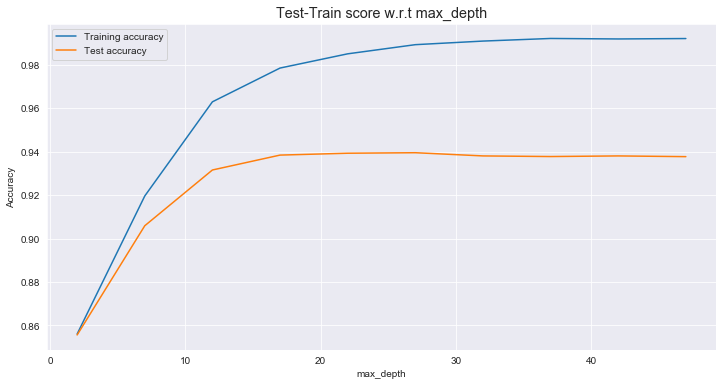

Best accuracy: 0.9394963583567383
Best max_depth: {'max_depth': 27}


In [247]:
# scores of GridSearch CV
scores = rf_max_depth_cv.cv_results_

# plotting accuracies with 'max_depth' hyperparameter
plot_accuracies(scores, 'max_depth')

print('Best accuracy:',rf_max_depth_cv.best_score_)
print('Best max_depth:',rf_max_depth_cv.best_params_)

As the value of 'max_depth' is increased, both train and test accuracy scores increase upto a certain point and then the test score start to flatten out.

### 6.2.2.2 'n_estimator' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [248]:
# parameters to build on model
parameters = {'n_estimators': range(100, 1000, 400)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune n_estimators hyperparameter
rf_n_estimators_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'n_estimators',classifier)

# print model parameters
print(rf_n_estimators_cv.get_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.7min finished


Time taken (mins) by n_estimators hyperparameter tuning: 3.5667620420455934
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco

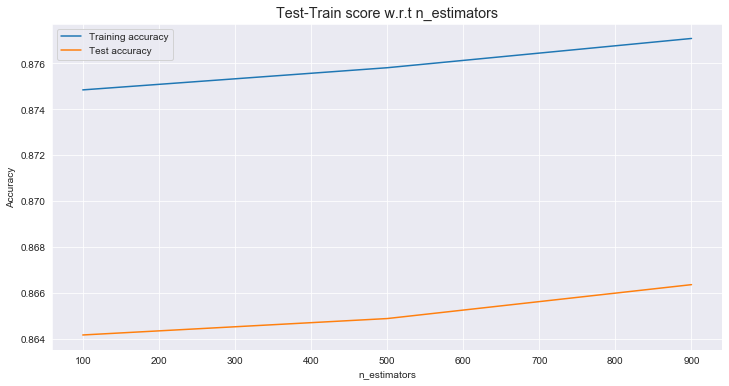

Best accuracy: 0.8987956395487219
Best n_estimators: {'n_estimators': 900}


In [249]:
# scores of GridSearch CV
scores = rf_n_estimators_cv.cv_results_

# plotting accuracies with 'n_estimators' hyperparameter
plot_accuracies(scores, 'n_estimators')

print('Best accuracy:',rf_n_estimators_cv.best_score_)
print('Best n_estimators:',rf_n_estimators_cv.best_params_)

As the value of n_estimators is increased the accuracy score of train and test gradually increase. The model is not overfitting even though it's becoming complex.

### 6.2.2.3 'max_features' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [256]:
# parameters to build on model
parameters = {'max_features': [8, 14, 20, 24, 30, 40]}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune max_features hyperparameter
rf_max_features_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'max_features',classifier)

# print model parameters
print(rf_max_features_cv.get_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.6s finished


Time taken (mins) by max_features hyperparameter tuning: 0.20818981726964314
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sc

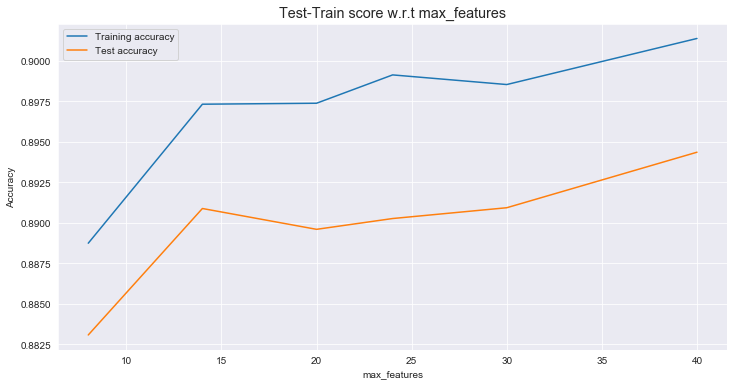

Best accuracy: 0.8943685438187271
Best max_features: {'max_features': 40}


In [257]:
# scores of GridSearch CV
scores = rf_max_features_cv.cv_results_

# plotting accuracies with 'max_features' hyperparameter
plot_accuracies(scores, 'max_features')

print('Best accuracy:',rf_max_features_cv.best_score_)
print('Best max_features:',rf_max_features_cv.best_params_)

### 6.2.2.4 'min_samples_leaf' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [258]:
# parameters to build on model
parameters = {'min_samples_leaf': range(100, 500, 50)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune min_samples_leaf hyperparameter
rf_min_samples_leaf_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'min_samples_leaf',classifier)

# print model parameters
print(rf_min_samples_leaf_cv.get_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.2s finished


Time taken (mins) by min_samples_leaf hyperparameter tuning: 0.1317310889561971
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob

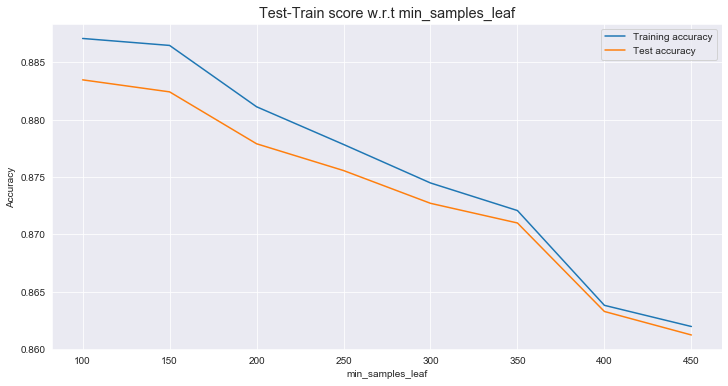

Best accuracy: 0.8834674156233636
Best min_samples_leaf: {'min_samples_leaf': 100}


In [259]:
# scores of GridSearch CV
scores = rf_min_samples_leaf_cv.cv_results_

# plotting accuracies with 'min_samples_leaf' hyperparameter
plot_accuracies(scores, 'min_samples_leaf')

print('Best accuracy:',rf_min_samples_leaf_cv.best_score_)
print('Best min_samples_leaf:',rf_min_samples_leaf_cv.best_params_)

As the value of min_samples_leaf increases, the train and test accuracies starts to coincide.

### 6.2.2.5 'min_samples_split' hyperparameter tuning
- using **'max_depth' = 5**, so that the tree does not overfit.

In [260]:
# parameters to build on model
parameters = {'min_samples_split': range(200, 700, 50)}
classifier = RandomForestClassifier(max_depth = 5,class_weight='balanced', random_state=100)

# tune min_samples_split hyperparameter
rf_min_samples_split_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'min_samples_split',classifier)

# print model parameters
print(rf_min_samples_split_cv.get_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.5s finished


Time taken (mins) by min_samples_split hyperparameter tuning: 0.1872564752896627
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oo

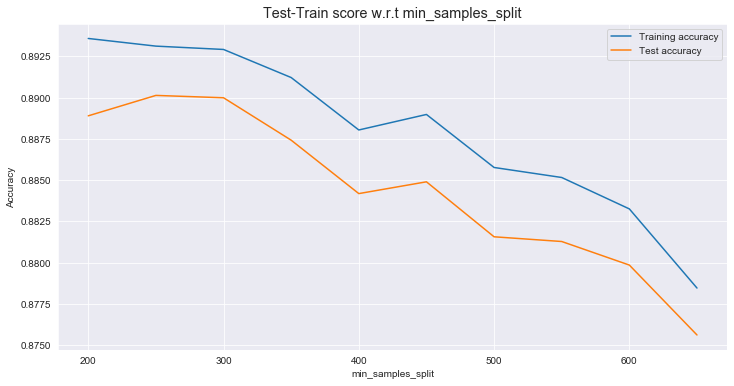

Best accuracy: 0.890131860808302
Best min_samples_split: {'min_samples_split': 250}


In [261]:
# scores of GridSearch CV
scores = rf_min_samples_split_cv.cv_results_

# plotting accuracies with 'min_samples_split' hyperparameter
plot_accuracies(scores, 'min_samples_split')

print('Best accuracy:',rf_min_samples_split_cv.best_score_)
print('Best min_samples_split:',rf_min_samples_split_cv.best_params_)

The accuracy scores of train and test increases upto 250 and then start to coincide till 600 as the value of min_samples_split is increased. Post this the model starts to overfit.

### 6.2.2.6 Grid Search to find Optimal Hyperparameters

In [277]:
# Create the parameter grid 
parameters = {
    'max_depth': [7,10],
    'min_samples_leaf': range(300, 450, 200),
    'min_samples_split': range(250, 400, 200),
    'n_estimators': [900], 
    'max_features': [25,30]
}

classifier = RandomForestClassifier(class_weight='balanced',random_state=100)

# tune all hyperparameter
rf_all_cv = rf_hyper_tuning(X_train_scaled,y_train, parameters, 'Multiple hyperparameters',classifier)

# print model parameters
print(rf_all_cv.get_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.5min finished


Time taken (mins) by Multiple hyperparameters hyperparameter tuning: 14.199828338623046
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                      

In [278]:
print('Best accuracy:',rf_all_cv.best_score_)
print('Best hyperparameters:',rf_all_cv.best_params_)

Best accuracy: 0.8722806683486457
Best hyperparameters: {'max_depth': 7, 'max_features': 25, 'min_samples_leaf': 300, 'min_samples_split': 250, 'n_estimators': 900}


### 6.2.3 Random Forest with optimized hyperparameters
- n_estimators: **900**
- criterion: **gini**
- max_depth: **7**
- max_features: **25**
- min_samples_leaf: **300**
- min_samples_split: **250**

In [279]:
# Instantiate the Random Forest Classifier object
rf_optimized = RandomForestClassifier(n_estimators=900,
                                          class_weight='balanced',
                                          criterion='gini',
                                          max_depth=77,
                                          max_features=25,
                                          min_samples_leaf=300,
                                          min_samples_split=250,
                                          random_state=100,
                                          verbose=1,
                                          n_jobs=-1)

# Fitting the random forest with optimized hyperparameters,
print(rf_optimized.fit(X_train_scaled, y_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   48.6s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=77, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=250, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=1, warm_start=False)


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   55.5s finished


In [289]:
# Making predictions on train data set
y_train_pred = rf_optimized.predict(X_train_scaled)

print(y_train_pred[:10])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s


[1 0 0 0 0 0 0 0 0 0]


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.7s finished


In [290]:
# classification report
class_report_train = classification_report(y_train, y_train_pred)
print(class_report_train)

# Confusion matrix 
confusion_train = confusion_matrix(y_train, y_train_pred)
print(confusion_train)

# sensitivity
sensitivity_train = sesitivity(confusion_train)
print('\nSensitivity:', sensitivity_train)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19192
           1       0.40      0.84      0.54      1815

    accuracy                           0.88     21007
   macro avg       0.69      0.86      0.74     21007
weighted avg       0.93      0.88      0.90     21007

[[16882  2310]
 [  283  1532]]

Sensitivity: 0.84


In [291]:
# Making predictions on test data set
y_test_pred = rf_optimized.predict(X_test_scaled)

print(y_test_pred[:10])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s


[1 0 0 0 0 0 0 1 0 0]


[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.3s finished


In [292]:
# classification report
class_report_test = classification_report(y_test, y_test_pred)
print(class_report_test)

# Confusion matrix 
confusion_test = confusion_matrix(y_test, y_test_pred)
print(confusion_test)

# sensitivity
sensitivity_test = sesitivity(confusion_test)
print('\nSensitivity:', sensitivity_test)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8226
           1       0.35      0.84      0.50       778

    accuracy                           0.85      9004
   macro avg       0.67      0.85      0.70      9004
weighted avg       0.93      0.85      0.88      9004

[[7015 1211]
 [ 123  655]]

Sensitivity: 0.84


In [293]:
temp_results = pd.DataFrame({'Model': ['Random Forest (Weight-balanced, Optimized Hyper Parameters)'],
                           'Sensitivity (Train)': [sensitivity_train], 'Sensitivity (Test)': [sensitivity_test]})
lr_results = pd.concat([lr_results,temp_results])
lr_results.sort_values(by='Sensitivity (Test)', ascending=False)

Model  \
0                Random Forest (Weight-balanced, Optimized Hyper Parameters)   
0           Decision Tree (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                     Logistic Regression (PCA, Weight-balanced, 0.5 cutoff)   
0  Regularized Logistic Regression (PCA, Weight-Balanced, Lasso, 0.1 cutoff)   
0                                      Logistic Regression (PCA, 0.1 cutoff)   
0           Random Forest (PCA, Weight-balanced, Optimized Hyper Parameters)   
0                Decision Tree (Weight-balanced, Optimized Hyper Parameters)   
0                                    Decision Tree (PCA, Default Parameters)   
0                                    Random Forest (PCA, Default Parameters)   

   Sensitivity (Train)  Sensitivity (Test)  
0                 0.84                0.84  
0                 0.83                0.82  
0                 0.83                0.80  
0                 0.83                0.80  
0                 0.80                0.77  
0                 0.82                0.77  
0                 0.92                0.60  
0                 1.00                0.33  
0                 0.90                0.16

`Random Forest without PCA gives the most highest sensitivity`

In [294]:
# extract important features based on Random Forest Algorithm
important_features = pd.concat([pd.DataFrame(rf_optimized.feature_importances_, columns=['Importance']),
           pd.DataFrame(X_train_scaled.columns, columns=['Features'])],axis=1).sort_values(by='Importance', ascending=False)

# display top 10 features
important_features.head(10)

Importance             Features
80     0.126330       total_ic_mou_8
11     0.091922        roam_ic_mou_8
14     0.079622        roam_og_mou_8
53     0.078079       total_og_mou_8
177    0.072271  total_rech_amt_diff
95     0.065856     total_rech_amt_8
149    0.065423            arpu_diff
2      0.049165               arpu_8
101    0.047161   last_day_rch_amt_8
164    0.028339    total_og_mou_diff

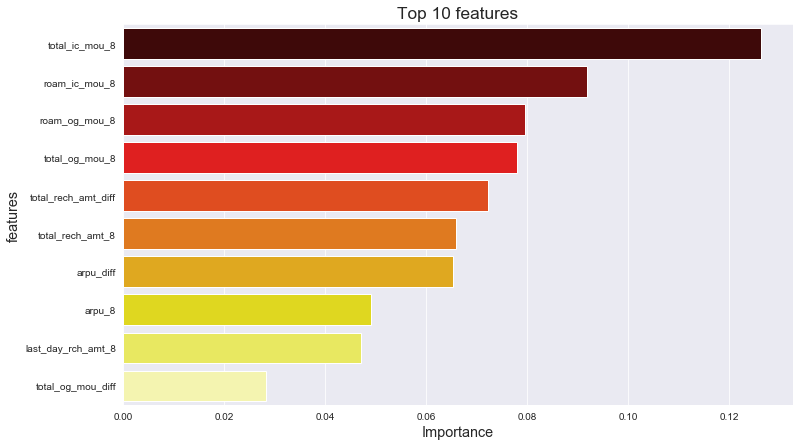

In [295]:
plt.figure(figsize=(12,7))
sns.barplot(x='Importance', y='Features', data=important_features[:10],palette='hot')
plt.title('Top 10 features', fontsize='xx-large')
plt.xlabel('Importance', fontsize='x-large')
plt.ylabel('features', fontsize='x-large')
plt.show()

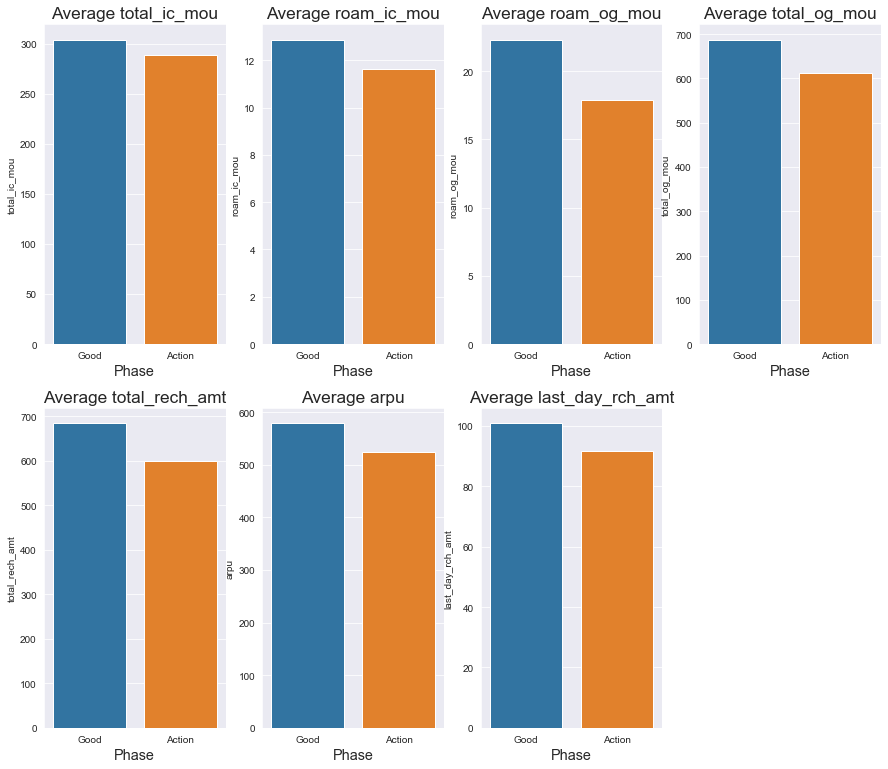

In [364]:
# plot the important features so-found for good and action phase
plt.figure(figsize=(15,20))
i = 0
for col in important_features['Features'].tolist()[:10]:
    if '_8' in col:
        i +=1
        m_8 = telecom_data_70[col].mean()
        m_6_7 = ((telecom_data_70[col.split('_8')[0] + '_6'] + telecom_data_70[col.split('_8')[0] + '_7'])/2).mean()
        
        df = pd.concat([pd.DataFrame([m_6_7,m_8],columns=[col.split('_8')[0]]),
               pd.DataFrame(['Good','Action'],columns=['Phase'])],axis=1)
        
        plt.subplot(3,4,i)
        sns.barplot(x='Phase',y=col.split('_8')[0],data=df)
        plt.title('Average ' + col.split('_8')[0] , fontsize='xx-large')
        plt.xlabel('Phase', fontsize='x-large')
plt.show()

From the above plots it can be noticed that there was a decline in **average calling minutes**, **average recharge amount**, and **average revenue per user** from *Good* to *Action Phase*.

## Step 7: Recommendations

1. The telecom company should provide better roaming packages w.r.t incoming and outgoing calling to the customers.
2. They should provide variety of recharge packages, be it for calling or for data.
3. Ensuring the above may result in better average revenue generated per user.